# Project: Filling the Knowledge Gap Around Cetacean Population, Entanglement and Mortality Associated with Small-scale Fisheries in Pakistan

# Activity 1.1: Questionnaire-based rapid survey assessment carried out in Gwadar, Pasni, and Kharo Chan to identify six fishermen (observers) for data collection on entanglement and mortality during their fishing trips for a year (excluding June and July)

1.1.1 Selection of observers from 3 main villages along the coastline, collect information on the gillnet fisheries and cetaceans interactions


In [1]:
import pandas as pd
import numpy as np

import io
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from dateutil.relativedelta import relativedelta


import matplotlib.pyplot as plt
import seaborn as sns

# External Factors Affected Survey and Fishing Season 

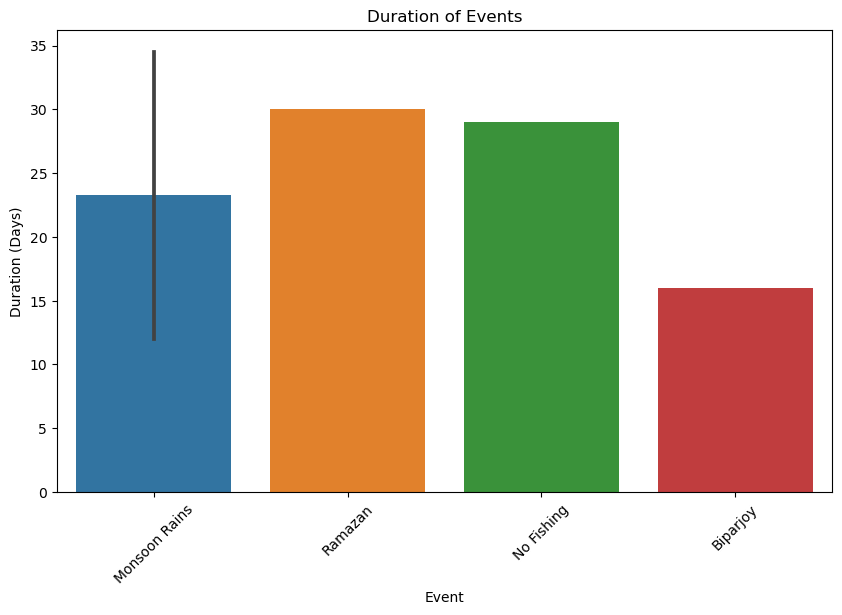

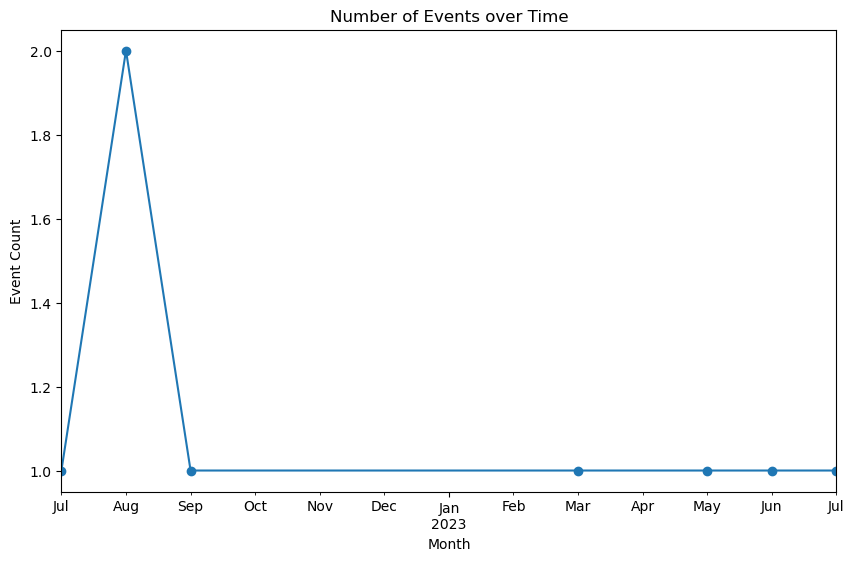

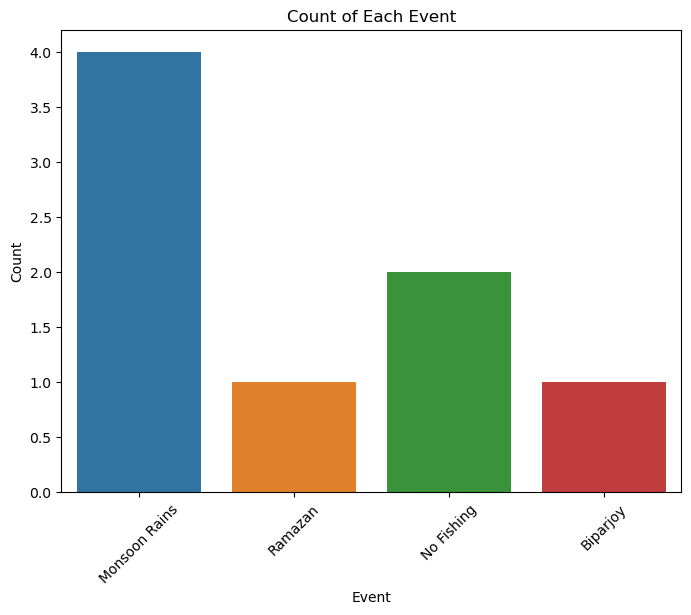

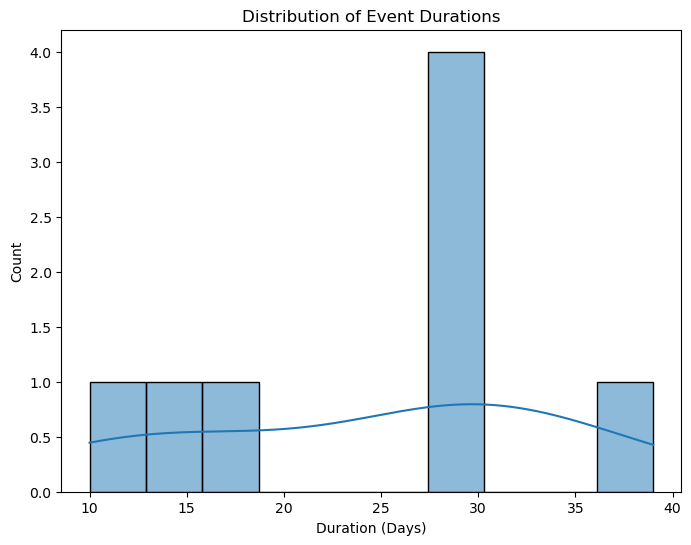

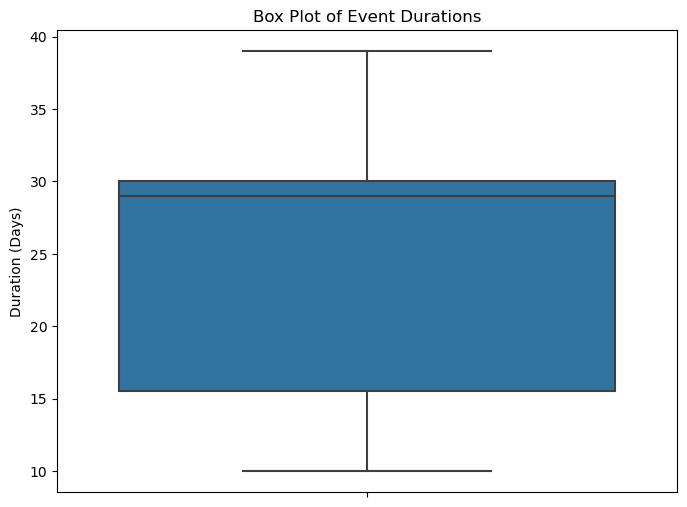

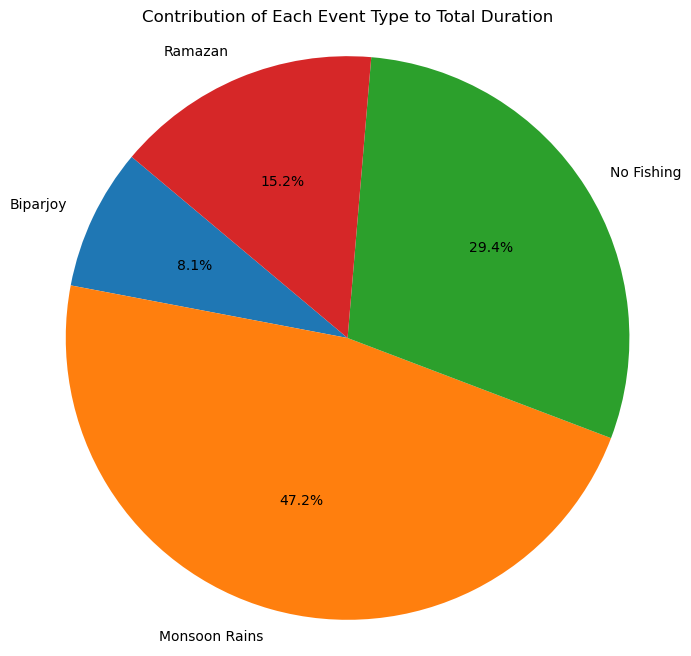

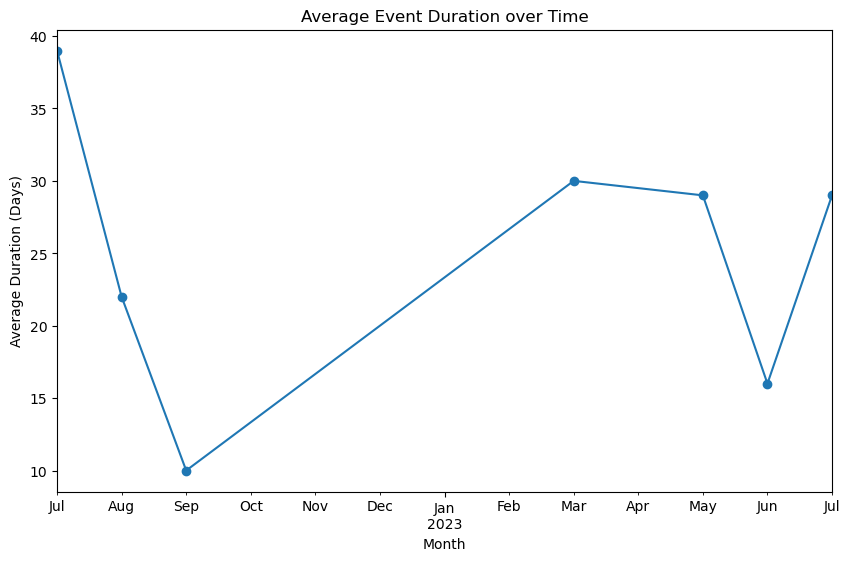

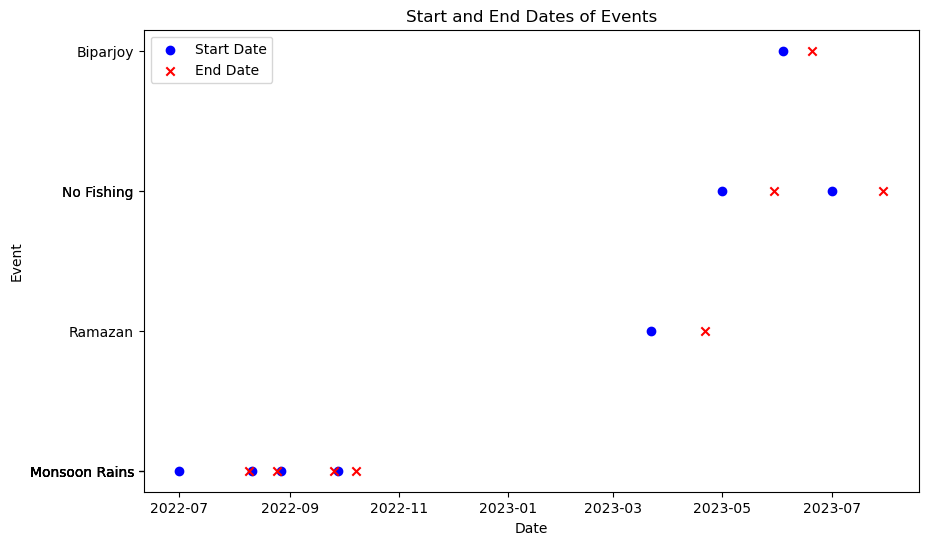

In [2]:

# Load the data into a DataFrame
data = """
Event\tStart_Date\tEnd_Date
Monsoon Rains\t1-Jul-22\t9-Aug-22
Monsoon Rains\t11-Aug-22\t25-Aug-22
Monsoon Rains\t27-Aug-22\t26-Sep-22
Monsoon Rains\t28-Sep-22\t8-Oct-22
Ramazan\t22-Mar-23\t21-Apr-23
No Fishing\t1-May-23\t30-May-23
Biparjoy\t4-Jun-23\t20-Jun-23
No Fishing\t1-Jul-23\t30-Jul-23
"""

df = pd.read_csv(io.StringIO(data), sep='\t')

# Step 1: Convert date columns to the appropriate data type
df['Start_Date'] = pd.to_datetime(df['Start_Date'], format='%d-%b-%y')
df['End_Date'] = pd.to_datetime(df['End_Date'], format='%d-%b-%y')

# Step 2: Data manipulations
df['Duration'] = df['End_Date'] - df['Start_Date']
df['Duration'] = df['Duration'].apply(lambda x: x.days)  # Convert duration to days

# Step 3: Visualization using matplotlib and seaborn
plt.figure(figsize=(10, 6))

# Plot 1: Duration of Events
sns.barplot(x='Event', y='Duration', data=df)
plt.xticks(rotation=45)
plt.xlabel('Event')
plt.ylabel('Duration (Days)')
plt.title('Duration of Events')
plt.show()

# Plot 2: Number of Events per Month
plt.figure(figsize=(10, 6))
df['Month'] = df['Start_Date'].dt.to_period('M')
event_count = df.groupby('Month')['Event'].count()
event_count.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Event Count')
plt.title('Number of Events over Time')
plt.show()

# Step 4: Additional Visualizations

# Count of each type of event
plt.figure(figsize=(8, 6))
sns.countplot(x='Event', data=df)
plt.xticks(rotation=45)
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('Count of Each Event')
plt.show()

# Histogram of event durations
plt.figure(figsize=(8, 6))
sns.histplot(df['Duration'], bins=10, kde=True)
plt.xlabel('Duration (Days)')
plt.ylabel('Count')
plt.title('Distribution of Event Durations')
plt.show()

# Box plot of event durations
plt.figure(figsize=(8, 6))
sns.boxplot(y='Duration', data=df)
plt.ylabel('Duration (Days)')
plt.title('Box Plot of Event Durations')
plt.show()

# Step 5: Advanced Data Analysis and Visualization

# Calculate the total duration for each event type
total_duration_by_event = df.groupby('Event')['Duration'].sum().reset_index()

# Pie chart to show the contribution of each event type to the total duration
plt.figure(figsize=(8, 8))
plt.pie(total_duration_by_event['Duration'], labels=total_duration_by_event['Event'], autopct='%1.1f%%', startangle=140)
plt.title('Contribution of Each Event Type to Total Duration')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Line plot to show the trend of event durations over time
plt.figure(figsize=(10, 6))
event_duration_over_time = df.groupby('Month')['Duration'].mean()
event_duration_over_time.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Average Duration (Days)')
plt.title('Average Event Duration over Time')
plt.show()

# Scatter plot to show the start and end dates of events
plt.figure(figsize=(10, 6))
plt.scatter(df['Start_Date'], df['Event'], color='blue', label='Start Date', marker='o')
plt.scatter(df['End_Date'], df['Event'], color='red', label='End Date', marker='x')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Event')
plt.title('Start and End Dates of Events')
plt.yticks(df['Event'])
plt.show()


# Rapid assessment Sruvey of the face to face questionnaire based random sampling on the cetacean bycatch condcuted from 150 fishermen from 3 main villages of Pakistan

The dependent and independent variables of the face-to-face survey of the fishermen identified as follows:

Dependent Variables:
1. Turtle_No: Number of turtles encountered/sighted
2. Dolphin_No: Number of dolphins encountered/sighted
3. Bycatch_categories: Categories of bycatch species encountered/sighted


In [3]:
# Load the dataset
survey_data = pd.read_csv("Survey_F2F_Cetacean_1.1.csv")

In [4]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Columns: 102 entries, S.no to Comments
dtypes: float64(32), object(70)
memory usage: 455.9+ KB


In [5]:
survey_data.columns

Index(['S.no', 'Recorder', 'Respondent', 'Date_Interview_0', 'Date_Interview',
       'Time_Start', 'Time_End', 'Time', 'FishermanID', 'Village',
       ...
       'Animals should not be caught', 'If_Yes_Explain',
       'Facilitate data collection and reporting', 'Interview_One_Year',
       'Captain Name', 'Boat Name', 'Boat reg:', 'Contact', 'Recommended',
       'Comments'],
      dtype='object', length=102)

# Interviews Conducted by Day and Time 

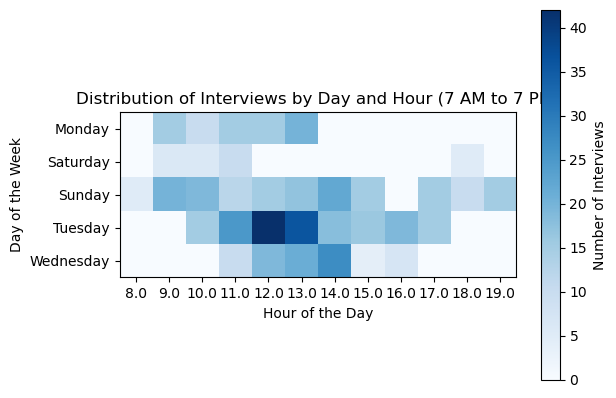

In [6]:
# Extract the independent variables
independent_vars = survey_data[['Recorder', 'Respondent', 'Date_Interview', 'Time_Start', 'Time_End']]

# Analyze the distribution of interviews by the day of the week and hour of the day using a heatmap
interview_data = pd.DataFrame({'Day': pd.to_datetime(independent_vars['Date_Interview']).dt.day_name(),
                               'Hour': pd.to_datetime(independent_vars['Time_Start']).dt.hour})

# Filter hours from 7 am to 7 pm (inclusive)
interview_data = interview_data[(interview_data['Hour'] >= 7) & (interview_data['Hour'] <= 19)]

interview_counts = interview_data.groupby(['Day', 'Hour']).size().unstack(fill_value=0)

# Use Seaborn heatmap for a better visualization
plt.imshow(interview_counts, cmap='Blues')
plt.colorbar(label='Number of Interviews')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Distribution of Interviews by Day and Hour (7 AM to 7 PM)')
plt.xticks(range(len(interview_counts.columns)), interview_counts.columns)
plt.yticks(range(len(interview_counts.index)), interview_counts.index)
plt.show()


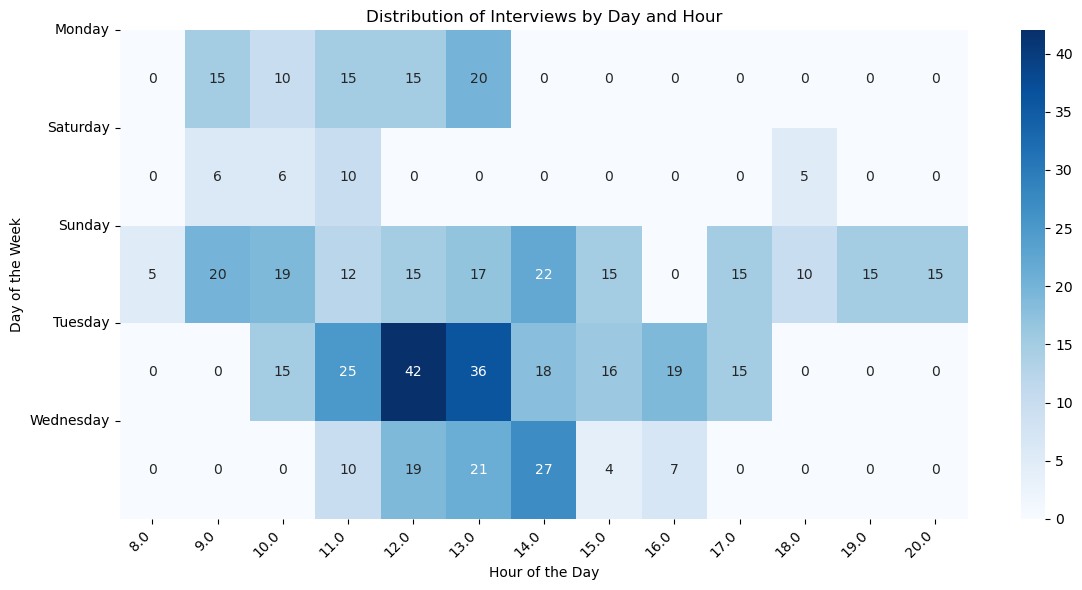

In [7]:
# Extract the independent variables
independent_vars = survey_data[['Recorder', 'Respondent', 'Date_Interview', 'Time_Start', 'Time_End']]

# Analyze the distribution of interviews by the day of the week and hour of the day using a heatmap
interview_data = pd.DataFrame({'Day': pd.to_datetime(independent_vars['Date_Interview']).dt.day_name(),
                               'Hour': pd.to_datetime(independent_vars['Time_Start']).dt.hour})

# Filter the hours from 6 am to 9 pm
interview_data = interview_data[(interview_data['Hour'] >= 6) & (interview_data['Hour'] <= 21)]

interview_counts = interview_data.groupby(['Day', 'Hour']).size().unstack(fill_value=0)

# Use Seaborn heatmap for a better visualization
plt.figure(figsize=(12, 6))  # Adjust the size of the plot
sns.heatmap(interview_counts, cmap='Blues', annot=True, fmt='d')  # Add annotations and format numbers
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.title('Distribution of Interviews by Day and Hour')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(range(len(interview_counts.index)), interview_counts.index, rotation=0)  # Set y-axis labels straight
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


# Demographics

Dependent Variable: Turtle_No_DT
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Respondent  FishermanID         Age  Education_Level_1  \
count  571.000000   109.000000  559.000000         238.000000   
mean    64.264448    11.697248   35.772809           0.579832   
std     37.234701     6.638140   11.115083           0.989359   
min      1.000000     1.000000   15.000000           0.000000   
25%     31.500000     6.000000   28.000000           0.000000   
50%     65.000000    12.000000   35.000000           0.000000   
75%     98.000000    17.000000   40.000000           1.000000   
max    125.000000    23.000000   65.000000           4.000000   

       Fisheries_Association_Yrs  
count                 473.000000  
mean                   18.630021  
std                     9.349415  
min                     2.000000  
25%                    15.000000  
50%                    15.000000  
75%                    22.0000

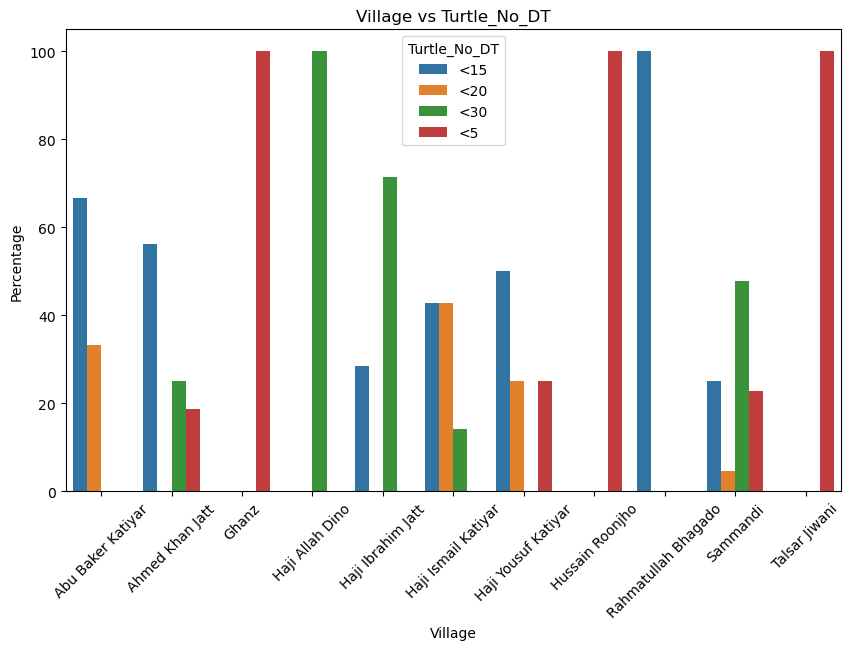

Independent Variable: District

   District Turtle_No_DT  Percentage
0    Gwadar          <30   44.897959
1    Gwadar           <5   26.530612
2    Gwadar          <15   24.489796
3    Gwadar          <20    4.081633
4   Sujawal          <15   53.846154
5   Sujawal           <5   19.230769
6   Sujawal          <20   15.384615
7   Sujawal          <30   11.538462
8    Thatta          <30   57.142857
9    Thatta          <15   35.714286
10   Thatta          <20    7.142857



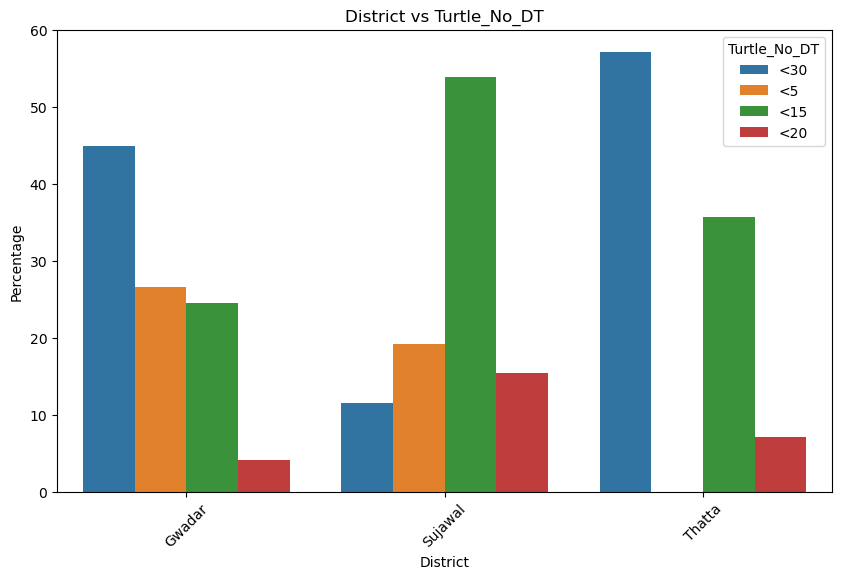

Independent Variable: Education_Level

          Education_Level Turtle_No_DT  Percentage
0                Graduate          <15  100.000000
1                Madrassa          <15   50.000000
2                Madrassa           <5   50.000000
3                     Nil          <30   42.372881
4                     Nil          <15   33.898305
5                     Nil           <5   20.338983
6                     Nil          <20    3.389831
7          Primary School          <30   33.333333
8          Primary School          <15   23.809524
9          Primary School          <20   23.809524
10         Primary School           <5   19.047619
11  Secondary High School          <15  100.000000



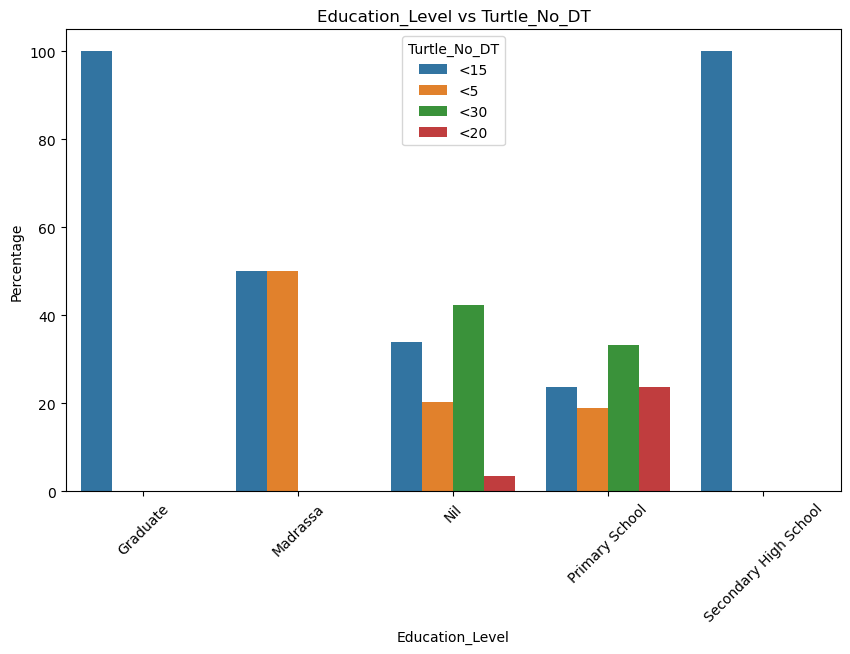

Independent Variable: Language

         Language Turtle_No_DT  Percentage
0         Balochi          <30   51.219512
1         Balochi          <15   21.951220
2         Balochi           <5   21.951220
3         Balochi          <20    4.878049
4          Sindhi          <15   53.571429
5          Sindhi          <30   32.142857
6          Sindhi           <5   10.714286
7          Sindhi          <20    3.571429
8            Urdu          <15   66.666667
9            Urdu           <5   33.333333
10  Urdu/ Balochi           <5   75.000000
11  Urdu/ Balochi          <15   25.000000
12   Urdu/ Sindhi          <15   33.333333
13   Urdu/ Sindhi          <20   33.333333
14   Urdu/ Sindhi          <30   16.666667
15   Urdu/ Sindhi           <5   16.666667



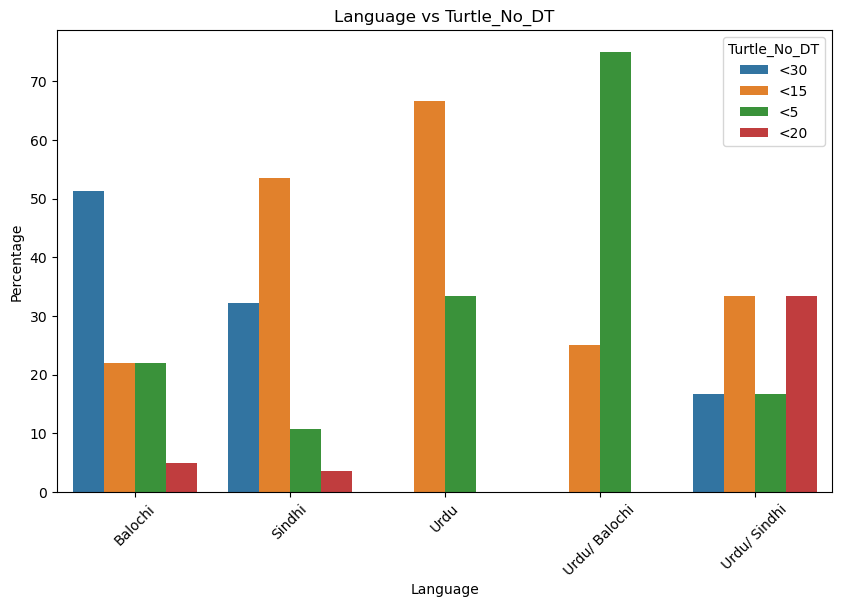

Independent Variable: Occupation

          Occupation Turtle_No_DT  Percentage
0          Fisherman          <30   36.781609
1          Fisherman          <15   34.482759
2          Fisherman           <5   20.689655
3          Fisherman          <20    8.045977
4  Fisherman/ Farmer          <15  100.000000



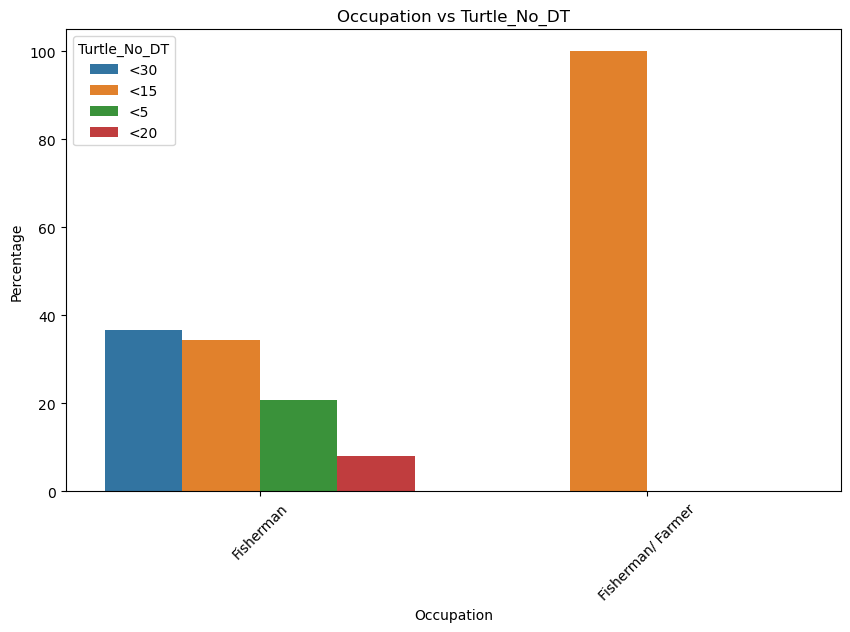

Independent Variable: Current role

  Current role Turtle_No_DT  Percentage
0   Boat owner          <30   42.857143
1   Boat owner          <15   28.571429
2   Boat owner           <5   22.448980
3   Boat owner          <20    6.122449
4      Captain          <15   48.571429
5      Captain          <30   31.428571
6      Captain           <5   14.285714
7      Captain          <20    5.714286
8         Crew          <20   50.000000
9         Crew           <5   50.000000



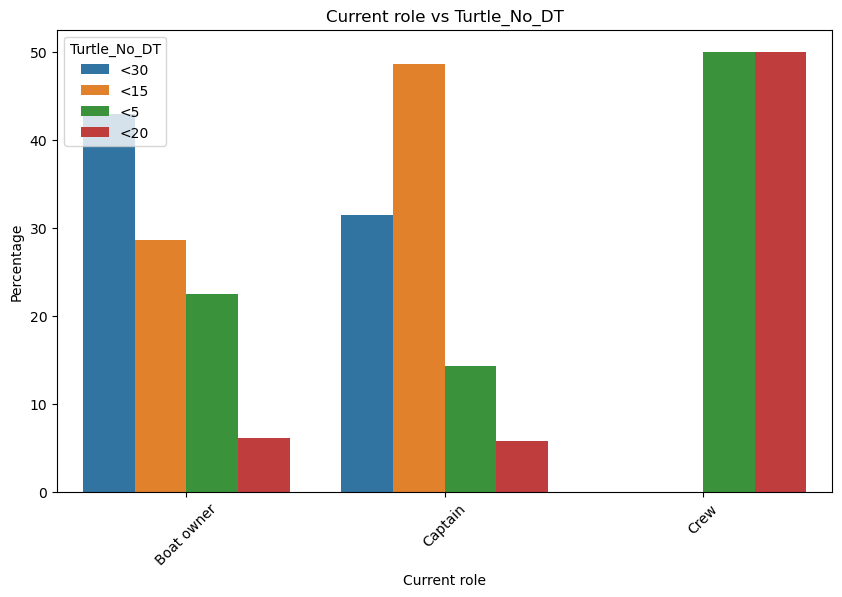



Dependent Variable: Dolphin_No_DT
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Respondent  FishermanID         Age  Education_Level_1  \
count  571.000000   109.000000  559.000000         238.000000   
mean    64.264448    11.697248   35.772809           0.579832   
std     37.234701     6.638140   11.115083           0.989359   
min      1.000000     1.000000   15.000000           0.000000   
25%     31.500000     6.000000   28.000000           0.000000   
50%     65.000000    12.000000   35.000000           0.000000   
75%     98.000000    17.000000   40.000000           1.000000   
max    125.000000    23.000000   65.000000           4.000000   

       Fisheries_Association_Yrs  
count                 473.000000  
mean                   18.630021  
std                     9.349415  
min                     2.000000  
25%                    15.000000  
50%                    15.000000  
75%                    22.0

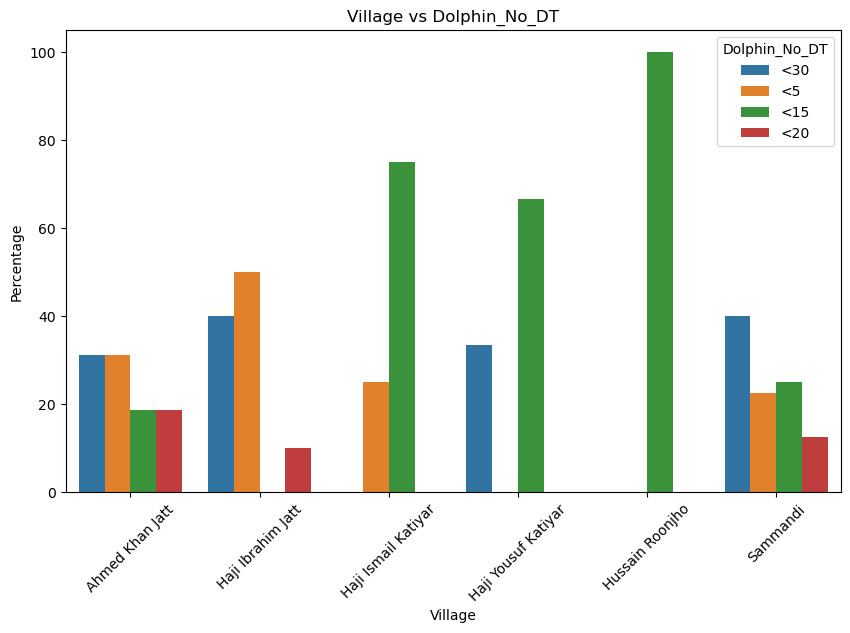

Independent Variable: District

   District Dolphin_No_DT  Percentage
0    Gwadar           <30   38.095238
1    Gwadar           <15   23.809524
2    Gwadar            <5   23.809524
3    Gwadar           <20   14.285714
4   Sujawal           <15   38.095238
5   Sujawal           <30   38.095238
6   Sujawal           <20   14.285714
7   Sujawal            <5    9.523810
8    Thatta            <5   69.230769
9    Thatta           <30   15.384615
10   Thatta           <15    7.692308
11   Thatta           <20    7.692308



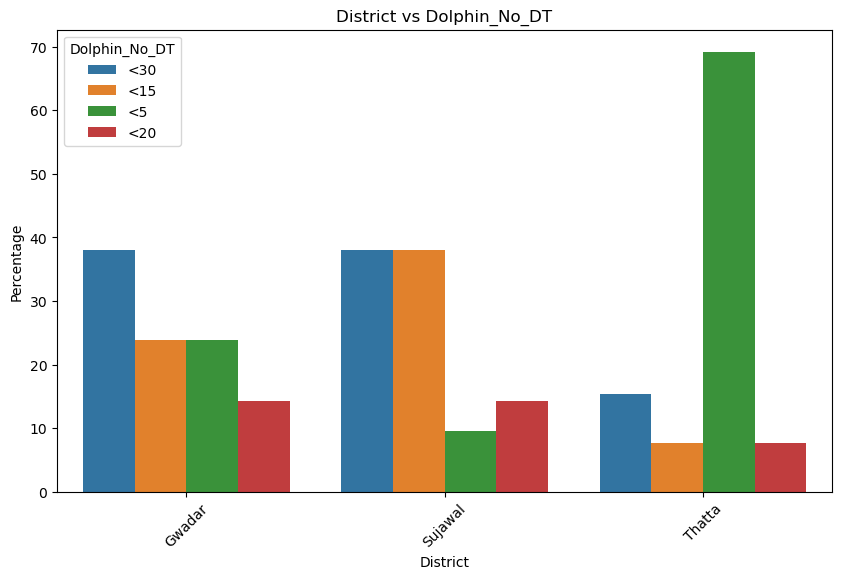

Independent Variable: Education_Level

          Education_Level Dolphin_No_DT  Percentage
0                Graduate           <30  100.000000
1                Madrassa           <15   50.000000
2                Madrassa           <30   50.000000
3                     Nil           <30   35.849057
4                     Nil           <15   24.528302
5                     Nil            <5   24.528302
6                     Nil           <20   15.094340
7          Primary School            <5   40.000000
8          Primary School           <15   26.666667
9          Primary School           <30   26.666667
10         Primary School           <20    6.666667
11  Secondary High School           <15   50.000000
12  Secondary High School            <5   50.000000



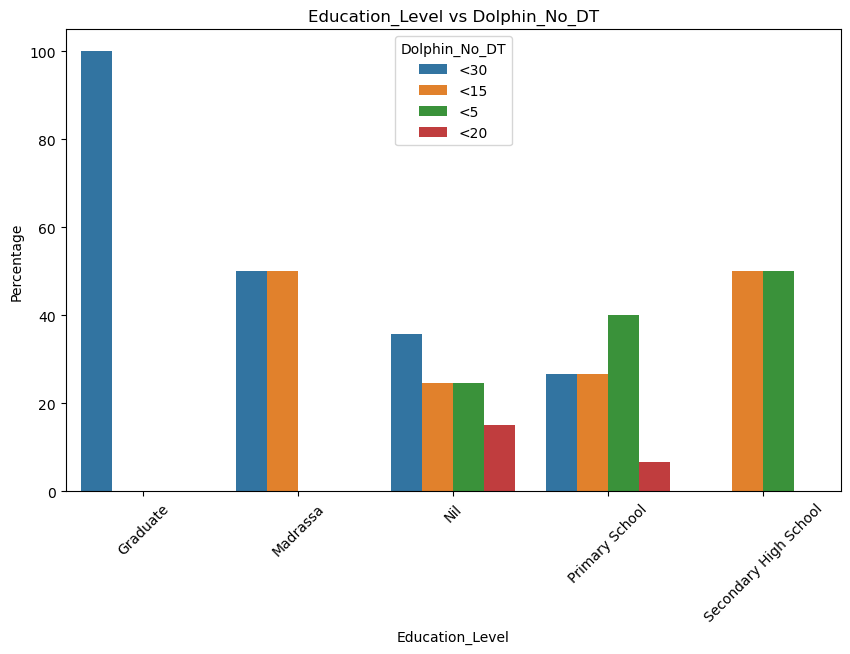

Independent Variable: Language

        Language Dolphin_No_DT  Percentage
0        Balochi           <30   42.105263
1        Balochi           <15   26.315789
2        Balochi            <5   18.421053
3        Balochi           <20   13.157895
4         Sindhi           <30   33.333333
5         Sindhi            <5   29.166667
6         Sindhi           <15   20.833333
7         Sindhi           <20   16.666667
8           Urdu            <5  100.000000
9   Urdu/ Sindhi           <15   40.000000
10  Urdu/ Sindhi            <5   40.000000
11  Urdu/ Sindhi           <30   20.000000



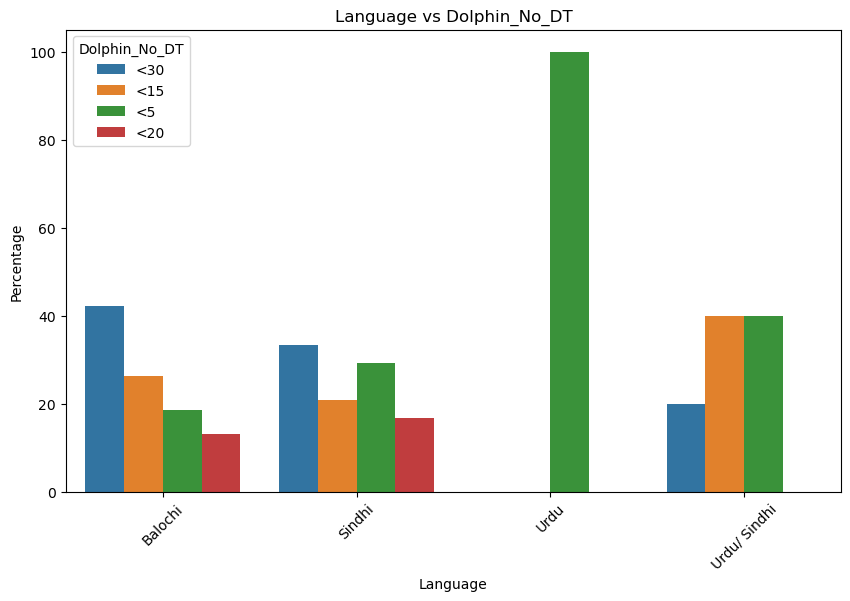

Independent Variable: Occupation

          Occupation Dolphin_No_DT  Percentage
0          Fisherman           <30   33.783784
1          Fisherman            <5   28.378378
2          Fisherman           <15   25.675676
3          Fisherman           <20   12.162162
4  Fisherman/ Farmer           <30  100.000000



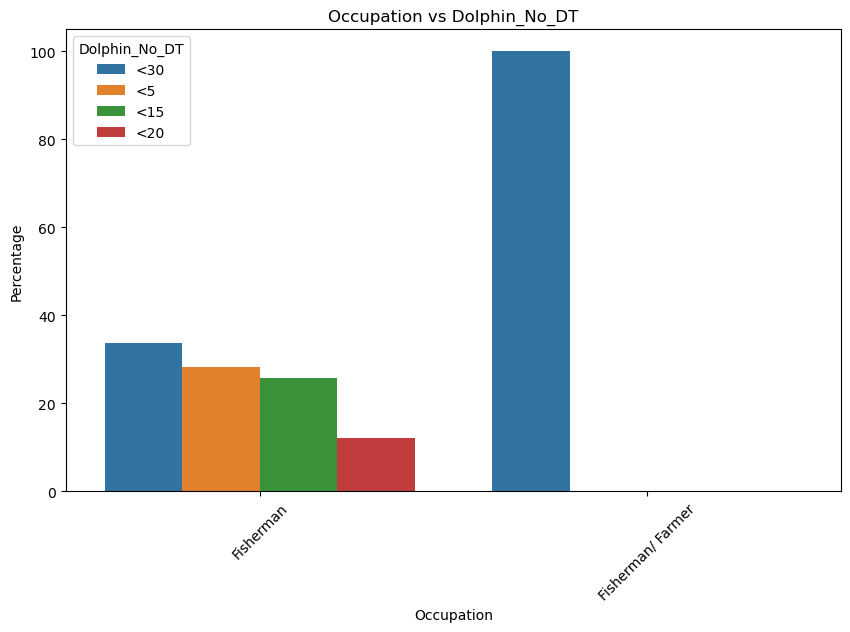

Independent Variable: Current role

  Current role Dolphin_No_DT  Percentage
0   Boat owner           <30   35.555556
1   Boat owner           <15   31.111111
2   Boat owner            <5   22.222222
3   Boat owner           <20   11.111111
4      Captain           <30   34.482759
5      Captain            <5   34.482759
6      Captain           <15   17.241379
7      Captain           <20   13.793103
8         Crew            <5  100.000000



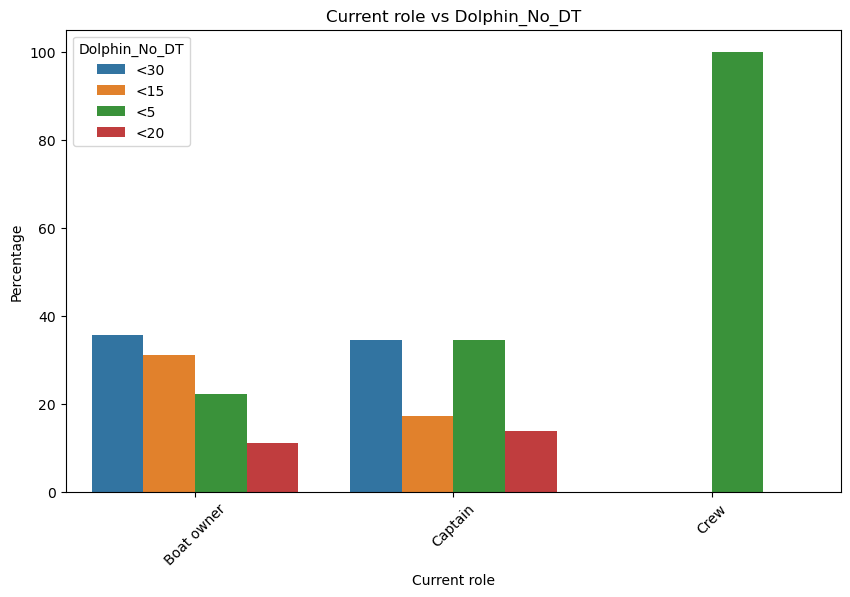



Dependent Variable: Bycatch_Category
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Respondent  FishermanID         Age  Education_Level_1  \
count  571.000000   109.000000  559.000000         238.000000   
mean    64.264448    11.697248   35.772809           0.579832   
std     37.234701     6.638140   11.115083           0.989359   
min      1.000000     1.000000   15.000000           0.000000   
25%     31.500000     6.000000   28.000000           0.000000   
50%     65.000000    12.000000   35.000000           0.000000   
75%     98.000000    17.000000   40.000000           1.000000   
max    125.000000    23.000000   65.000000           4.000000   

       Fisheries_Association_Yrs  
count                 473.000000  
mean                   18.630021  
std                     9.349415  
min                     2.000000  
25%                    15.000000  
50%                    15.000000  
75%                    2

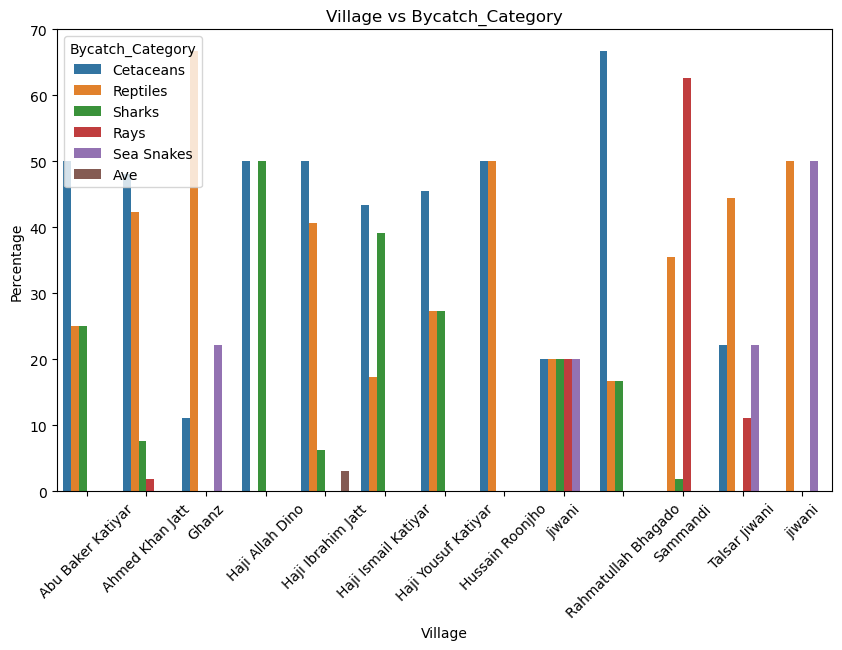

Independent Variable: District

   District Bycatch_Category  Percentage
0    Gwadar             Rays   51.824818
1    Gwadar         Reptiles   38.686131
2    Gwadar       Sea Snakes    4.379562
3    Gwadar        Cetaceans    2.919708
4    Gwadar           Sharks    2.189781
5   Sujawal        Cetaceans   48.314607
6   Sujawal         Reptiles   31.460674
7   Sujawal           Sharks   20.224719
8    Thatta        Cetaceans   48.936170
9    Thatta         Reptiles   38.297872
10   Thatta           Sharks    8.510638
11   Thatta              Ave    2.127660
12   Thatta             Rays    2.127660



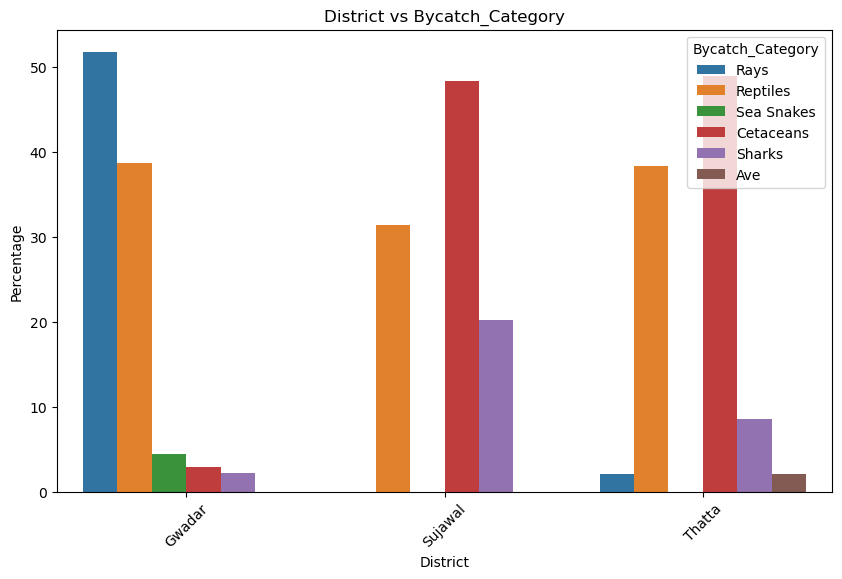

Independent Variable: Education_Level

          Education_Level Bycatch_Category  Percentage
0                Graduate        Cetaceans   33.333333
1                Graduate         Reptiles   33.333333
2                Graduate           Sharks   33.333333
3                Madrassa        Cetaceans   37.500000
4                Madrassa         Reptiles   37.500000
5                Madrassa              Ave   12.500000
6                Madrassa           Sharks   12.500000
7                     Nil         Reptiles   38.372093
8                     Nil             Rays   30.232558
9                     Nil        Cetaceans   23.837209
10                    Nil           Sharks    6.976744
11                    Nil       Sea Snakes    0.581395
12         Primary School         Reptiles   32.876712
13         Primary School        Cetaceans   27.397260
14         Primary School             Rays   19.178082
15         Primary School           Sharks   13.698630
16         Primary School 

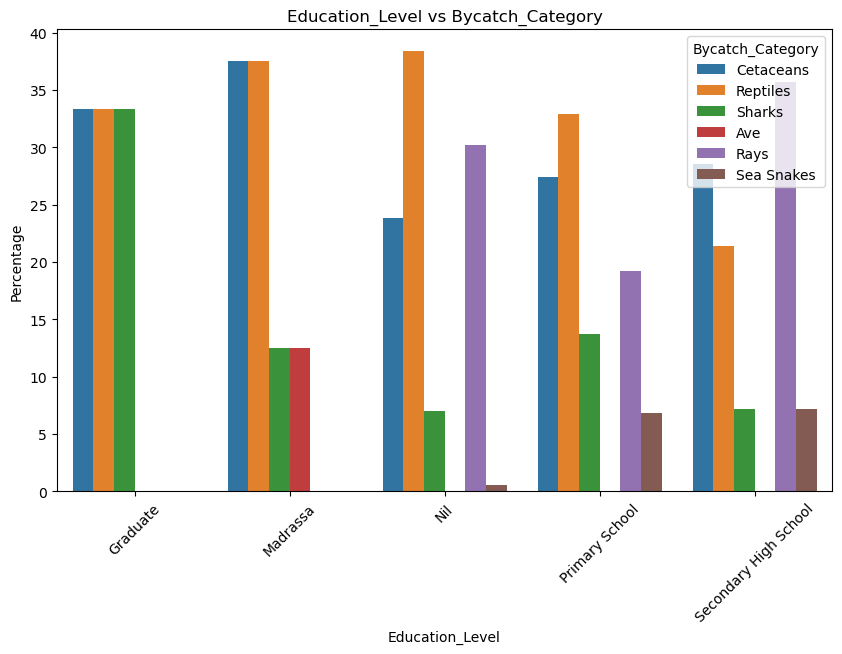

Independent Variable: Language

         Language Bycatch_Category  Percentage
0         Balochi             Rays   60.606061
1         Balochi         Reptiles   37.373737
2         Balochi           Sharks    2.020202
3          Sindhi        Cetaceans   46.875000
4          Sindhi         Reptiles   37.500000
5          Sindhi           Sharks   13.541667
6          Sindhi              Ave    1.041667
7          Sindhi             Rays    1.041667
8            Urdu             Rays   71.428571
9            Urdu         Reptiles   28.571429
10  Urdu/ Balochi         Reptiles   43.750000
11  Urdu/ Balochi       Sea Snakes   21.875000
12  Urdu/ Balochi        Cetaceans   15.625000
13  Urdu/ Balochi             Rays   15.625000
14  Urdu/ Balochi           Sharks    3.125000
15   Urdu/ Sindhi        Cetaceans   52.500000
16   Urdu/ Sindhi         Reptiles   25.000000
17   Urdu/ Sindhi           Sharks   22.500000



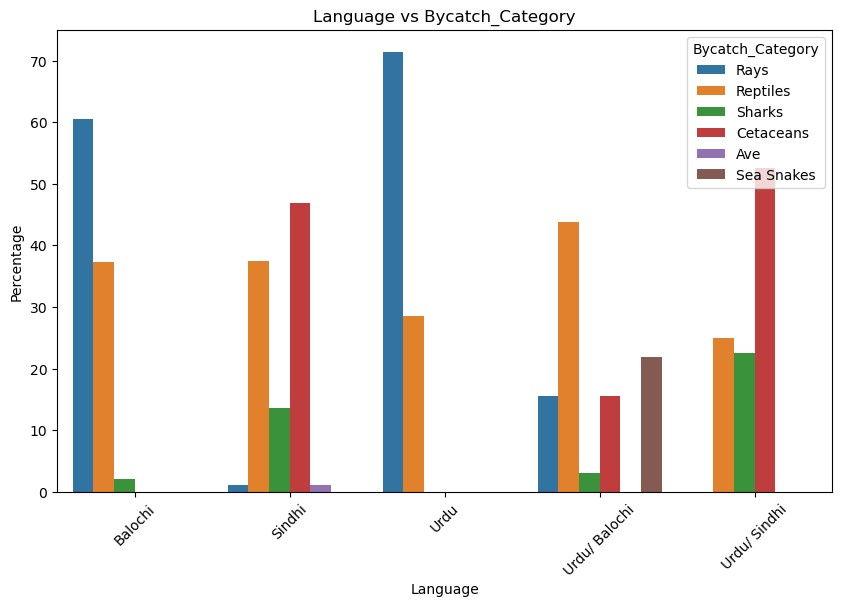

Independent Variable: Occupation

          Occupation Bycatch_Category  Percentage
0          Fisherman         Reptiles   36.162362
1          Fisherman             Rays   26.199262
2          Fisherman        Cetaceans   25.830258
3          Fisherman           Sharks    8.856089
4          Fisherman       Sea Snakes    2.583026
5          Fisherman              Ave    0.369004
6  Fisherman/ Farmer        Cetaceans   33.333333
7  Fisherman/ Farmer         Reptiles   33.333333
8  Fisherman/ Farmer           Sharks   33.333333



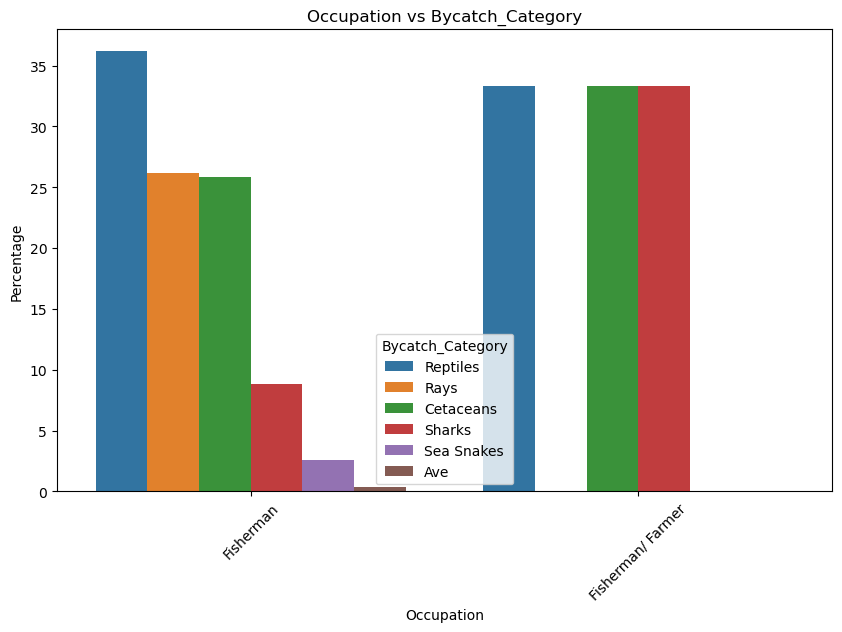

Independent Variable: Current role

   Current role Bycatch_Category  Percentage
0    Boat owner             Rays   58.119658
1    Boat owner         Reptiles   35.897436
2    Boat owner        Cetaceans    3.418803
3    Boat owner           Sharks    2.564103
4       Captain        Cetaceans   44.525547
5       Captain         Reptiles   37.226277
6       Captain           Sharks   12.408759
7       Captain       Sea Snakes    3.649635
8       Captain             Rays    1.459854
9       Captain              Ave    0.729927
10         Crew        Cetaceans   30.000000
11         Crew         Reptiles   30.000000
12         Crew           Sharks   25.000000
13         Crew       Sea Snakes   10.000000
14         Crew             Rays    5.000000



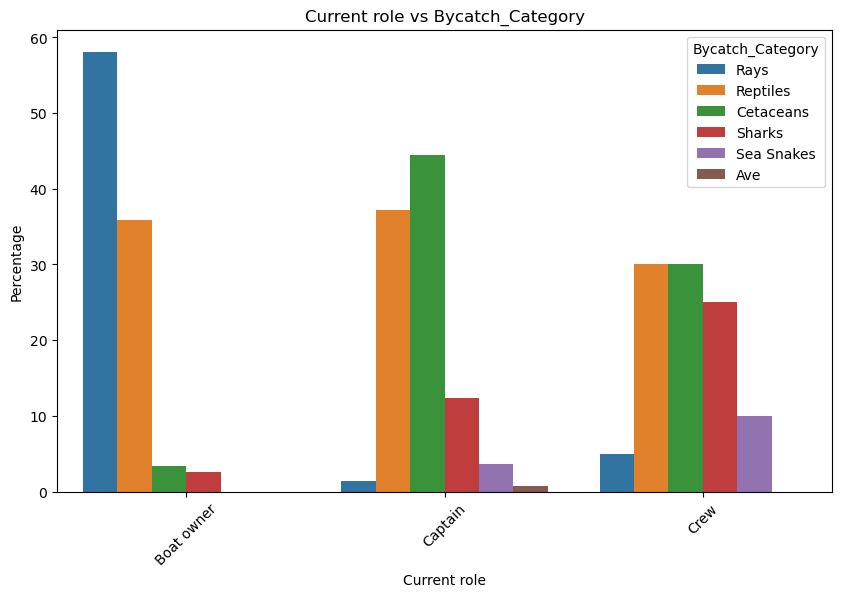

In [8]:

# Define a function to calculate percentages
def calculate_percentages(data, group_by_column, dependent_column):
    percentages = (data.groupby(group_by_column)[dependent_column].value_counts(normalize=True) * 100).reset_index(name='Percentage')
    return percentages

# Dependent Variables
dependent_variables = ['Turtle_No_DT', 'Dolphin_No_DT', 'Bycatch_Category']

# Independent Variables
independent_variables = ['Respondent', 'FishermanID', 'Village', 'District', 'Age', 'Education_Level', 'Education_Level_1',
       'Language', 'Occupation', 'Fisheries_Association_Yrs', 'Current role']

# Perform analysis for each dependent variable
for dependent_variable in dependent_variables:
    print(f"Dependent Variable: {dependent_variable}")
    print("--------------------------------------------------------")

    # Print descriptive statistics of independent variables
    print("Descriptive Statistics of Independent Variables:")
    print(survey_data[independent_variables].describe())
    print()

    # Plot bar plots for significant dependent variables against categorical independent variables
    for independent_variable in independent_variables:
        if survey_data[independent_variable].dtype == 'O':
            print(f"Independent Variable: {independent_variable}")
            print()

            percentages_data = calculate_percentages(survey_data, independent_variable, dependent_variable)
            print(percentages_data)
            print()

            plt.figure(figsize=(10, 6))
            sns.barplot(data=percentages_data, x=independent_variable, y='Percentage', hue=dependent_variable)
            plt.title(f"{independent_variable} vs {dependent_variable}")
            plt.xlabel(independent_variable)
            plt.ylabel("Percentage")
            plt.xticks(rotation=45)
            plt.legend(title=dependent_variable)

            plt.show()

    # Display a line to separate the output for different dependent variables
    print("\n" + "=" * 50 + "\n")


# Fisheries Information 

Dependent Variable: Turtle_No_DT
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Fisheries_Type_Num  Boat_Sizeft  Category_Gear_Num  Months_Gear_Used  \
count          553.000000   562.000000         239.000000        561.000000   
mean             2.370705    24.871886           1.769874          5.853832   
std              0.588238     6.938587           1.089181          2.954420   
min              1.000000    15.000000           0.000000          2.000000   
25%              2.000000    20.000000           1.000000          3.000000   
50%              2.000000    22.000000           1.000000          5.000000   
75%              3.000000    30.000000           3.000000          9.000000   
max              4.000000    40.000000           5.000000         12.000000   

       Gear_Length_(km)  Width (meters)  Mesh_Size (Millimeters/ Ungal)  \
count        567.000000      564.000000                      510.000000   

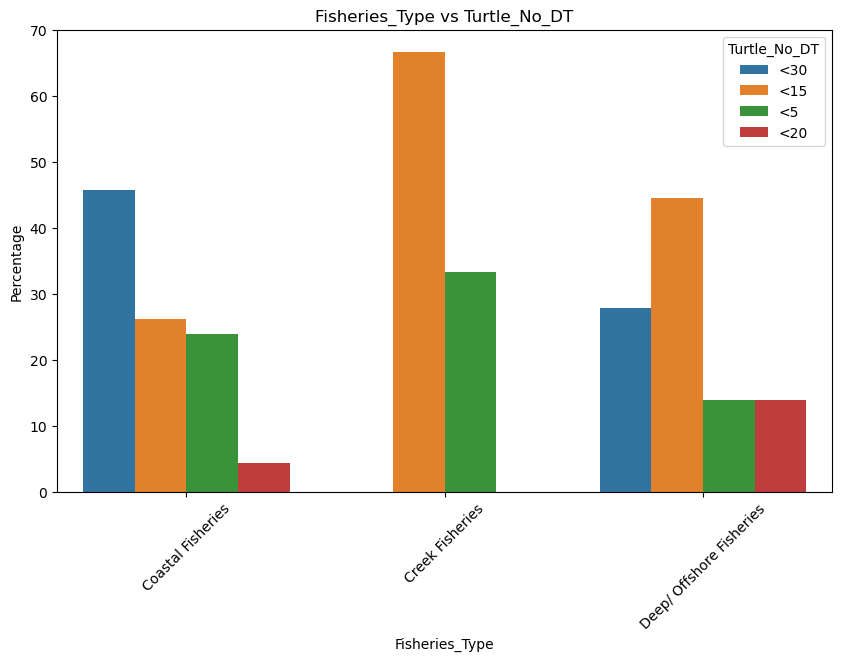

Independent Variable: Fishing_Time

   Fishing_Time Turtle_No_DT  Percentage
0   12:00:00 AM          <20  100.000000
1    1:00:00 AM          <15   41.666667
2    1:00:00 AM           <5   33.333333
3    1:00:00 AM          <30   22.916667
4    1:00:00 AM          <20    2.083333
5    1:00:00 PM          <15   83.333333
6    1:00:00 PM          <20   16.666667
7    2:00:00 AM          <30   85.714286
8    2:00:00 AM          <15    7.142857
9    2:00:00 AM           <5    7.142857
10   3:00:00 AM          <30   66.666667
11   3:00:00 AM          <15   11.111111
12   3:00:00 AM          <20   11.111111
13   3:00:00 AM           <5   11.111111
14   3:00:00 PM          <30  100.000000
15   4:00:00 PM          <15   50.000000
16   4:00:00 PM          <20   50.000000
17   4:30:00 PM          <30  100.000000
18   5:00:00 PM          <15  100.000000



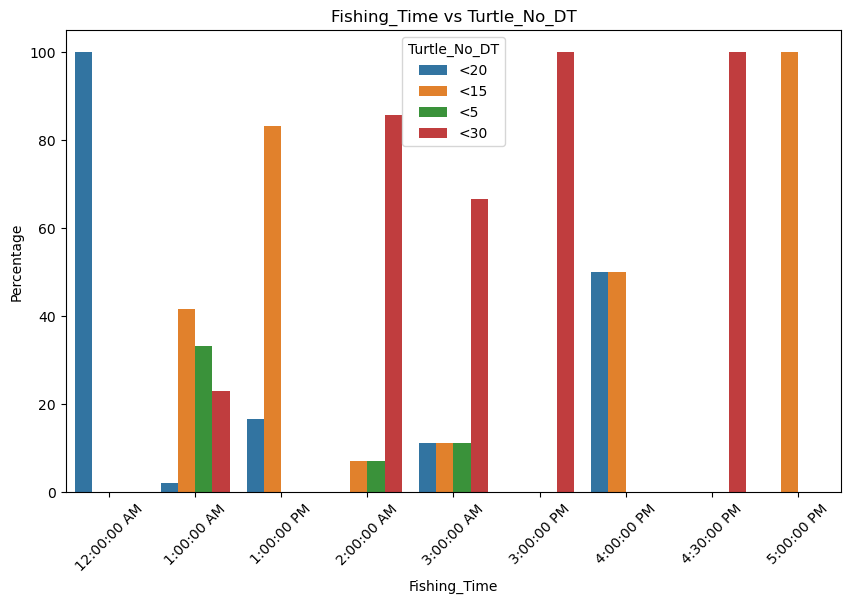

Independent Variable: Category_Gear

                       Category_Gear Turtle_No_DT  Percentage
0                          All gears          <15   60.000000
1                          All gears           <5   40.000000
2                           Handline          <30  100.000000
3                     Large Gillnets          <30   43.137255
4                     Large Gillnets          <15   25.490196
5                     Large Gillnets           <5   19.607843
6                     Large Gillnets          <20   11.764706
7                           Longline          <15  100.000000
8                    Medium Gillnets           <5   50.000000
9                    Medium Gillnets          <20   25.000000
10                   Medium Gillnets          <30   25.000000
11  Shrimp trawlers,surrounding nets          <30   52.941176
12  Shrimp trawlers,surrounding nets          <15   35.294118
13  Shrimp trawlers,surrounding nets           <5   11.764706
14                    Small Gilln

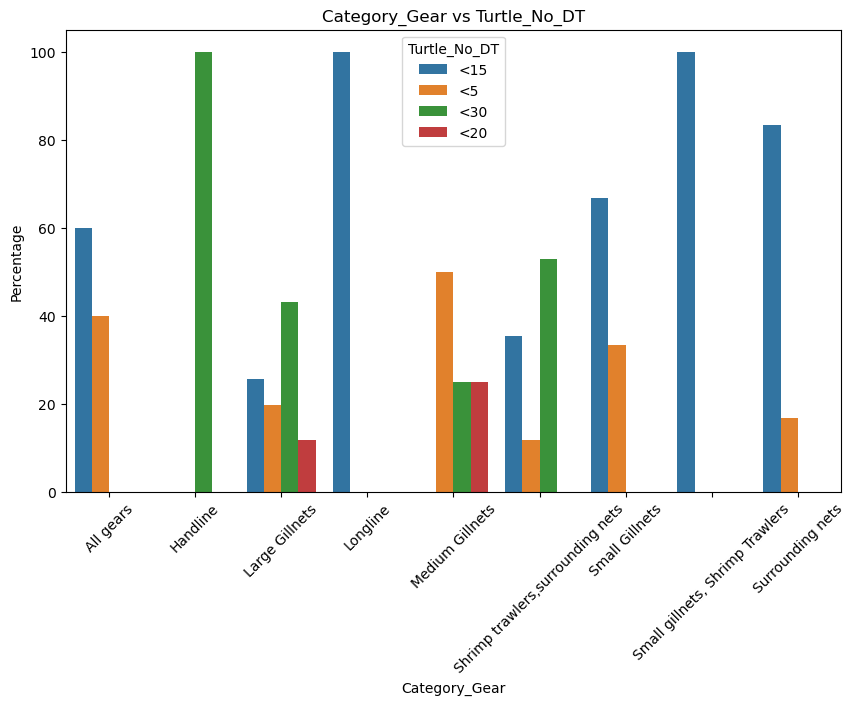

Independent Variable: Gear_Type

  Gear_Type Turtle_No_DT  Percentage
0     Drift          <30   34.782609
1     Drift          <15   33.333333
2     Drift           <5   21.739130
3     Drift          <20   10.144928
4     Fixed          <15   42.105263
5     Fixed          <30   42.105263
6     Fixed           <5   15.789474



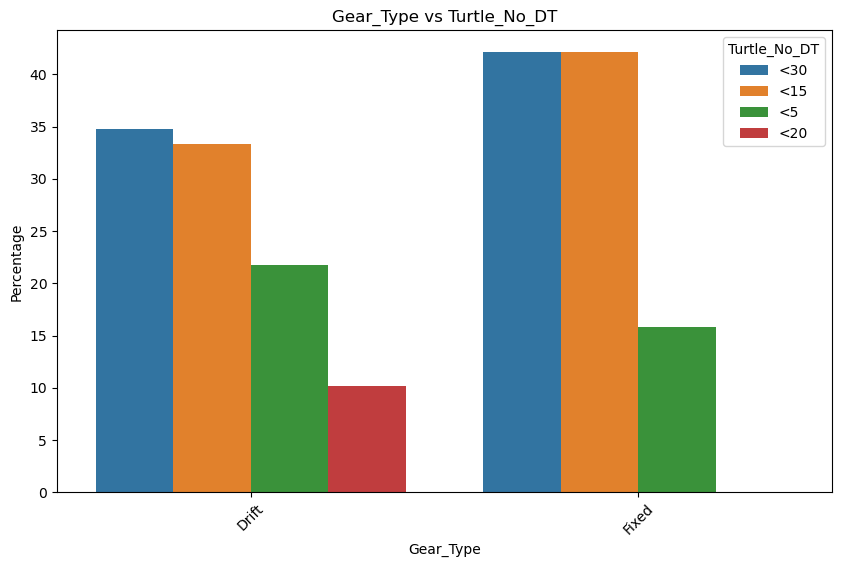

Independent Variable: Threadline

      Threadline Turtle_No_DT  Percentage
0   Monofilament          <30   61.764706
1   Monofilament           <5   23.529412
2   Monofilament          <15   11.764706
3   Monofilament          <20    2.941176
4  Multifilament          <15   45.000000
5  Multifilament          <30   25.000000
6  Multifilament           <5   17.500000
7  Multifilament          <20   12.500000



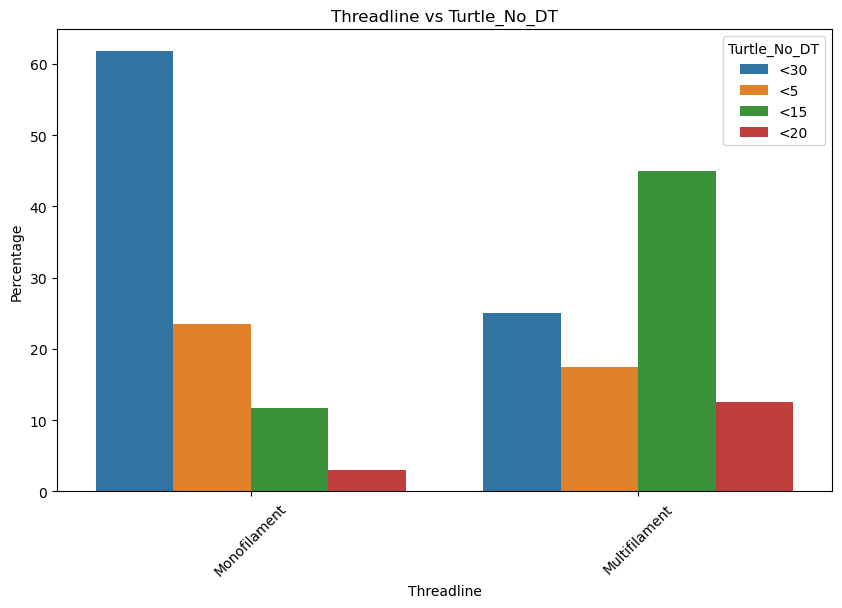

Independent Variable: Gear_Setting

         Gear_Setting Turtle_No_DT  Percentage
0              Bottom          <15   60.000000
1              Bottom          <20   20.000000
2              Bottom          <30   20.000000
3           Mid Water          <30   36.842105
4           Mid Water           <5   36.842105
5           Mid Water          <15   26.315789
6   Mid Water/ Bottom          <15   50.000000
7   Mid Water/ Bottom          <20   33.333333
8   Mid Water/ Bottom          <30   16.666667
9         Sub Surface          <30   66.666667
10        Sub Surface           <5   22.222222
11        Sub Surface          <15   11.111111
12            Surface          <30   38.636364
13            Surface          <15   34.090909
14            Surface           <5   20.454545
15            Surface          <20    6.818182
16    Surface/ Bottom          <15  100.000000



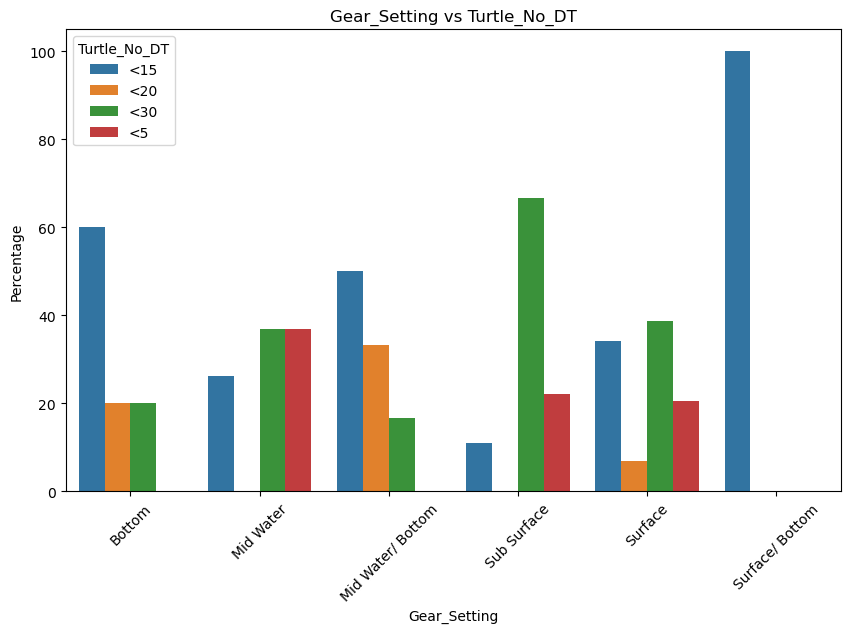

Independent Variable: Gear_Setting_Num

     Gear_Setting_Num Turtle_No_DT  Percentage
0              Bottom          <15   60.000000
1              Bottom          <20   20.000000
2              Bottom          <30   20.000000
3           Mid Water          <30   36.842105
4           Mid Water           <5   36.842105
5           Mid Water          <15   26.315789
6   Mid Water/ Bottom          <15   50.000000
7   Mid Water/ Bottom          <20   33.333333
8   Mid Water/ Bottom          <30   16.666667
9         Sub Surface          <30   66.666667
10        Sub Surface           <5   22.222222
11        Sub Surface          <15   11.111111
12            Surface          <30   38.636364
13            Surface          <15   34.090909
14            Surface           <5   20.454545
15            Surface          <20    6.818182
16    Surface/ Bottom          <15  100.000000



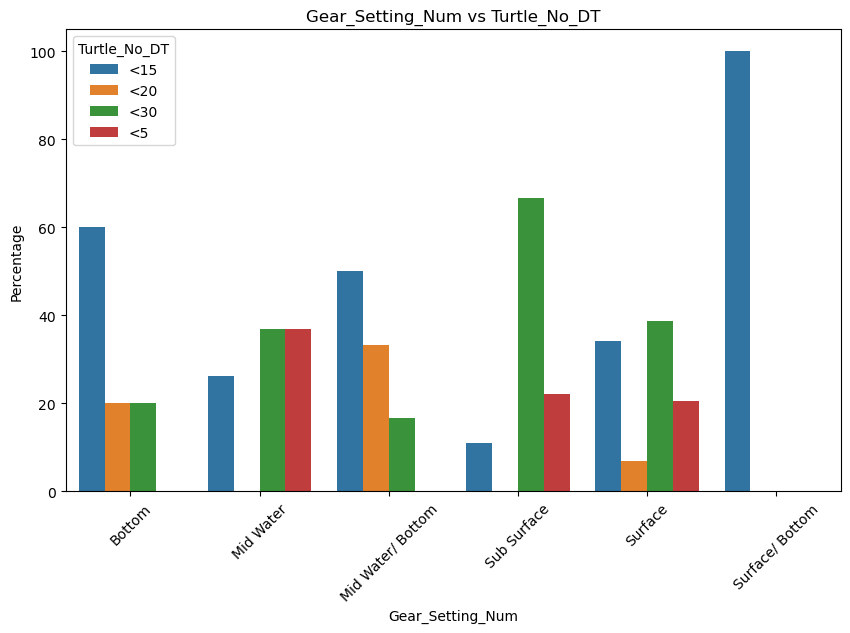

Independent Variable: Net_Colour_1

   Net_Colour_1 Turtle_No_DT  Percentage
0         Black          <15  100.000000
1          Blue          <15   40.000000
2          Blue          <30   35.000000
3          Blue           <5   20.000000
4          Blue          <20    5.000000
5         Brown           <5  100.000000
6         Green          <15   50.000000
7         Green          <20   25.000000
8         Green          <30   25.000000
9          Grey          <30   41.666667
10         Grey          <15   25.000000
11         Grey           <5   25.000000
12         Grey          <20    8.333333
13        White          <30   41.935484
14        White          <15   29.032258
15        White           <5   19.354839
16        White          <20    9.677419



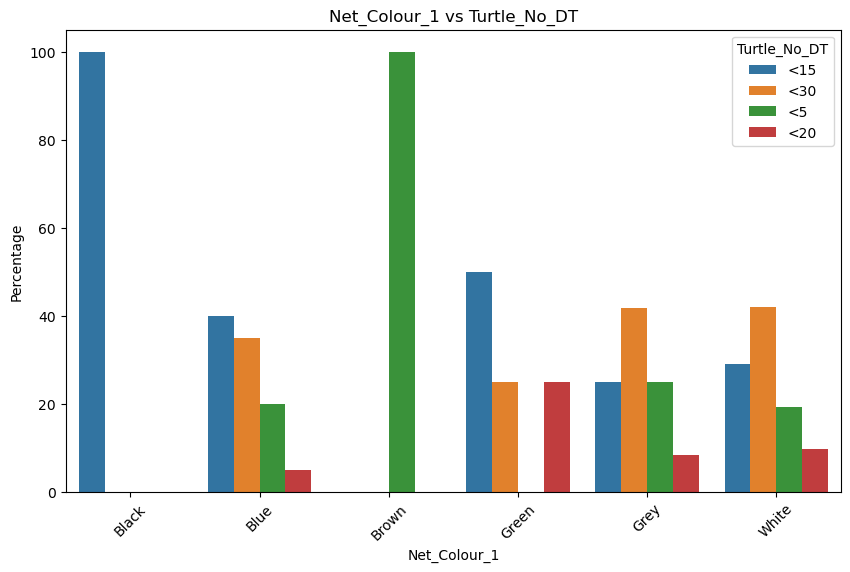

Independent Variable: Net_Colour_2

   Net_Colour_2 Turtle_No_DT  Percentage
0          Blue          <20       100.0
1         Green          <15        60.0
2         Green          <20        20.0
3         Green          <30        20.0
4          Grey          <15        50.0
5          Grey          <30        50.0
6   Transparent          <30        60.0
7   Transparent           <5        20.0
8   Transparent          <15        10.0
9   Transparent          <20        10.0
10        White          <15       100.0
11       Yellow          <15        50.0
12       Yellow          <20        50.0



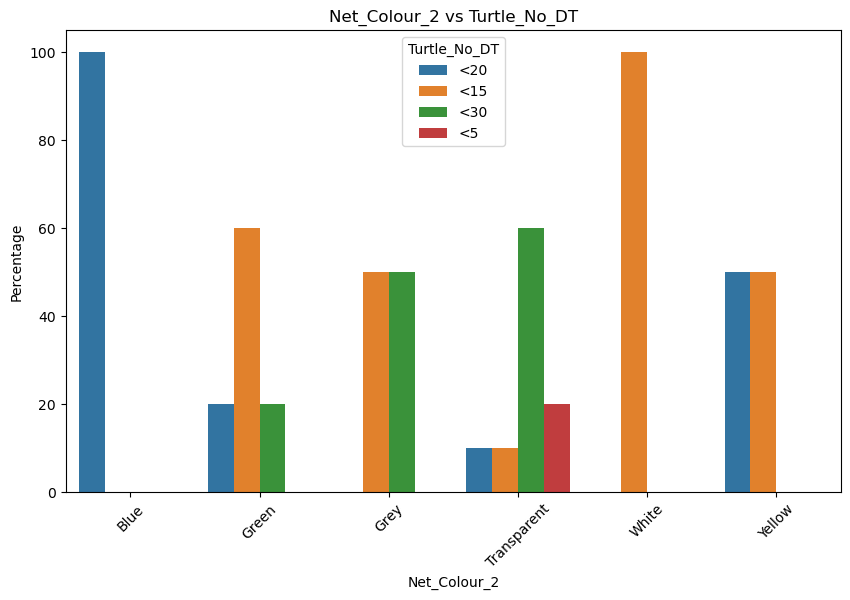

Independent Variable: Float_Type

  Float_Type Turtle_No_DT  Percentage
0    Gallons          <15  100.000000
1      Kamit          <30   45.833333
2      Kamit          <15   30.555556
3      Kamit           <5   18.055556
4      Kamit          <20    5.555556
5      Malta          <15   50.000000
6      Malta           <5   31.250000
7      Malta          <20   18.750000



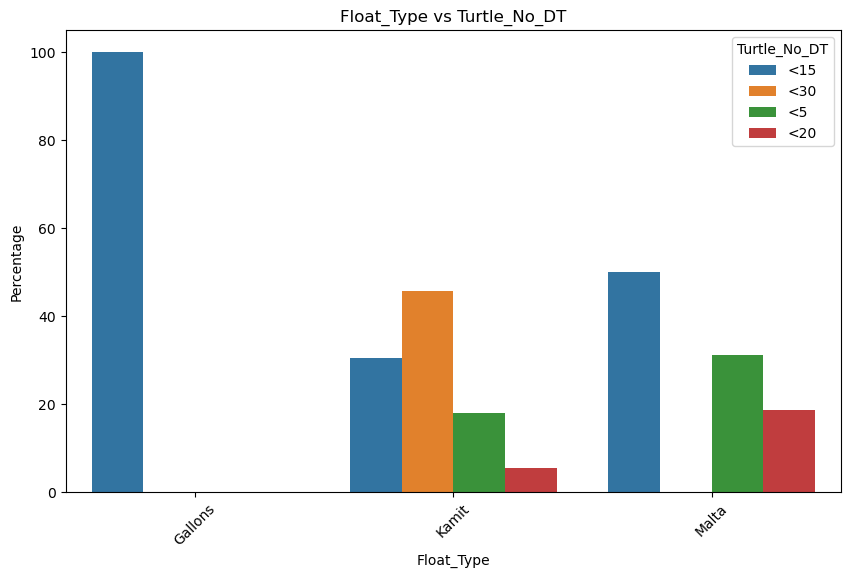

Independent Variable: Sinkers_Type

     Sinkers_Type Turtle_No_DT  Percentage
0    Lead Sinkers          <15   35.714286
1    Lead Sinkers          <20   35.714286
2    Lead Sinkers          <30   14.285714
3    Lead Sinkers           <5   14.285714
4             Nil           <5  100.000000
5         Pangara           <5  100.000000
6          Stones          <30   41.509434
7          Stones          <15   32.075472
8          Stones           <5   22.641509
9          Stones          <20    3.773585
10  Wooden Pieces          <15  100.000000



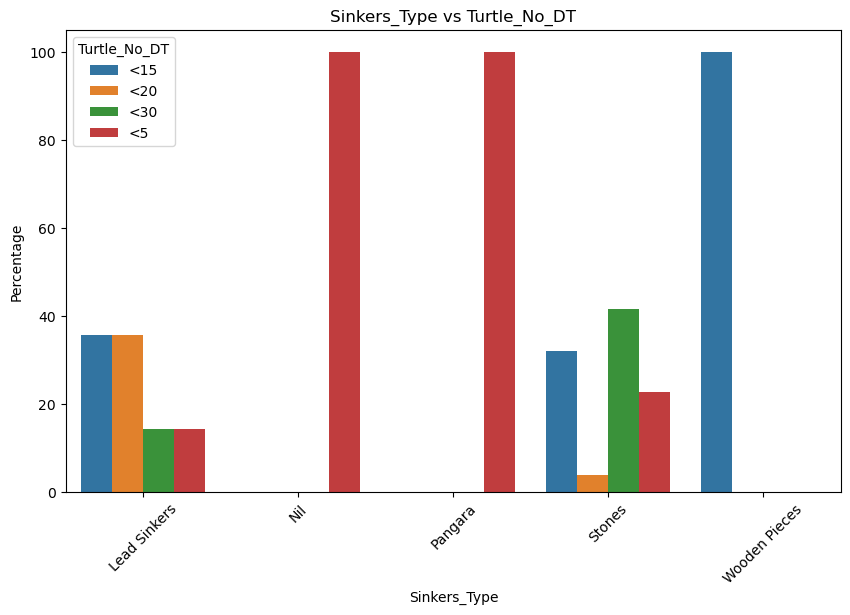

Independent Variable: Duration_Fishing_Trip_Days

   Duration_Fishing_Trip_Days Turtle_No_DT  Percentage
0                    Half Day          <15   57.142857
1                    Half Day           <5   28.571429
2                    Half Day          <20   14.285714
3                     One Day          <30   66.666667
4                     One Day           <5   16.666667
5                     One Day          <15   11.111111
6                     One Day          <20    5.555556
7                   One Month           <5   58.333333
8                   One Month          <15   41.666667
9                    One Week          <15   40.000000
10                   One Week          <30   40.000000
11                   One Week           <5   12.000000
12                   One Week          <20    8.000000
13                  Two Weeks          <30   42.307692
14                  Two Weeks          <15   34.615385
15                  Two Weeks          <20   11.538462
16             

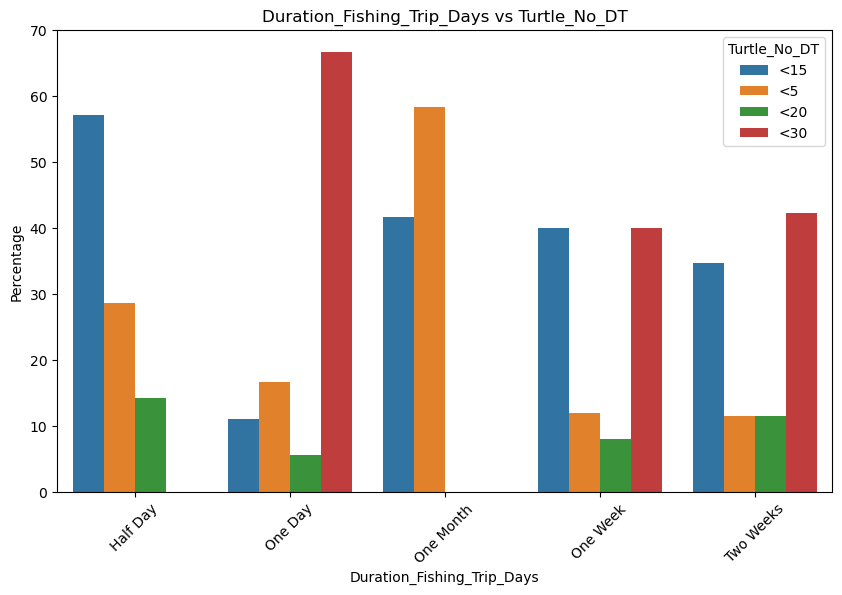

Independent Variable: Duration_Fishing_Trip_Days_1

   Duration_Fishing_Trip_Days_1 Turtle_No_DT  Percentage
0                      Half Day          <15   57.142857
1                      Half Day           <5   28.571429
2                      Half Day          <20   14.285714
3                       One Day          <30   66.666667
4                       One Day           <5   16.666667
5                       One Day          <15   11.111111
6                       One Day          <20    5.555556
7                     One Month           <5   58.333333
8                     One Month          <15   41.666667
9                      One Week          <15   40.000000
10                     One Week          <30   40.000000
11                     One Week           <5   12.000000
12                     One Week          <20    8.000000
13                    Two Weeks          <30   42.307692
14                    Two Weeks          <15   34.615385
15                    Two Weeks     

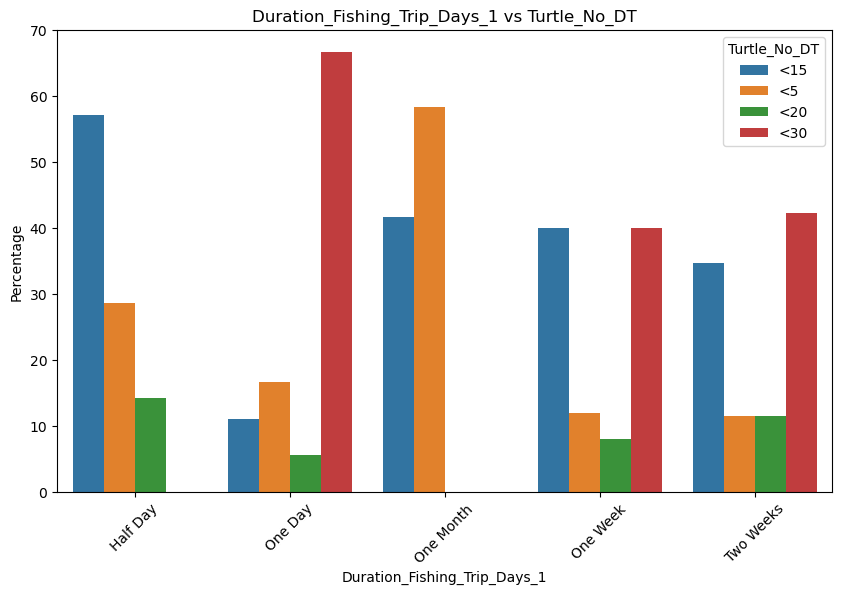

Independent Variable: Tech_Used

              Tech_Used Turtle_No_DT  Percentage
0                Lights          <30   47.500000
1                Lights          <15   25.000000
2                Lights           <5   22.500000
3                Lights          <20    5.000000
4          Mobile phone          <30  100.000000
5                  None          <15   48.717949
6                  None          <30   30.769231
7                  None           <5   15.384615
8                  None          <20    5.128205
9           Radio Buoys          <20  100.000000
10  Radio Buoys/ Lights          <20   50.000000
11  Radio Buoys/ Lights          <30   50.000000



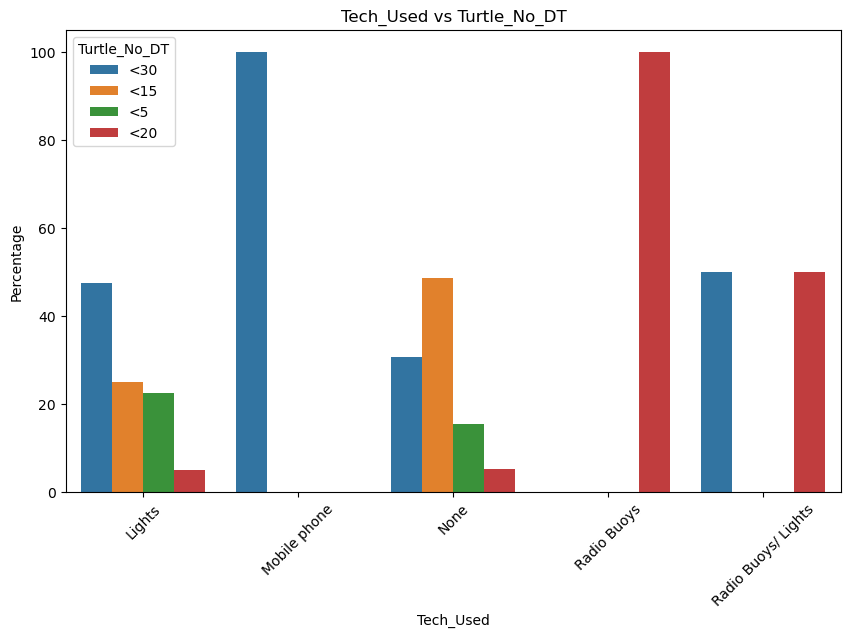

Independent Variable: Navi_commu

             Navi_commu Turtle_No_DT  Percentage
0           Fish Finder           <5   66.666667
1           Fish Finder          <15   33.333333
2   GPS Navigation Unit          <15   50.000000
3   GPS Navigation Unit          <20   31.250000
4   GPS Navigation Unit          <30   12.500000
5   GPS Navigation Unit           <5    6.250000
6   Mobile Applications          <30   48.888889
7   Mobile Applications          <15   24.444444
8   Mobile Applications           <5   22.222222
9   Mobile Applications          <20    4.444444
10                 None          <15   43.478261
11                 None          <30   39.130435
12                 None           <5   17.391304



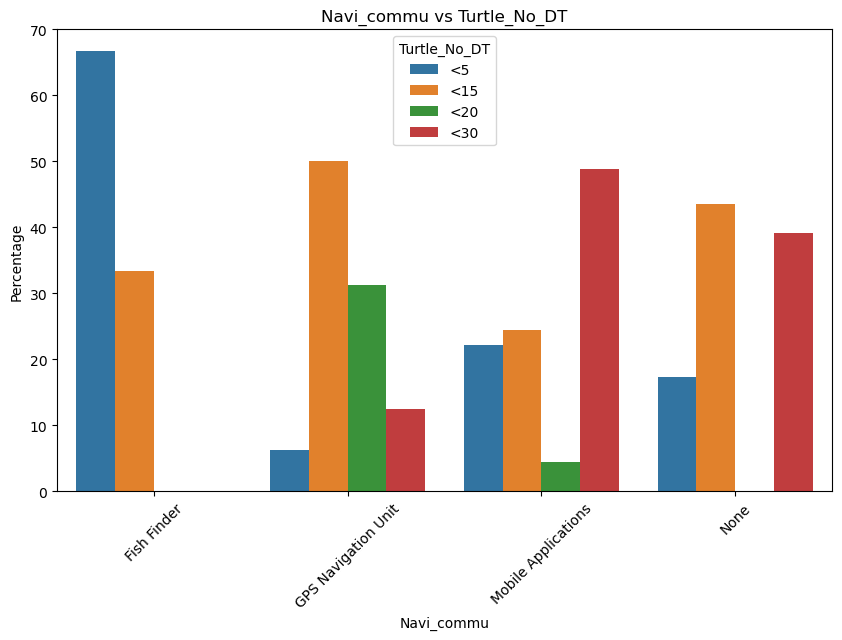

Independent Variable: Engine_Type

  Engine_Type Turtle_No_DT  Percentage
0    On-Board          <30   42.307692
1    On-Board          <15   28.205128
2    On-Board           <5   20.512821
3    On-Board          <20    8.974359
4   Out board          <15   81.818182
5   Out board           <5   18.181818



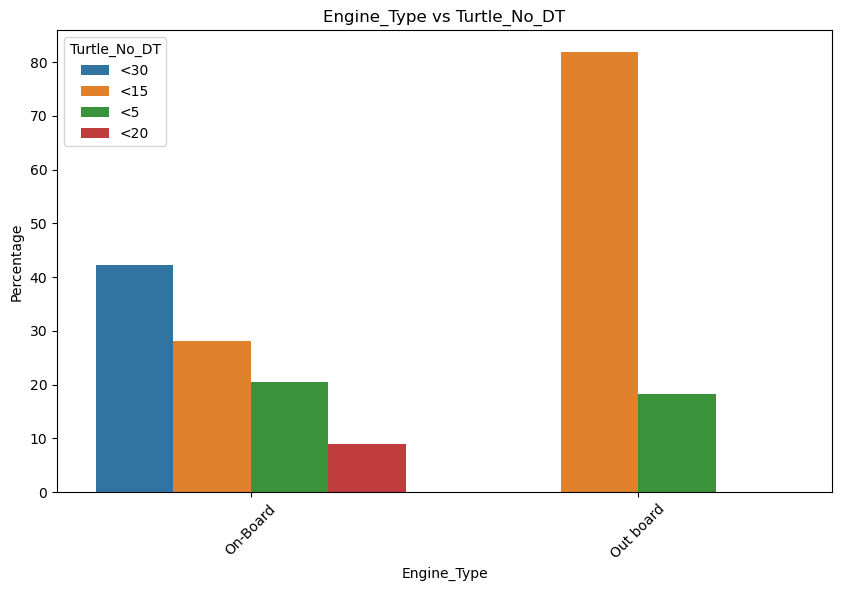



Dependent Variable: Dolphin_No_DT
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Fisheries_Type_Num  Boat_Sizeft  Category_Gear_Num  Months_Gear_Used  \
count          553.000000   562.000000         239.000000        561.000000   
mean             2.370705    24.871886           1.769874          5.853832   
std              0.588238     6.938587           1.089181          2.954420   
min              1.000000    15.000000           0.000000          2.000000   
25%              2.000000    20.000000           1.000000          3.000000   
50%              2.000000    22.000000           1.000000          5.000000   
75%              3.000000    30.000000           3.000000          9.000000   
max              4.000000    40.000000           5.000000         12.000000   

       Gear_Length_(km)  Width (meters)  Mesh_Size (Millimeters/ Ungal)  \
count        567.000000      564.000000                      510.000000

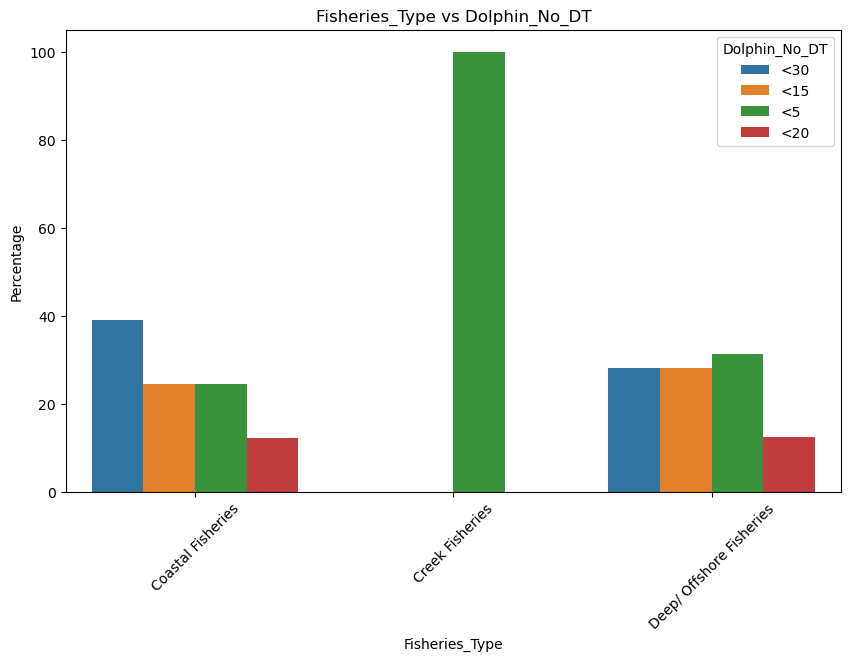

Independent Variable: Fishing_Time

   Fishing_Time Dolphin_No_DT  Percentage
0   12:00:00 AM           <30  100.000000
1    1:00:00 AM            <5   44.186047
2    1:00:00 AM           <15   25.581395
3    1:00:00 AM           <30   16.279070
4    1:00:00 AM           <20   13.953488
5    1:00:00 PM           <15   66.666667
6    1:00:00 PM            <5   33.333333
7    2:00:00 AM           <30   76.923077
8    2:00:00 AM           <15    7.692308
9    2:00:00 AM           <20    7.692308
10   2:00:00 AM            <5    7.692308
11   3:00:00 AM           <30   55.555556
12   3:00:00 AM           <15   22.222222
13   3:00:00 AM           <20   22.222222
14   4:00:00 PM           <15   60.000000
15   4:00:00 PM           <30   40.000000



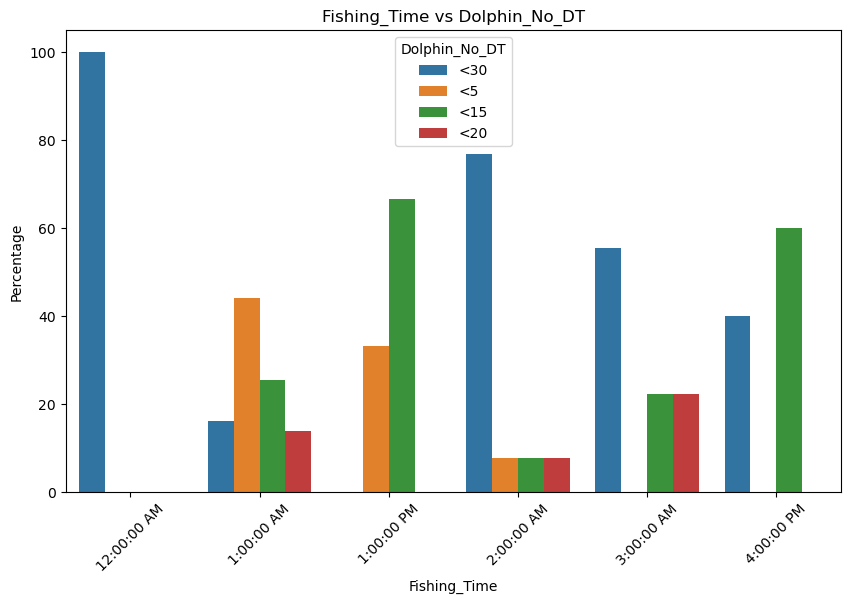

Independent Variable: Category_Gear

                       Category_Gear Dolphin_No_DT  Percentage
0                          All gears            <5   75.000000
1                          All gears           <15   25.000000
2                           Handline           <20  100.000000
3                     Large Gillnets           <30   39.024390
4                     Large Gillnets           <15   31.707317
5                     Large Gillnets            <5   17.073171
6                     Large Gillnets           <20   12.195122
7                    Medium Gillnets           <30  100.000000
8   Shrimp trawlers,surrounding nets            <5   47.368421
9   Shrimp trawlers,surrounding nets           <30   31.578947
10  Shrimp trawlers,surrounding nets           <20   15.789474
11  Shrimp trawlers,surrounding nets           <15    5.263158
12                    Small Gillnets           <15   66.666667
13                    Small Gillnets            <5   33.333333
14   Small gillnet

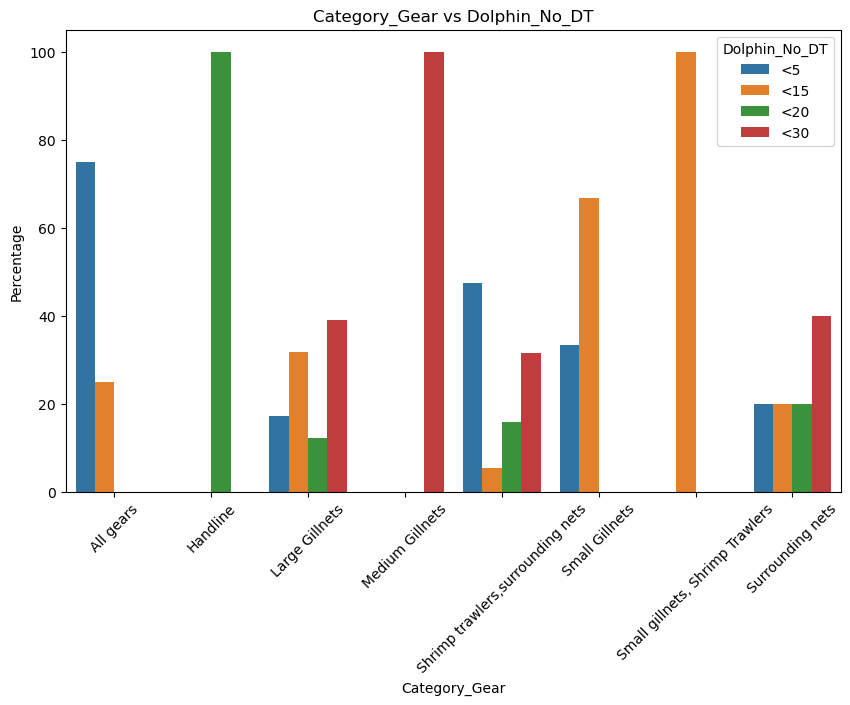

Independent Variable: Gear_Type

  Gear_Type Dolphin_No_DT  Percentage
0     Drift           <30   34.545455
1     Drift           <15   30.909091
2     Drift            <5   20.000000
3     Drift           <20   14.545455
4     Fixed            <5   50.000000
5     Fixed           <30   30.000000
6     Fixed           <15   10.000000
7     Fixed           <20   10.000000



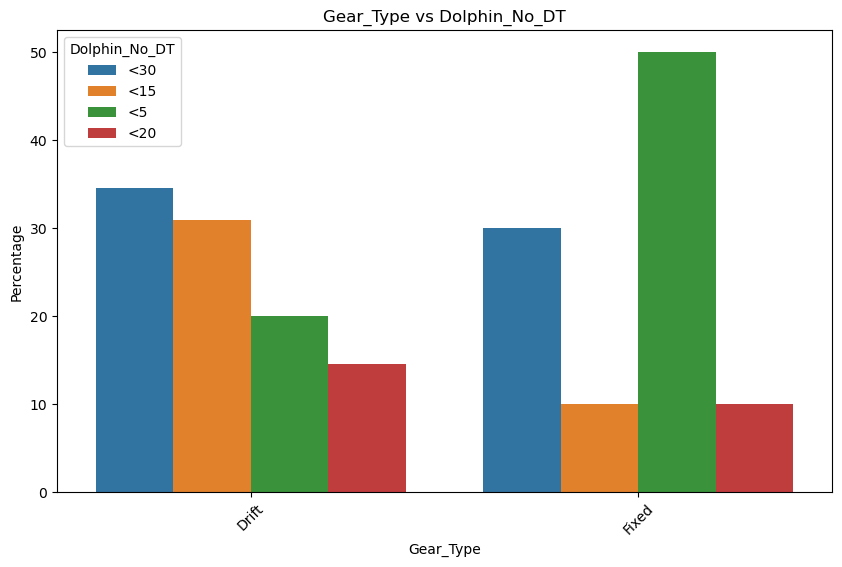

Independent Variable: Threadline

      Threadline Dolphin_No_DT  Percentage
0   Monofilament           <30   48.387097
1   Monofilament           <15   22.580645
2   Monofilament           <20   16.129032
3   Monofilament            <5   12.903226
4  Multifilament            <5   33.333333
5  Multifilament           <15   27.272727
6  Multifilament           <30   27.272727
7  Multifilament           <20   12.121212



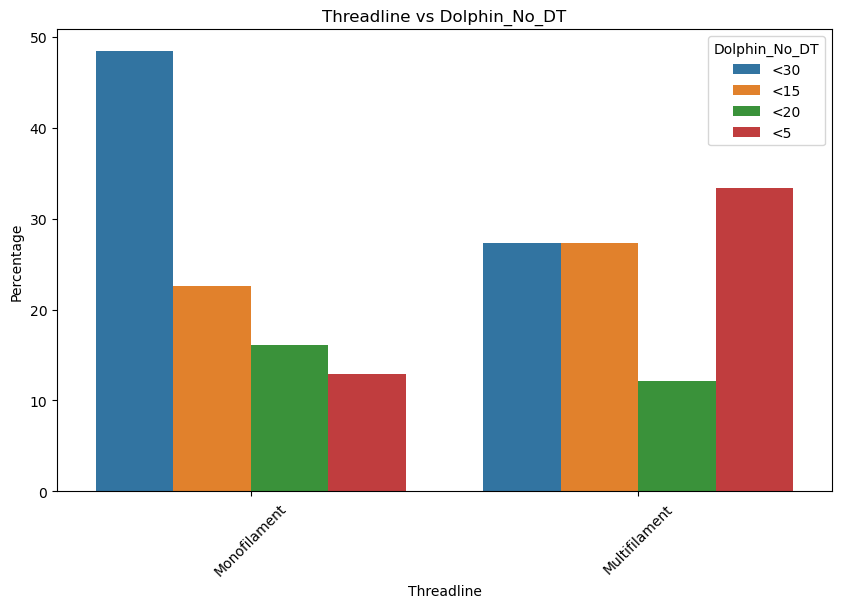

Independent Variable: Gear_Setting

         Gear_Setting Dolphin_No_DT  Percentage
0              Bottom           <15   60.000000
1              Bottom           <30   40.000000
2           Mid Water            <5   31.578947
3           Mid Water           <15   26.315789
4           Mid Water           <30   26.315789
5           Mid Water           <20   15.789474
6   Mid Water/ Bottom           <30   62.500000
7   Mid Water/ Bottom           <15   12.500000
8   Mid Water/ Bottom           <20   12.500000
9   Mid Water/ Bottom            <5   12.500000
10        Sub Surface            <5   75.000000
11        Sub Surface           <15   12.500000
12        Sub Surface           <30   12.500000
13            Surface           <30   37.142857
14            Surface           <15   22.857143
15            Surface            <5   22.857143
16            Surface           <20   17.142857
17    Surface/ Bottom           <15  100.000000



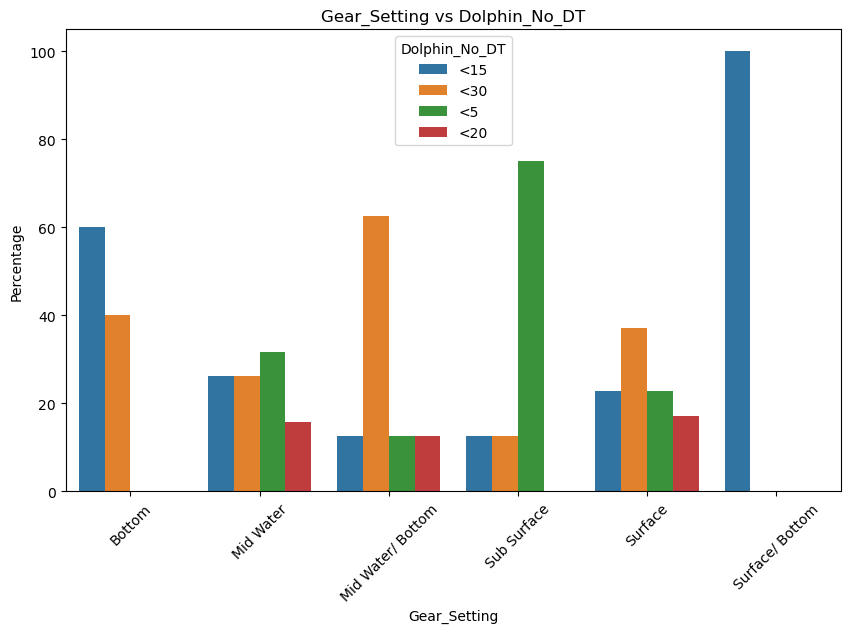

Independent Variable: Gear_Setting_Num

     Gear_Setting_Num Dolphin_No_DT  Percentage
0              Bottom           <15   60.000000
1              Bottom           <30   40.000000
2           Mid Water            <5   31.578947
3           Mid Water           <15   26.315789
4           Mid Water           <30   26.315789
5           Mid Water           <20   15.789474
6   Mid Water/ Bottom           <30   62.500000
7   Mid Water/ Bottom           <15   12.500000
8   Mid Water/ Bottom           <20   12.500000
9   Mid Water/ Bottom            <5   12.500000
10        Sub Surface            <5   75.000000
11        Sub Surface           <15   12.500000
12        Sub Surface           <30   12.500000
13            Surface           <30   37.142857
14            Surface           <15   22.857143
15            Surface            <5   22.857143
16            Surface           <20   17.142857
17    Surface/ Bottom           <15  100.000000



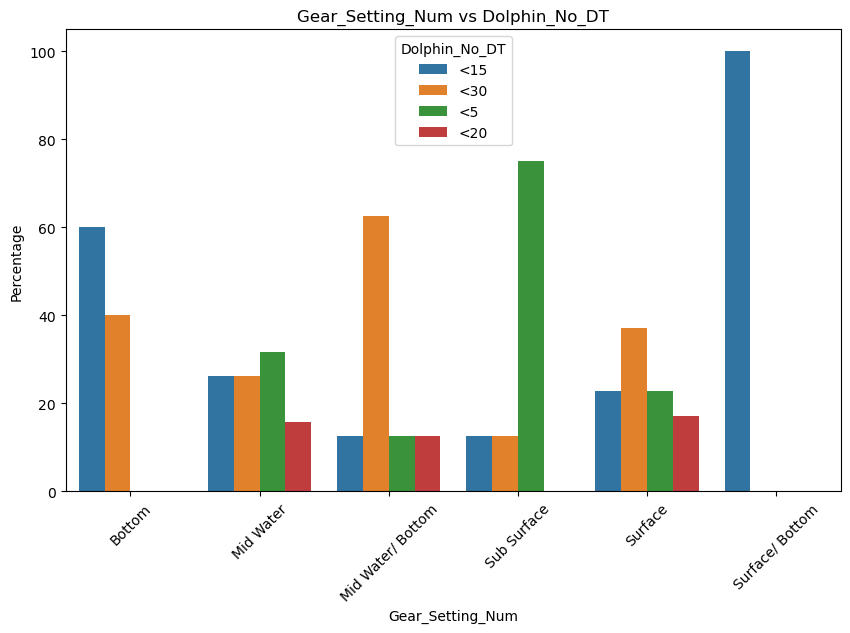

Independent Variable: Net_Colour_1

   Net_Colour_1 Dolphin_No_DT  Percentage
0          Blue           <30   36.585366
1          Blue            <5   36.585366
2          Blue           <15   19.512195
3          Blue           <20    7.317073
4         Green           <20   50.000000
5         Green           <30   50.000000
6          Grey            <5   45.454545
7          Grey           <15   27.272727
8          Grey           <30   27.272727
9         White           <15   36.363636
10        White           <30   31.818182
11        White           <20   27.272727
12        White            <5    4.545455



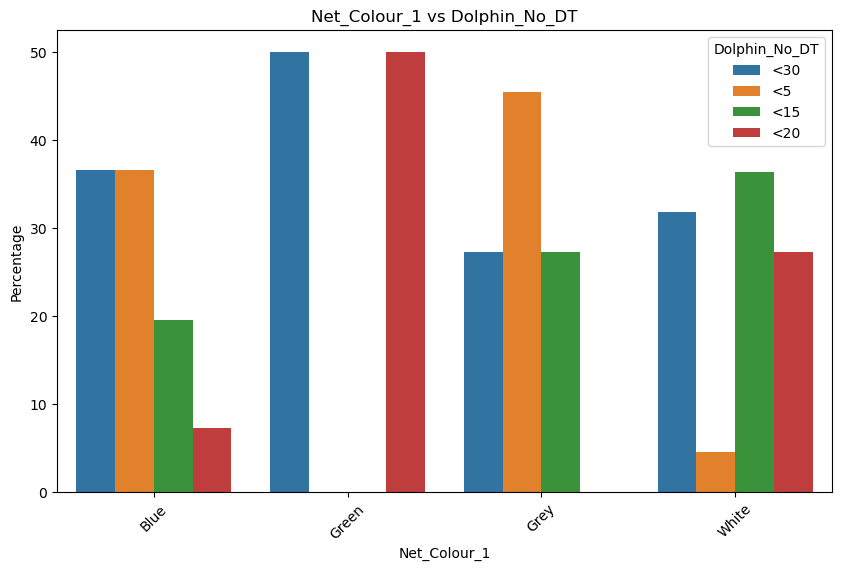

Independent Variable: Net_Colour_2

  Net_Colour_2 Dolphin_No_DT  Percentage
0         Blue           <15  100.000000
1        Green           <15   50.000000
2        Green           <30   50.000000
3  Transparent           <30   40.000000
4  Transparent           <15   33.333333
5  Transparent           <20   26.666667



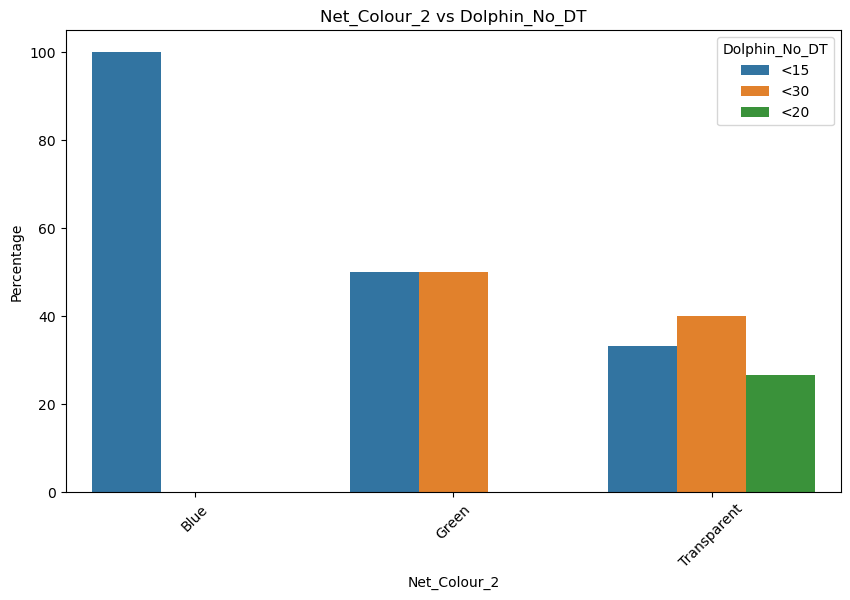

Independent Variable: Float_Type

  Float_Type Dolphin_No_DT  Percentage
0      Kamit           <30   33.823529
1      Kamit            <5   27.941176
2      Kamit           <15   23.529412
3      Kamit           <20   14.705882
4      Malta           <15   37.500000
5      Malta           <30   37.500000
6      Malta            <5   25.000000



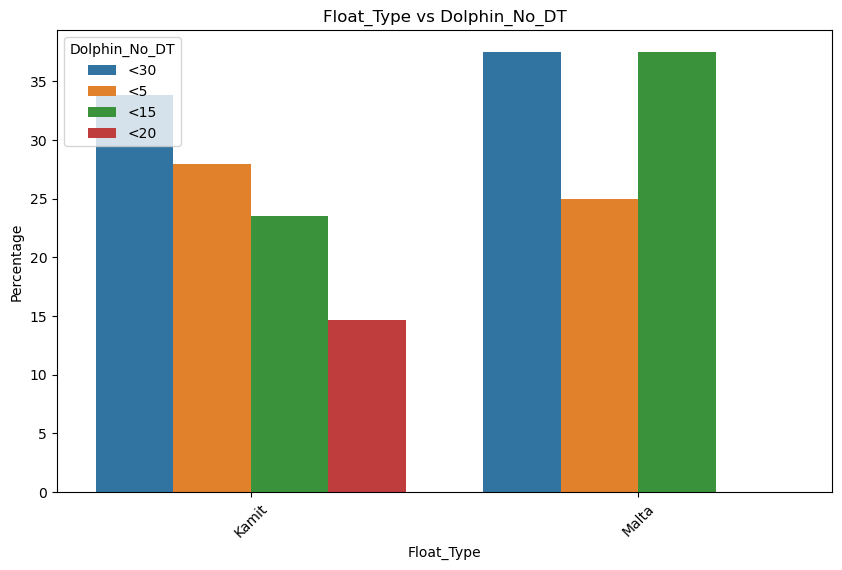

Independent Variable: Sinkers_Type

   Sinkers_Type Dolphin_No_DT  Percentage
0  Lead Sinkers           <15   55.555556
1  Lead Sinkers           <30   33.333333
2  Lead Sinkers            <5   11.111111
3       Pangara            <5  100.000000
4        Stones           <30   36.363636
5        Stones           <15   25.000000
6        Stones            <5   25.000000
7        Stones           <20   13.636364



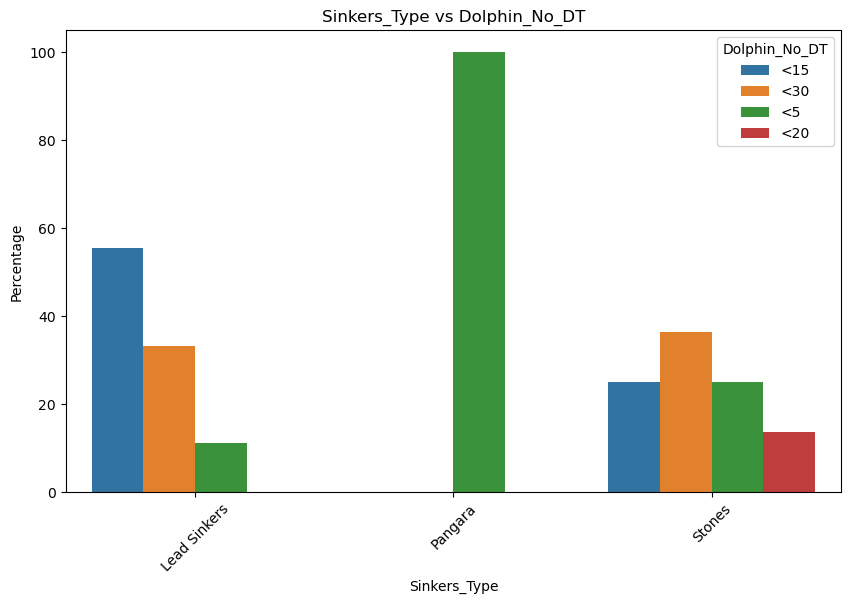

Independent Variable: Duration_Fishing_Trip_Days

   Duration_Fishing_Trip_Days Dolphin_No_DT  Percentage
0                    Half Day           <20   33.333333
1                    Half Day           <30   33.333333
2                    Half Day            <5   33.333333
3                     One Day           <30   56.250000
4                     One Day           <15   25.000000
5                     One Day            <5   12.500000
6                     One Day           <20    6.250000
7                   One Month           <15   50.000000
8                   One Month           <20   30.000000
9                   One Month           <30   10.000000
10                  One Month            <5   10.000000
11                   One Week            <5   45.454545
12                   One Week           <30   22.727273
13                   One Week           <15   18.181818
14                   One Week           <20   13.636364
15                  Two Weeks           <30   39.13043

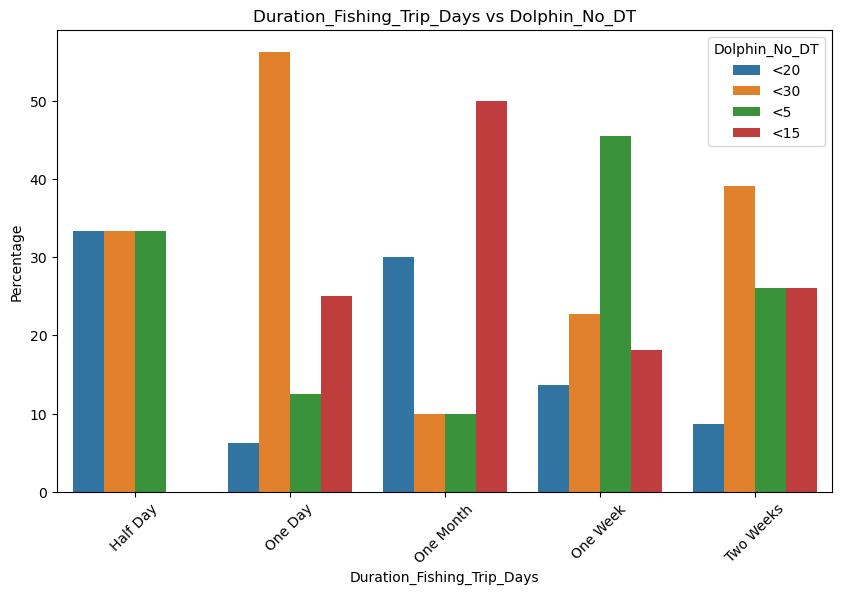

Independent Variable: Duration_Fishing_Trip_Days_1

   Duration_Fishing_Trip_Days_1 Dolphin_No_DT  Percentage
0                      Half Day           <20   33.333333
1                      Half Day           <30   33.333333
2                      Half Day            <5   33.333333
3                       One Day           <30   56.250000
4                       One Day           <15   25.000000
5                       One Day            <5   12.500000
6                       One Day           <20    6.250000
7                     One Month           <15   50.000000
8                     One Month           <20   30.000000
9                     One Month           <30   10.000000
10                    One Month            <5   10.000000
11                     One Week            <5   45.454545
12                     One Week           <30   22.727273
13                     One Week           <15   18.181818
14                     One Week           <20   13.636364
15                  

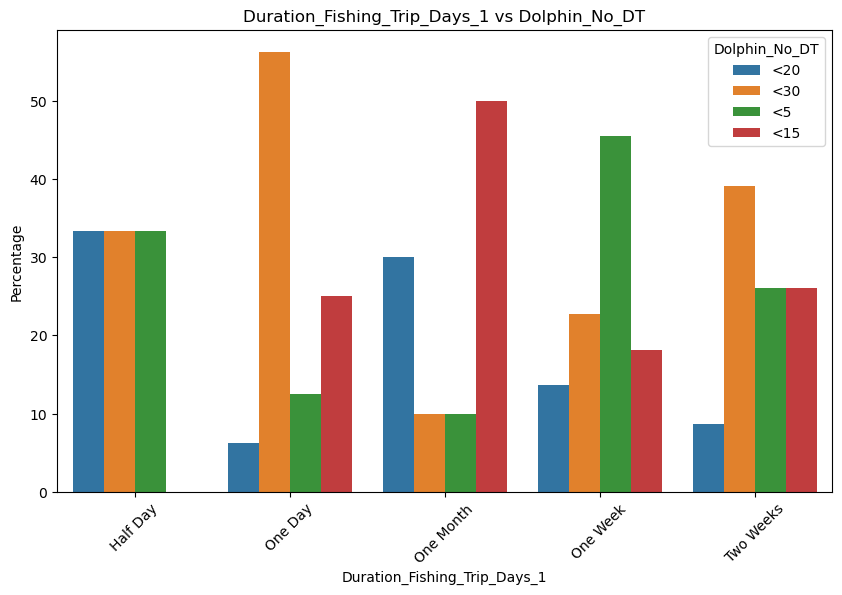

Independent Variable: Tech_Used

     Tech_Used Dolphin_No_DT  Percentage
0       Lights           <30   44.117647
1       Lights           <15   26.470588
2       Lights           <20   14.705882
3       Lights            <5   14.705882
4         None            <5   39.473684
5         None           <30   26.315789
6         None           <15   21.052632
7         None           <20   13.157895
8  Radio Buoys           <15  100.000000



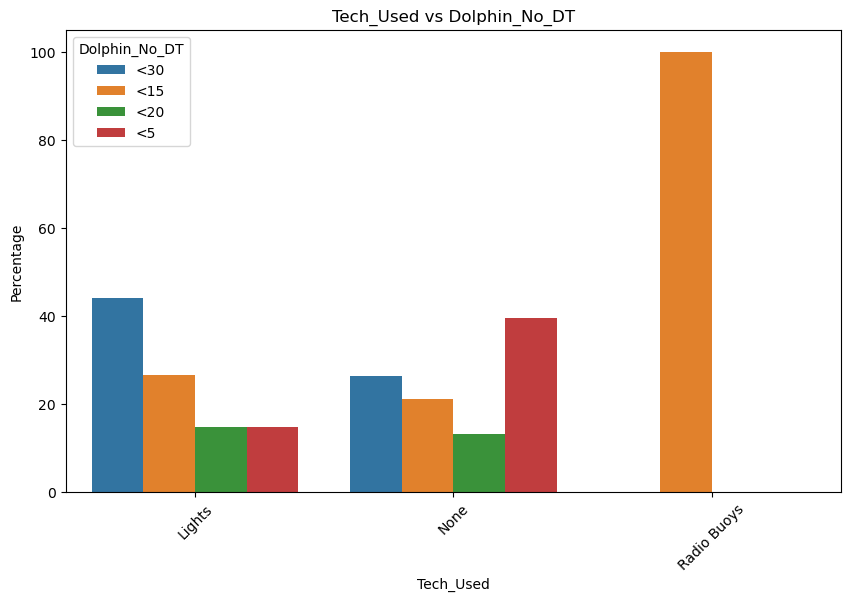

Independent Variable: Navi_commu

             Navi_commu Dolphin_No_DT  Percentage
0           Fish Finder            <5   66.666667
1           Fish Finder           <15   33.333333
2   GPS Navigation Unit           <15   50.000000
3   GPS Navigation Unit           <30   25.000000
4   GPS Navigation Unit            <5   25.000000
5   Mobile Applications           <30   41.025641
6   Mobile Applications           <15   23.076923
7   Mobile Applications            <5   20.512821
8   Mobile Applications           <20   15.384615
9                  None            <5   37.500000
10                 None           <30   29.166667
11                 None           <15   16.666667
12                 None           <20   16.666667



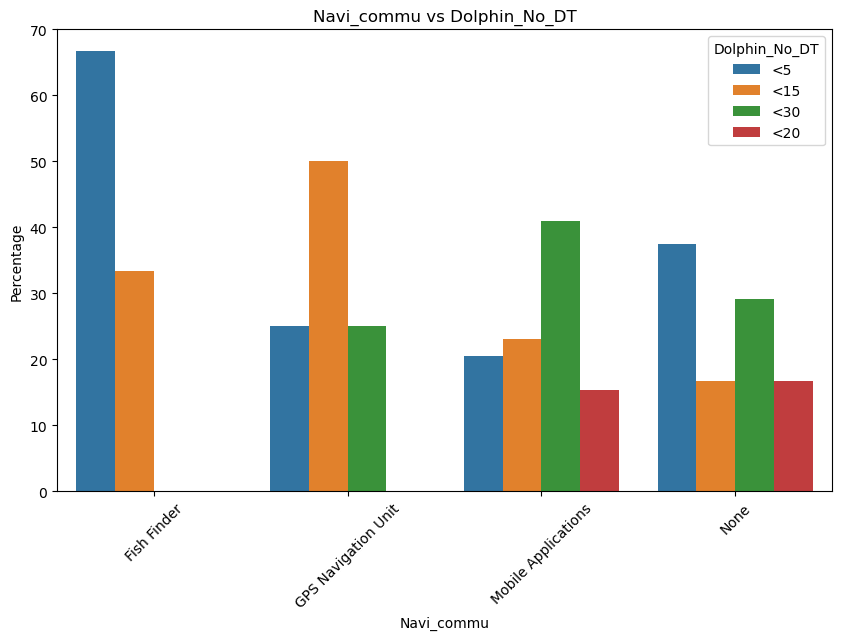

Independent Variable: Engine_Type

  Engine_Type Dolphin_No_DT  Percentage
0    On-Board           <30   38.461538
1    On-Board           <15   23.076923
2    On-Board            <5   23.076923
3    On-Board           <20   15.384615
4   Out board            <5   66.666667
5   Out board           <15   33.333333



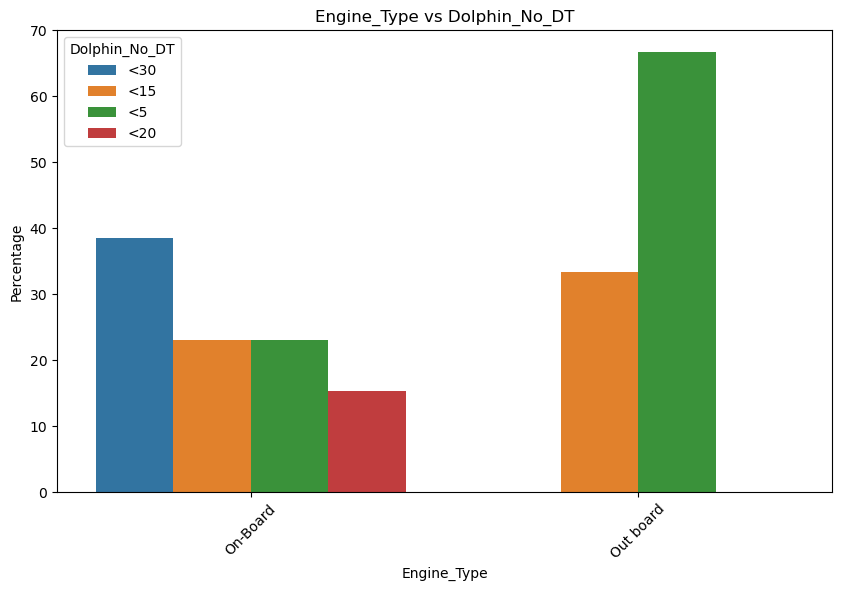



Dependent Variable: Bycatch_Category
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Fisheries_Type_Num  Boat_Sizeft  Category_Gear_Num  Months_Gear_Used  \
count          553.000000   562.000000         239.000000        561.000000   
mean             2.370705    24.871886           1.769874          5.853832   
std              0.588238     6.938587           1.089181          2.954420   
min              1.000000    15.000000           0.000000          2.000000   
25%              2.000000    20.000000           1.000000          3.000000   
50%              2.000000    22.000000           1.000000          5.000000   
75%              3.000000    30.000000           3.000000          9.000000   
max              4.000000    40.000000           5.000000         12.000000   

       Gear_Length_(km)  Width (meters)  Mesh_Size (Millimeters/ Ungal)  \
count        567.000000      564.000000                      510.000

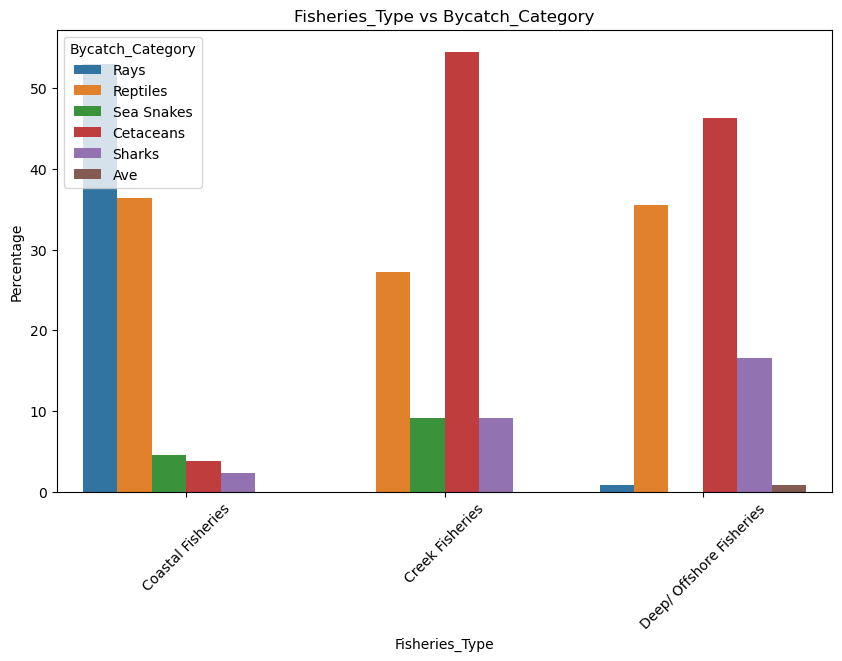

Independent Variable: Fishing_Time

   Fishing_Time Bycatch_Category  Percentage
0   12:00:00 AM             Rays   50.000000
1   12:00:00 AM         Reptiles   50.000000
2    1:00:00 AM         Reptiles   39.156627
3    1:00:00 AM        Cetaceans   27.710843
4    1:00:00 AM             Rays   22.891566
5    1:00:00 AM           Sharks    5.421687
6    1:00:00 AM       Sea Snakes    4.216867
7    1:00:00 AM              Ave    0.602410
8    1:00:00 PM        Cetaceans   57.692308
9    1:00:00 PM         Reptiles   23.076923
10   1:00:00 PM           Sharks   19.230769
11   2:00:00 AM             Rays   58.620690
12   2:00:00 AM         Reptiles   41.379310
13   3:00:00 AM             Rays   60.000000
14   3:00:00 AM         Reptiles   40.000000
15   3:00:00 PM        Cetaceans   50.000000
16   3:00:00 PM           Sharks   50.000000
17   4:00:00 PM        Cetaceans   40.000000
18   4:00:00 PM           Sharks   40.000000
19   4:00:00 PM         Reptiles   20.000000
20   4:30:00 PM    

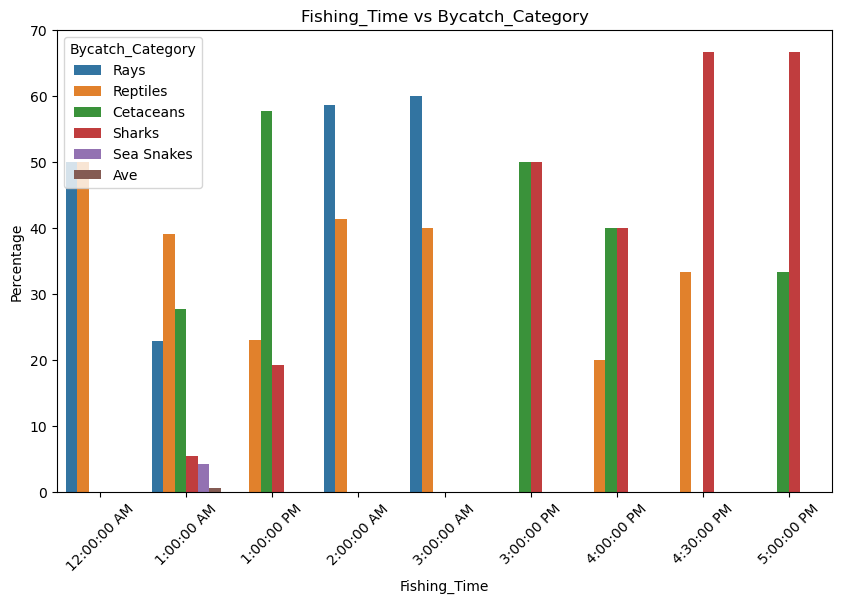

Independent Variable: Category_Gear

                       Category_Gear Bycatch_Category  Percentage
0                          All gears             Rays   63.636364
1                          All gears         Reptiles   36.363636
2                           Handline             Rays   50.000000
3                           Handline         Reptiles   50.000000
4                     Large Gillnets             Rays   43.065693
5                     Large Gillnets         Reptiles   32.116788
6                     Large Gillnets        Cetaceans   13.138686
7                     Large Gillnets           Sharks   11.678832
8                           Longline        Cetaceans   66.666667
9                           Longline         Reptiles   33.333333
10                   Medium Gillnets         Reptiles   37.037037
11                   Medium Gillnets       Sea Snakes   22.222222
12                   Medium Gillnets        Cetaceans   18.518519
13                   Medium Gillnets   

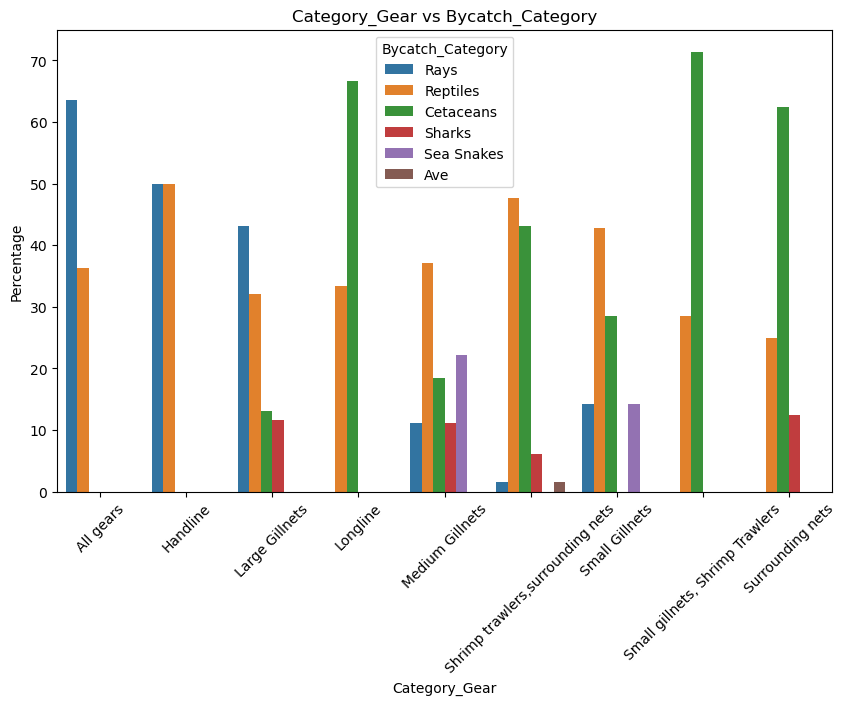

Independent Variable: Gear_Type

  Gear_Type Bycatch_Category  Percentage
0     Drift         Reptiles   35.406699
1     Drift             Rays   33.971292
2     Drift        Cetaceans   17.703349
3     Drift           Sharks    9.569378
4     Drift       Sea Snakes    3.349282
5     Fixed        Cetaceans   50.793651
6     Fixed         Reptiles   38.095238
7     Fixed           Sharks    7.936508
8     Fixed              Ave    1.587302
9     Fixed             Rays    1.587302



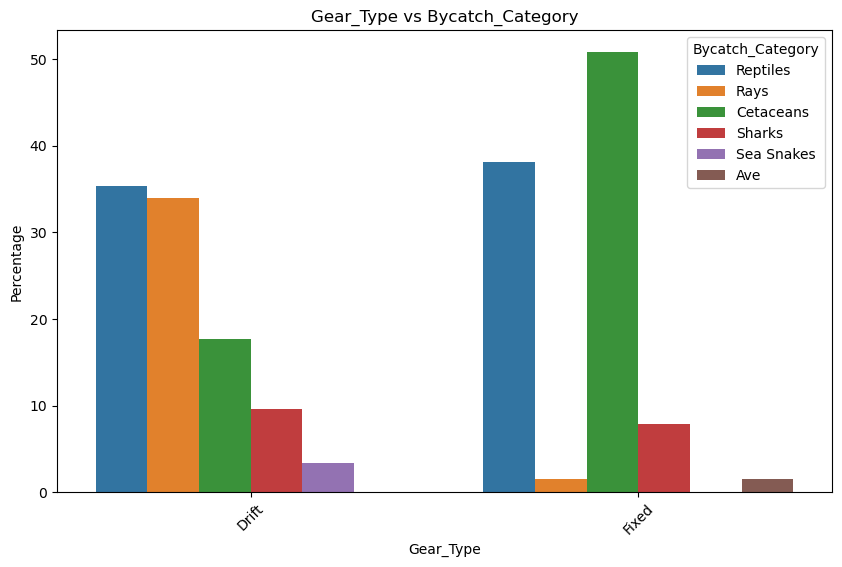

Independent Variable: Threadline

      Threadline Bycatch_Category  Percentage
0          Lines        Cetaceans  100.000000
1   Monofilament             Rays   60.465116
2   Monofilament         Reptiles   37.209302
3   Monofilament           Sharks    2.325581
4  Multifilament        Cetaceans   43.421053
5  Multifilament         Reptiles   35.526316
6  Multifilament           Sharks   13.815789
7  Multifilament       Sea Snakes    4.605263
8  Multifilament             Rays    1.973684
9  Multifilament              Ave    0.657895



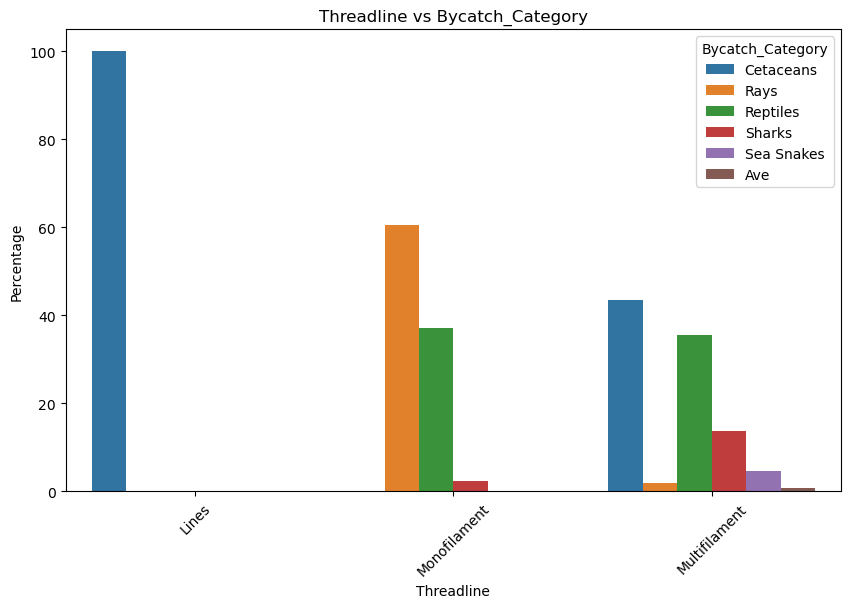

Independent Variable: Gear_Setting

         Gear_Setting Bycatch_Category  Percentage
0              Bottom        Cetaceans   45.454545
1              Bottom           Sharks   36.363636
2              Bottom         Reptiles   18.181818
3           Mid Water             Rays   51.063830
4           Mid Water         Reptiles   34.042553
5           Mid Water        Cetaceans   10.638298
6           Mid Water           Sharks    4.255319
7   Mid Water/ Bottom        Cetaceans   47.619048
8   Mid Water/ Bottom         Reptiles   42.857143
9   Mid Water/ Bottom              Ave    4.761905
10  Mid Water/ Bottom           Sharks    4.761905
11        Sub Surface        Cetaceans   44.444444
12        Sub Surface         Reptiles   44.444444
13        Sub Surface           Sharks    7.407407
14        Sub Surface             Rays    3.703704
15            Surface         Reptiles   38.513514
16            Surface             Rays   31.756757
17            Surface        Cetaceans   19.59

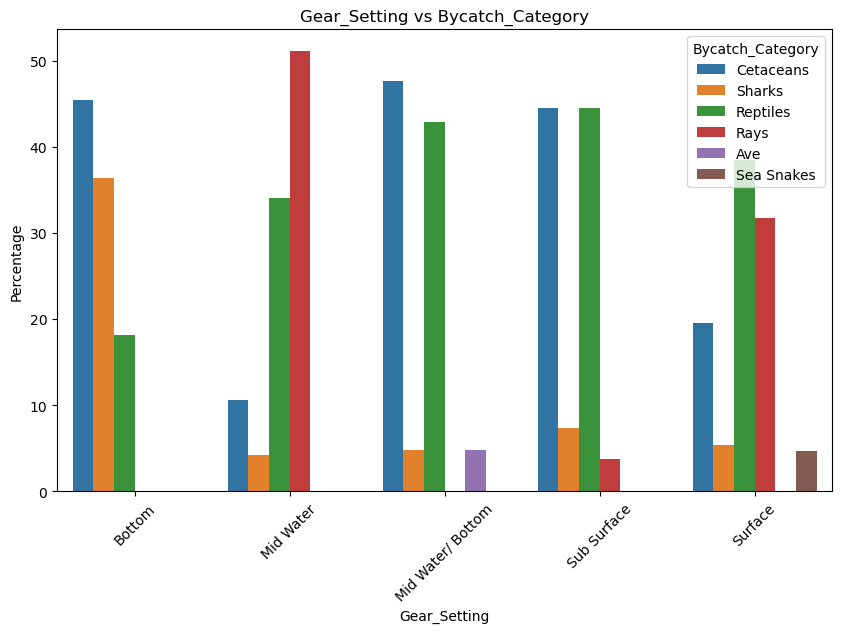

Independent Variable: Gear_Setting_Num

     Gear_Setting_Num Bycatch_Category  Percentage
0              Bottom        Cetaceans   45.454545
1              Bottom           Sharks   36.363636
2              Bottom         Reptiles   18.181818
3           Mid Water             Rays   51.063830
4           Mid Water         Reptiles   34.042553
5           Mid Water        Cetaceans   10.638298
6           Mid Water           Sharks    4.255319
7   Mid Water/ Bottom        Cetaceans   47.619048
8   Mid Water/ Bottom         Reptiles   42.857143
9   Mid Water/ Bottom              Ave    4.761905
10  Mid Water/ Bottom           Sharks    4.761905
11        Sub Surface        Cetaceans   44.444444
12        Sub Surface         Reptiles   44.444444
13        Sub Surface           Sharks    7.407407
14        Sub Surface             Rays    3.703704
15            Surface         Reptiles   38.513514
16            Surface             Rays   31.756757
17            Surface        Cetaceans   1

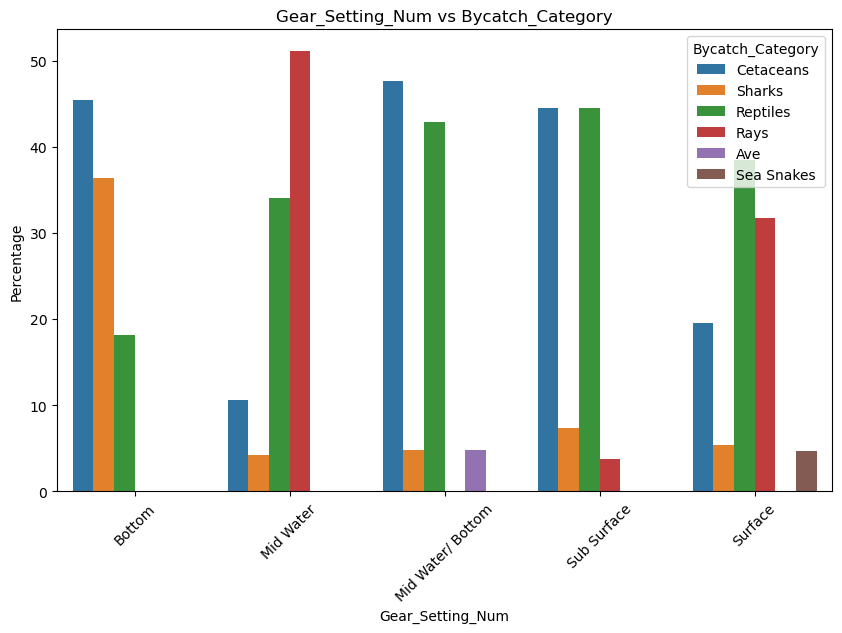

Independent Variable: Net_Colour_1

   Net_Colour_1 Bycatch_Category  Percentage
0         Black        Cetaceans  100.000000
1          Blue             Rays   33.070866
2          Blue         Reptiles   30.708661
3          Blue        Cetaceans   26.771654
4          Blue           Sharks    7.874016
5          Blue              Ave    0.787402
6          Blue       Sea Snakes    0.787402
7         Brown        Cetaceans   50.000000
8         Brown         Reptiles   50.000000
9         Green         Reptiles   41.666667
10        Green        Cetaceans   33.333333
11        Green             Rays    8.333333
12        Green       Sea Snakes    8.333333
13        Green           Sharks    8.333333
14         Grey         Reptiles   42.424242
15         Grey        Cetaceans   33.333333
16         Grey           Sharks   18.181818
17         Grey             Rays    6.060606
18        White         Reptiles   41.000000
19        White             Rays   27.000000
20        White    

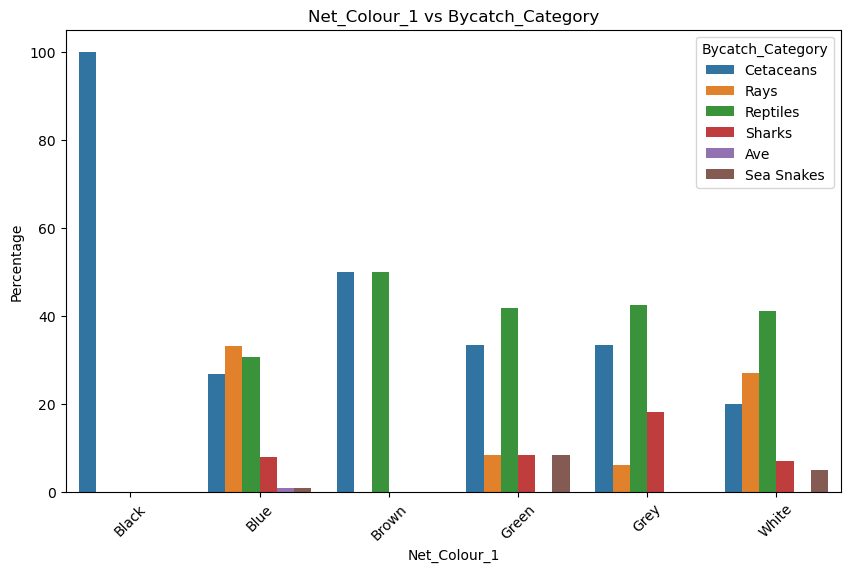

Independent Variable: Net_Colour_2

   Net_Colour_2 Bycatch_Category  Percentage
0          Blue        Cetaceans   50.000000
1          Blue           Sharks   50.000000
2         Green           Sharks   44.444444
3         Green        Cetaceans   33.333333
4         Green         Reptiles   22.222222
5          Grey        Cetaceans   50.000000
6          Grey           Sharks   50.000000
7   Transparent         Reptiles   42.424242
8   Transparent             Rays   40.909091
9   Transparent       Sea Snakes    7.575758
10  Transparent        Cetaceans    6.060606
11  Transparent           Sharks    3.030303
12        White        Cetaceans   50.000000
13        White         Reptiles   50.000000
14       Yellow        Cetaceans   50.000000
15       Yellow         Reptiles   25.000000
16       Yellow           Sharks   25.000000



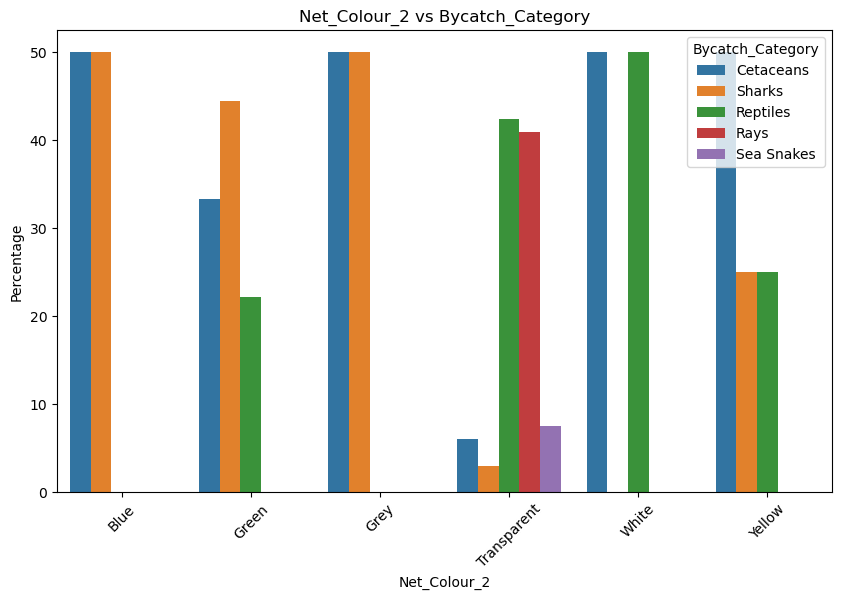

Independent Variable: Float_Type

         Float_Type Bycatch_Category  Percentage
0           Gallons        Cetaceans   50.000000
1           Gallons       Sea Snakes   25.000000
2           Gallons           Sharks   25.000000
3             Kamit         Reptiles   37.244898
4             Kamit             Rays   33.673469
5             Kamit        Cetaceans   20.408163
6             Kamit           Sharks    8.163265
7             Kamit              Ave    0.510204
8             Malta        Cetaceans   38.356164
9             Malta         Reptiles   35.616438
10            Malta           Sharks   10.958904
11            Malta             Rays    8.219178
12            Malta       Sea Snakes    6.849315
13  Plastic Bottles        Cetaceans   33.333333
14  Plastic Bottles         Reptiles   33.333333
15  Plastic Bottles       Sea Snakes   33.333333



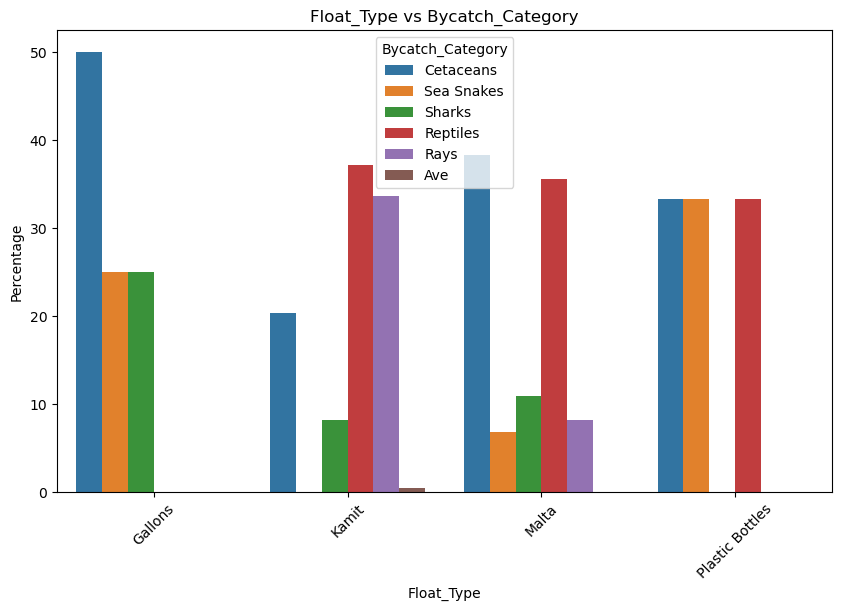

Independent Variable: Sinkers_Type

         Sinkers_Type Bycatch_Category  Percentage
0   Cemented and Clay        Cetaceans  100.000000
1        Lead Sinkers        Cetaceans   42.857143
2        Lead Sinkers           Sharks   30.952381
3        Lead Sinkers         Reptiles   26.190476
4                 Nil        Cetaceans   50.000000
5                 Nil         Reptiles   50.000000
6             Pangara        Cetaceans   50.000000
7             Pangara         Reptiles   50.000000
8              Stones             Rays   44.936709
9              Stones         Reptiles   34.810127
10             Stones        Cetaceans   10.126582
11             Stones           Sharks    5.696203
12             Stones       Sea Snakes    4.430380
13      Wooden Pieces        Cetaceans  100.000000



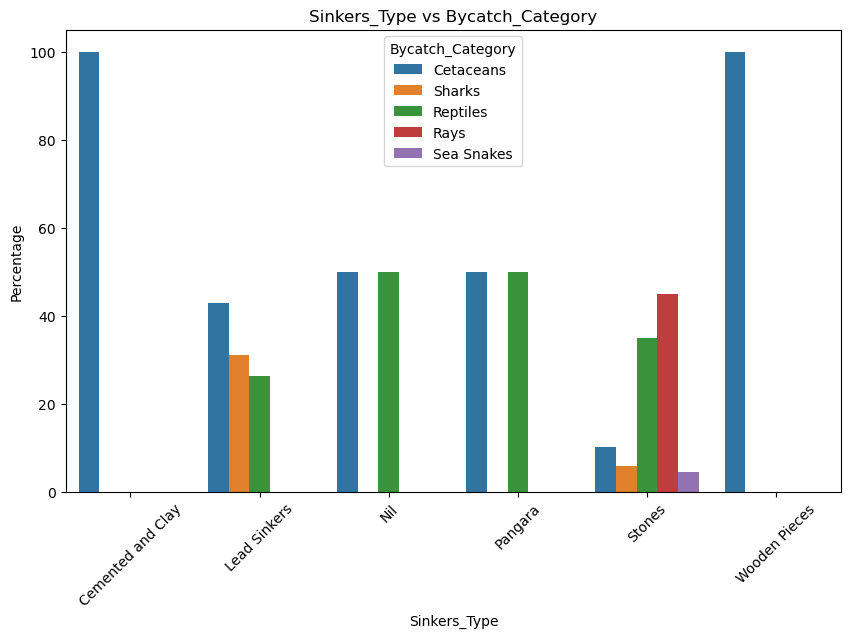

Independent Variable: Duration_Fishing_Trip_Days

   Duration_Fishing_Trip_Days Bycatch_Category  Percentage
0                    Half Day         Reptiles   41.025641
1                    Half Day             Rays   25.641026
2                    Half Day       Sea Snakes   17.948718
3                    Half Day        Cetaceans   12.820513
4                    Half Day           Sharks    2.564103
5                     One Day             Rays   47.058824
6                     One Day         Reptiles   44.117647
7                     One Day        Cetaceans    5.882353
8                     One Day           Sharks    2.941176
9                   One Month         Reptiles   37.209302
10                  One Month        Cetaceans   30.232558
11                  One Month             Rays   25.581395
12                  One Month           Sharks    6.976744
13                   One Week             Rays   37.662338
14                   One Week         Reptiles   32.467532
15    

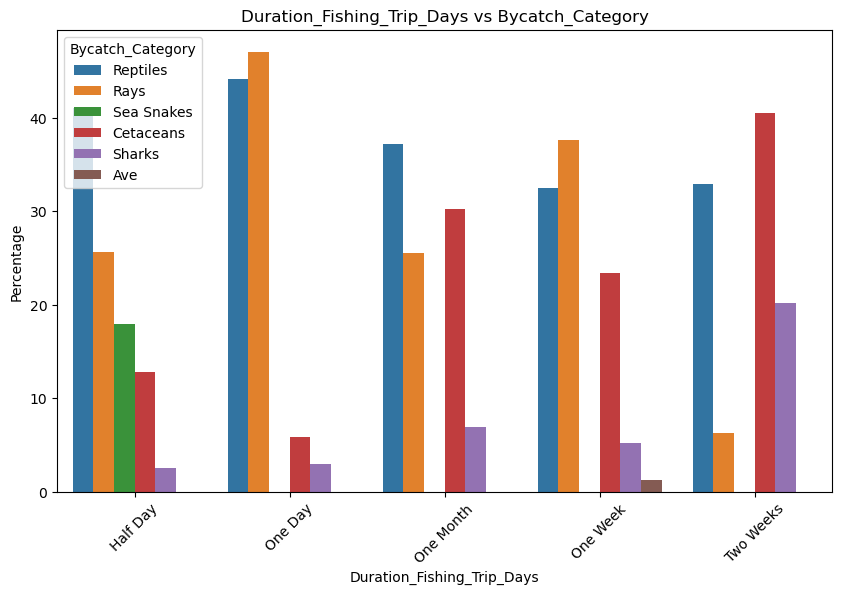

Independent Variable: Duration_Fishing_Trip_Days_1

   Duration_Fishing_Trip_Days_1 Bycatch_Category  Percentage
0                      Half Day         Reptiles   41.025641
1                      Half Day             Rays   25.641026
2                      Half Day       Sea Snakes   17.948718
3                      Half Day        Cetaceans   12.820513
4                      Half Day           Sharks    2.564103
5                       One Day             Rays   47.058824
6                       One Day         Reptiles   44.117647
7                       One Day        Cetaceans    5.882353
8                       One Day           Sharks    2.941176
9                     One Month         Reptiles   37.209302
10                    One Month        Cetaceans   30.232558
11                    One Month             Rays   25.581395
12                    One Month           Sharks    6.976744
13                     One Week             Rays   37.662338
14                     One Week  

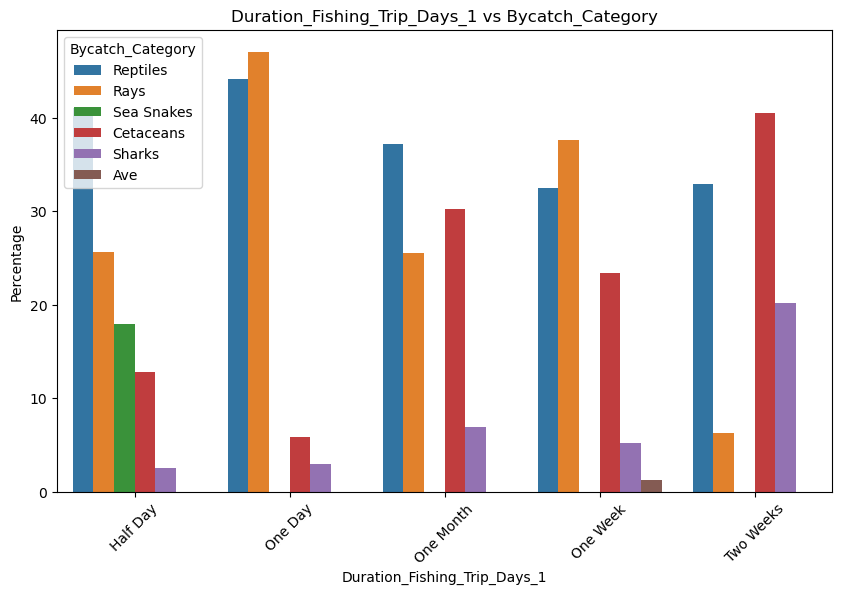

Independent Variable: Tech_Used

              Tech_Used Bycatch_Category  Percentage
0                Lights             Rays   49.541284
1                Lights         Reptiles   33.944954
2                Lights        Cetaceans    8.256881
3                Lights           Sharks    6.422018
4                Lights       Sea Snakes    1.834862
5          Mobile phone           Sharks   66.666667
6          Mobile phone         Reptiles   33.333333
7                  None         Reptiles   39.097744
8                  None        Cetaceans   36.842105
9                  None             Rays   13.533835
10                 None           Sharks    7.518797
11                 None       Sea Snakes    2.255639
12                 None              Ave    0.751880
13          Radio Buoys        Cetaceans   50.000000
14          Radio Buoys           Sharks   33.333333
15          Radio Buoys         Reptiles   16.666667
16  Radio Buoys/ Lights        Cetaceans   50.000000
17  Radio Buo

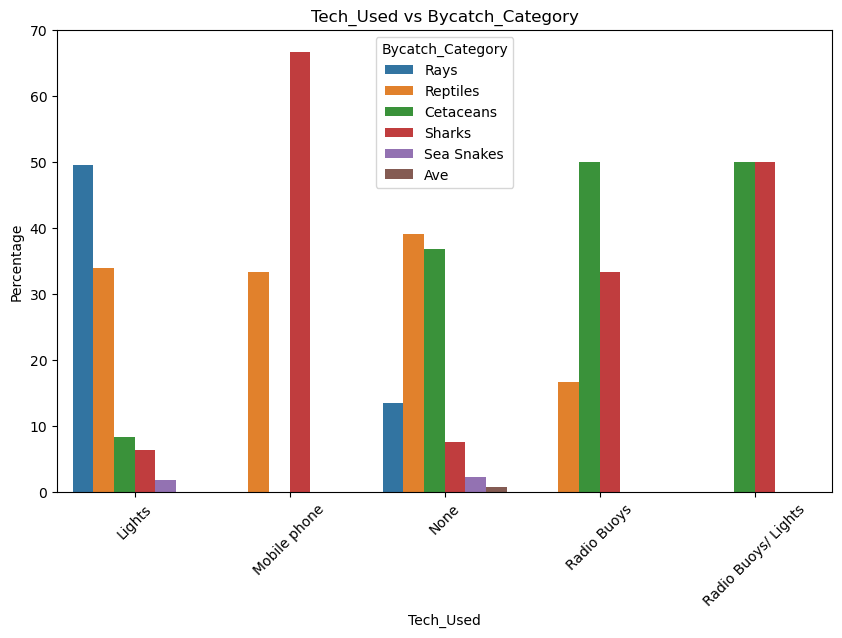

Independent Variable: Navi_commu

             Navi_commu Bycatch_Category  Percentage
0           Fish Finder             Rays   50.000000
1           Fish Finder         Reptiles   33.333333
2           Fish Finder           Sharks   16.666667
3   GPS Navigation Unit        Cetaceans   38.333333
4   GPS Navigation Unit           Sharks   28.333333
5   GPS Navigation Unit         Reptiles   26.666667
6   GPS Navigation Unit       Sea Snakes    6.666667
7   Mobile Applications             Rays   57.522124
8   Mobile Applications         Reptiles   37.168142
9   Mobile Applications       Sea Snakes    2.654867
10  Mobile Applications        Cetaceans    1.769912
11  Mobile Applications           Sharks    0.884956
12                 None        Cetaceans   49.367089
13                 None         Reptiles   43.037975
14                 None           Sharks    5.063291
15                 None              Ave    1.265823
16                 None             Rays    1.265823



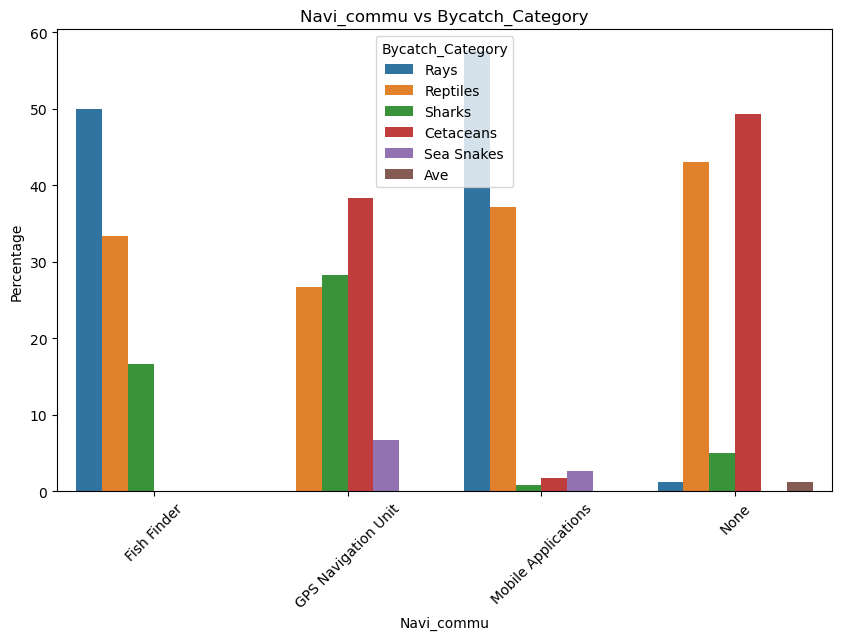

Independent Variable: Engine_Type

  Engine_Type Bycatch_Category  Percentage
0    On-Board         Reptiles   36.693548
1    On-Board        Cetaceans   27.419355
2    On-Board             Rays   22.580645
3    On-Board           Sharks   10.080645
4    On-Board       Sea Snakes    2.822581
5    On-Board              Ave    0.403226
6   Out board             Rays   66.666667
7   Out board         Reptiles   33.333333



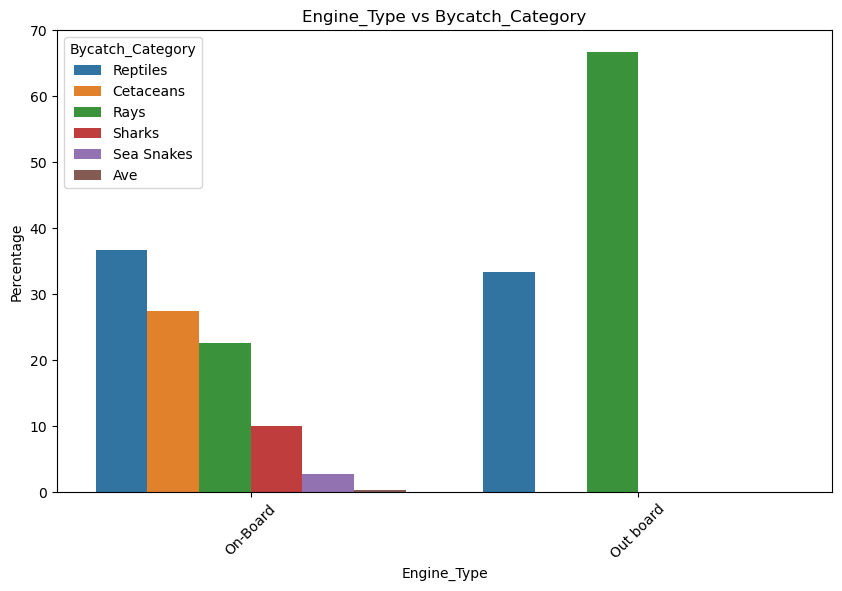

In [9]:

# Define a function to calculate percentages
def calculate_percentages(data, group_by_column, dependent_column):
    percentages = (data.groupby(group_by_column)[dependent_column].value_counts(normalize=True) * 100).reset_index(name='Percentage')
    return percentages

# Dependent Variables
dependent_variables = ['Turtle_No_DT', 'Dolphin_No_DT', 'Bycatch_Category']

# Independent Variables
independent_variables = ['Fisheries_Type', 'Fisheries_Type_Num', 'Boat_Sizeft', 'Fishing_Time',
                         'Category_Gear', 'Category_Gear_Num','Gear_Type', 'Threadline',
                         'Months_Gear_Used','Gear_Setting', 'Gear_Setting_Num', 'Net_Colour_1',
                         'Net_Colour_2','Gear_Length_(km)', 'Width (meters)', 'Mesh_Size (Millimeters/ Ungal)',
                         'Float_Type', 'Float_Used', 'Sinkers_Type', 'Sinkers_Used','Sinkers_Weight_kg',
                         'Duration_Fishing_Trip_Days','Duration_Fishing_Trip_Days_1', 'Total_Crew', 'Tech_Used',
                         'Navi_commu','Engine_Type', 'Horse Power', 'Total_Gear_Used']

# Perform analysis for each dependent variable
for dependent_variable in dependent_variables:
    print(f"Dependent Variable: {dependent_variable}")
    print("--------------------------------------------------------")

    # Print descriptive statistics of independent variables
    print("Descriptive Statistics of Independent Variables:")
    print(survey_data[independent_variables].describe())
    print()

    # Plot bar plots for significant dependent variables against categorical independent variables
    for independent_variable in independent_variables:
        if survey_data[independent_variable].dtype == 'O':
            print(f"Independent Variable: {independent_variable}")
            print()

            percentages_data = calculate_percentages(survey_data, independent_variable, dependent_variable)
            print(percentages_data)
            print()

            plt.figure(figsize=(10, 6))
            sns.barplot(data=percentages_data, x=independent_variable, y='Percentage', hue=dependent_variable)
            plt.title(f"{independent_variable} vs {dependent_variable}")
            plt.xlabel(independent_variable)
            plt.ylabel("Percentage")
            plt.xticks(rotation=45)
            plt.legend(title=dependent_variable)

            plt.show()

    # Display a line to separate the output for different dependent variables
    print("\n" + "=" * 50 + "\n")


# Fish Species and Bycatch Species 

Dependent Variable: Turtle_No_DT
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
         Status_1  Total_No_Year  Total months
count  364.000000     357.000000    347.000000
mean     0.846154      12.212885      2.219020
std      0.361298      37.576657      3.082373
min      0.000000       1.000000      1.000000
25%      1.000000       2.000000      1.000000
50%      1.000000       3.000000      1.000000
75%      1.000000       5.000000      2.000000
max      1.000000     500.000000     12.000000

Independent Variable: Gear_Target_Fish_Category

   Gear_Target_Fish_Category Turtle_No_DT  Percentage
0                      Chind           <5  100.000000
1                       Crab          <15  100.000000
2                    Croaker          <30   57.142857
3                    Croaker           <5   42.857143
4                       Fish          <15  100.000000
5                   Flatfish          <15  100.000000
6         

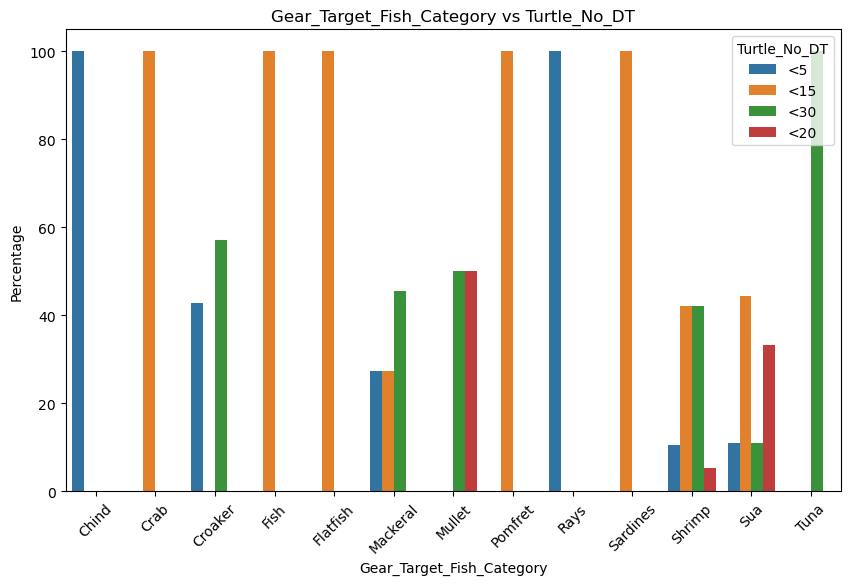

Independent Variable: Fish_Category

      Fish_Category Turtle_No_DT  Percentage
0           Catfish           <5   66.666667
1           Catfish          <20   33.333333
2              Crab          <15   33.333333
3              Crab          <20   33.333333
4              Crab           <5   33.333333
5           Croaker          <15   54.545455
6           Croaker          <30   27.272727
7           Croaker          <20    9.090909
8           Croaker           <5    9.090909
9           Grouper           <5  100.000000
10  Indian Mackeral          <15   50.000000
11  Indian Mackeral           <5   50.000000
12      Indian scad          <30  100.000000
13    King Mackeral          <30   50.000000
14    King Mackeral           <5   50.000000
15           Mullet          <20  100.000000
16          Pomfret          <15   40.000000
17          Pomfret          <30   40.000000
18          Pomfret           <5   20.000000
19          Sardine          <15   66.666667
20          Sardin

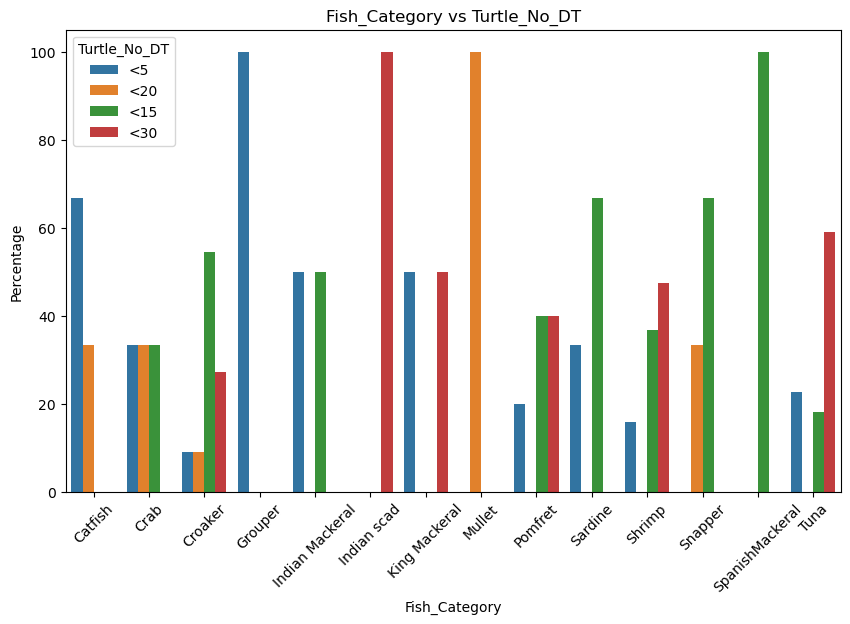

Independent Variable: Bycatch_Sub_Category

   Bycatch_Sub_Category Turtle_No_DT  Percentage
0             Crocodile           <5  100.000000
1               Dolphin          <15   61.111111
2               Dolphin          <30   27.777778
3               Dolphin          <20    5.555556
4               Dolphin           <5    5.555556
5           Guitar fish           <5   60.000000
6           Guitar fish          <15   20.000000
7           Guitar fish          <30   20.000000
8            Sea Snakes          <30   75.000000
9            Sea Snakes          <15   25.000000
10                Shark          <15  100.000000
11                Skate          <15  100.000000
12            Sting ray          <15  100.000000
13              Turtles          <15   50.000000
14              Turtles          <30   35.714286
15              Turtles           <5   14.285714
16          Whale shark          <30   66.666667
17          Whale shark          <20   33.333333



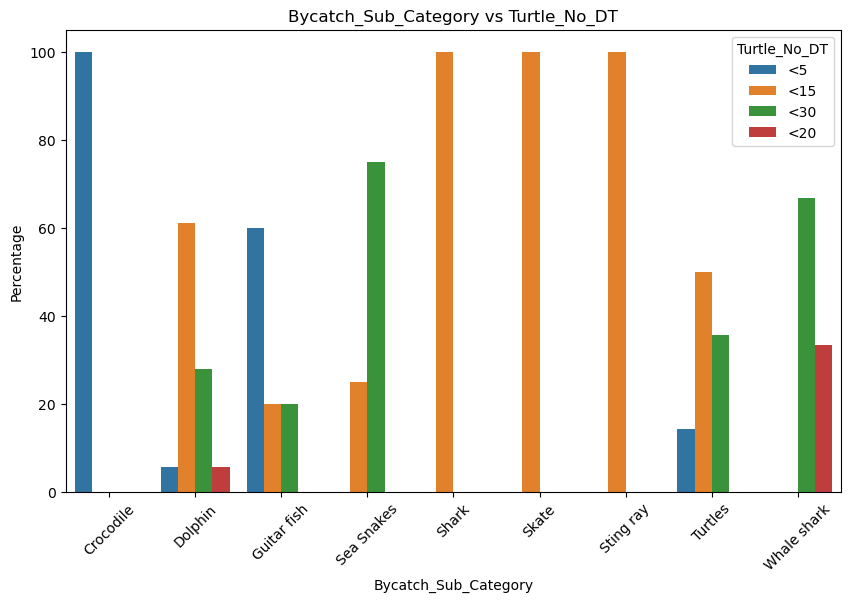

Independent Variable: Status

        Status Turtle_No_DT  Percentage
0  Encountered          <15   36.363636
1  Encountered          <30   36.363636
2  Encountered           <5   27.272727
3      Sighted          <30   40.845070
4      Sighted          <15   33.802817
5      Sighted           <5   19.718310
6      Sighted          <20    5.633803



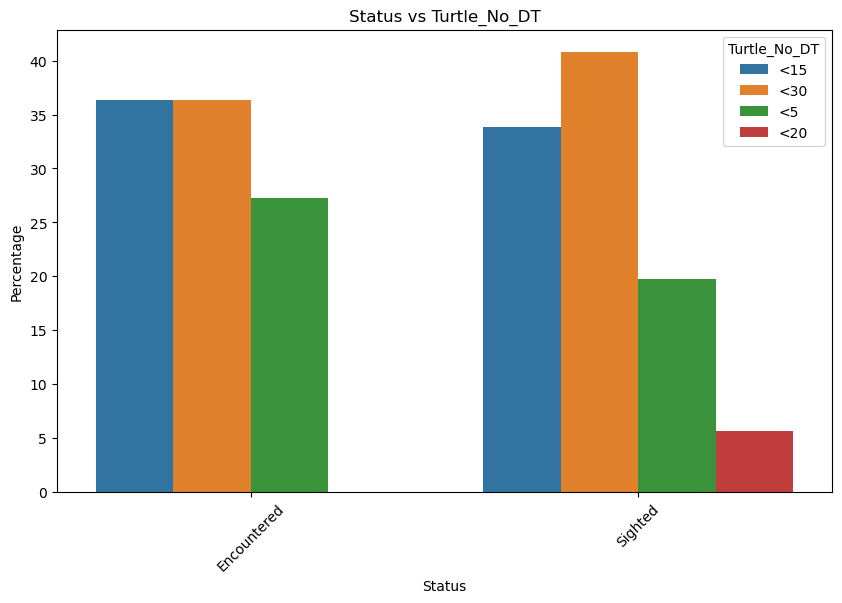

Independent Variable: Bycatch_Fishing_Area

   Bycatch_Fishing_Area Turtle_No_DT  Percentage
0                Baddok          <30   53.846154
1                Baddok          <15   38.461538
2                Baddok           <5    7.692308
3                   Bal          <30   47.826087
4                   Bal           <5   34.782609
5                   Bal          <15   13.043478
6                   Bal          <20    4.347826
7          Daran/ Ghanz           <5  100.000000
8                 Darya          <15   42.105263
9                 Darya          <30   42.105263
10                Darya           <5   10.526316
11                Darya          <20    5.263158
12             Deep Sea          <30   50.000000
13             Deep Sea          <15   33.333333
14             Deep Sea           <5   16.666667
15              Gariyan           <5  100.000000
16             Isphagus          <15   33.333333
17             Isphagus          <20   33.333333
18             Isphagus  

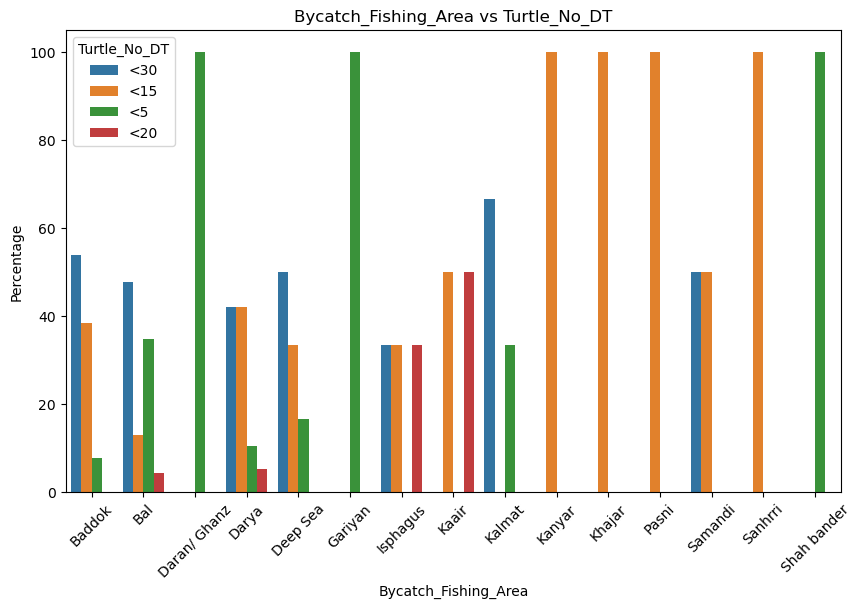

Independent Variable: Bycatch_Month

   Bycatch_Month Turtle_No_DT  Percentage
0            Apr          <15   50.000000
1            Apr          <30   33.333333
2            Apr           <5   16.666667
3      Apr - May          <20  100.000000
4            Aug          <20  100.000000
5      Aug - Dec          <15  100.000000
6      Aug - Sep          <30  100.000000
7            Feb          <15   50.000000
8            Feb          <30   50.000000
9      Feb - Dec           <5  100.000000
10     Feb - May          <15  100.000000
11          Jan           <15  100.000000
12           Jun           <5  100.000000
13           Mar          <20   40.000000
14           Mar          <30   40.000000
15           Mar          <15   20.000000
16     Mar - May          <15  100.000000
17           May          <30   54.285714
18           May           <5   25.714286
19           May          <15   20.000000
20           Oct          <15  100.000000
21           Sep          <30  100.0000

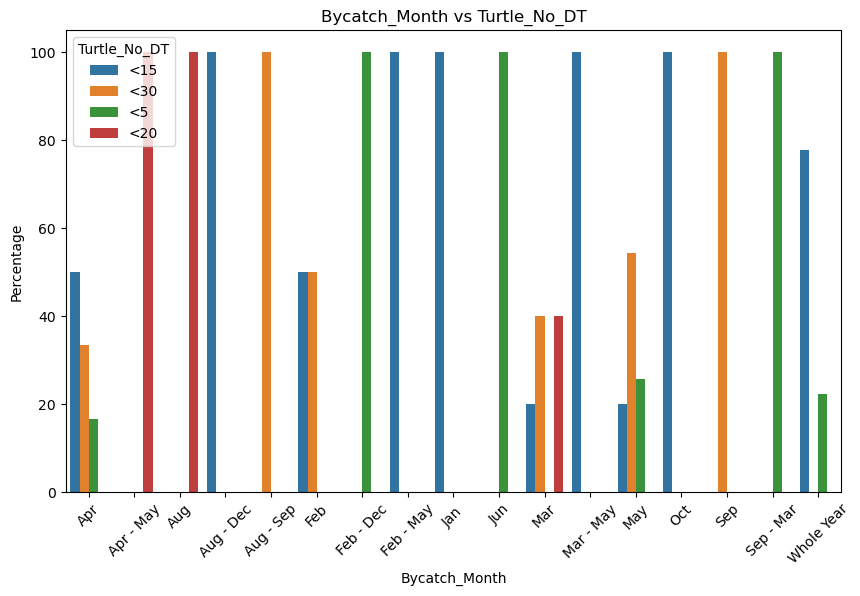

Independent Variable: Damage net (Y/N)

  Damage net (Y/N) Turtle_No_DT  Percentage
0                Y          <15   66.666667
1                Y          <30   22.222222
2                Y           <5   11.111111



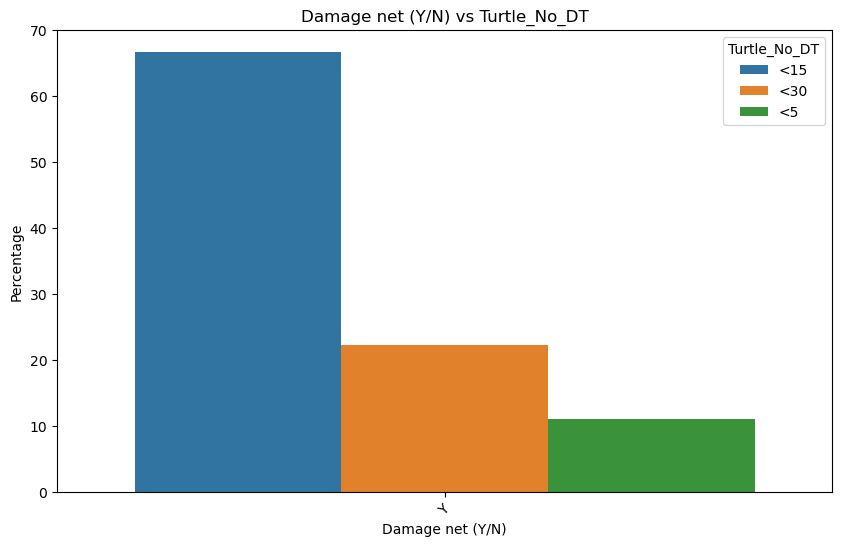

Independent Variable: Released

  Released Turtle_No_DT  Percentage
0    Alive          <30   49.253731
1    Alive          <15   31.343284
2    Alive           <5   16.417910
3    Alive          <20    2.985075
4     Dead          <15   60.000000
5     Dead           <5   40.000000



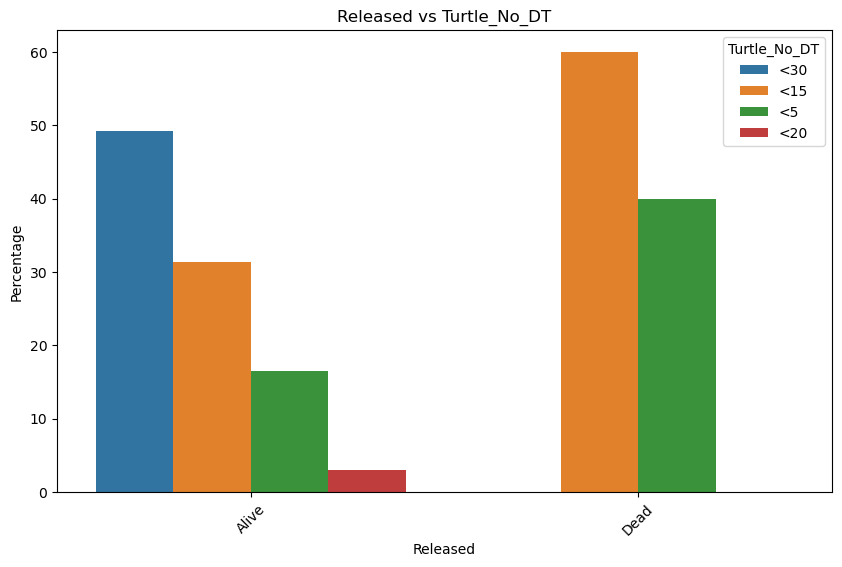

Independent Variable: Discarded

  Discarded Turtle_No_DT  Percentage
0        No           <5   66.666667
1        No          <15   33.333333
2       Yes          <30   48.979592
3       Yes          <15   28.571429
4       Yes           <5   16.326531
5       Yes          <20    6.122449



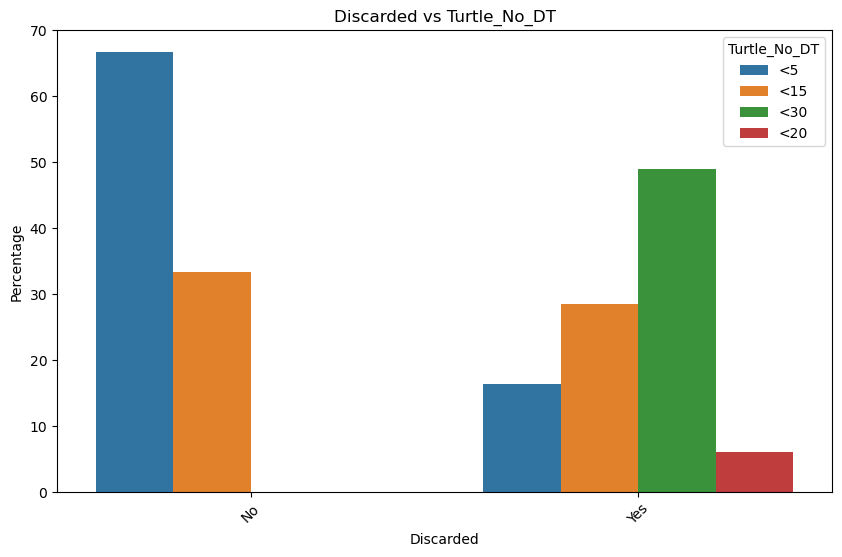

Independent Variable: Retained

  Retained Turtle_No_DT  Percentage
0       No          <15        50.0
1       No          <30        50.0
2      Yes          <15       100.0



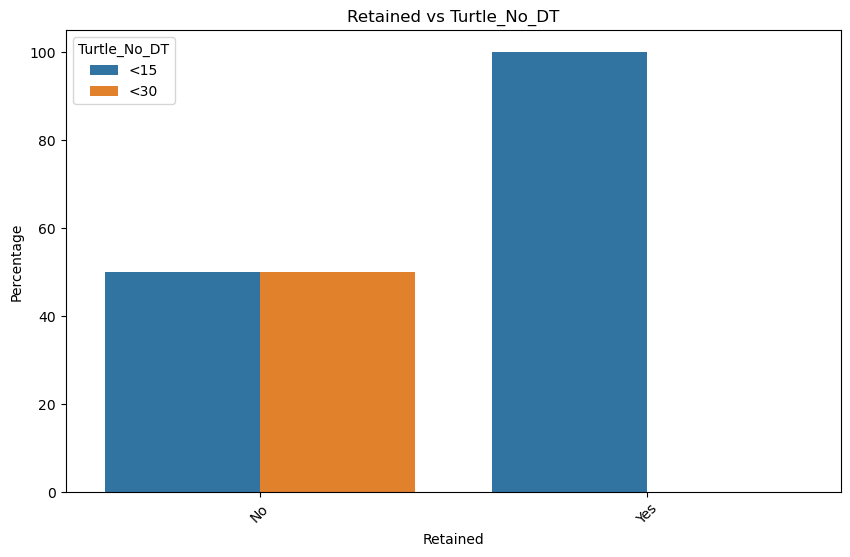

Independent Variable: Encountered

    Encountered Turtle_No_DT  Percentage
0  Accidentally          <30   43.421053
1  Accidentally          <15   34.210526
2  Accidentally           <5   18.421053
3  Accidentally          <20    3.947368



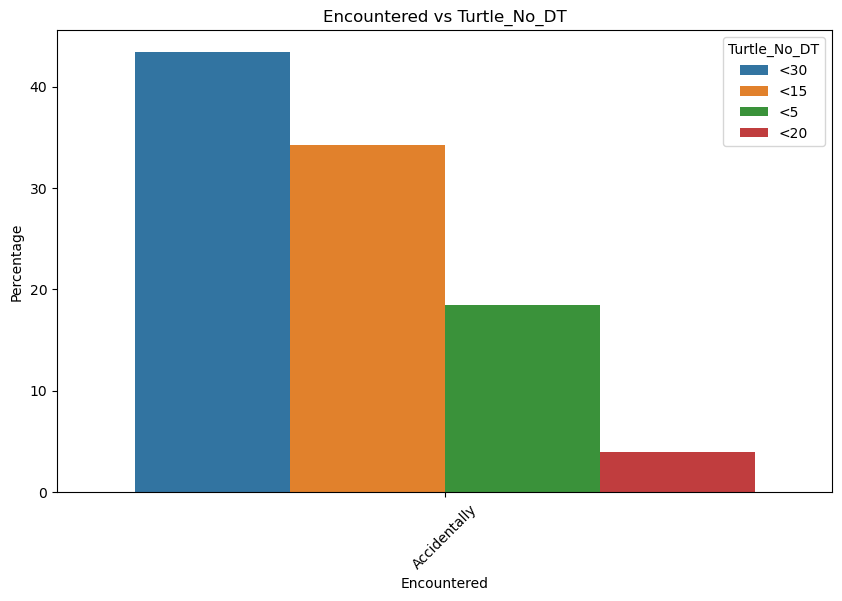



Dependent Variable: Dolphin_No_DT
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
         Status_1  Total_No_Year  Total months
count  364.000000     357.000000    347.000000
mean     0.846154      12.212885      2.219020
std      0.361298      37.576657      3.082373
min      0.000000       1.000000      1.000000
25%      1.000000       2.000000      1.000000
50%      1.000000       3.000000      1.000000
75%      1.000000       5.000000      2.000000
max      1.000000     500.000000     12.000000

Independent Variable: Gear_Target_Fish_Category

   Gear_Target_Fish_Category Dolphin_No_DT  Percentage
0                    Croaker           <15   41.666667
1                    Croaker           <30   41.666667
2                    Croaker            <5   16.666667
3                   Mackeral           <30   75.000000
4                   Mackeral           <15   12.500000
5                   Mackeral            <5   12.500000


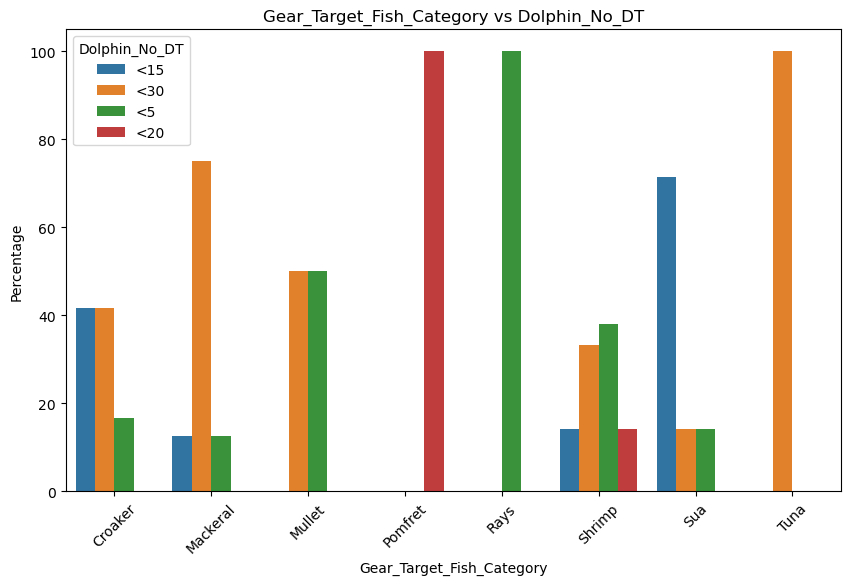

Independent Variable: Fish_Category

      Fish_Category Dolphin_No_DT  Percentage
0           Catfish           <15   50.000000
1           Catfish           <30   50.000000
2              Crab           <20   33.333333
3              Crab           <30   33.333333
4              Crab            <5   33.333333
5           Croaker           <15   37.500000
6           Croaker           <20   25.000000
7           Croaker           <30   25.000000
8           Croaker            <5   12.500000
9   Indian Mackeral           <15   50.000000
10  Indian Mackeral            <5   50.000000
11    King Mackeral           <15   50.000000
12    King Mackeral           <30   50.000000
13           Mullet            <5  100.000000
14          Pomfret           <30   40.000000
15          Pomfret           <15   20.000000
16          Pomfret           <20   20.000000
17          Pomfret            <5   20.000000
18        Queenfish           <15  100.000000
19          Sardine            <5  100.0000

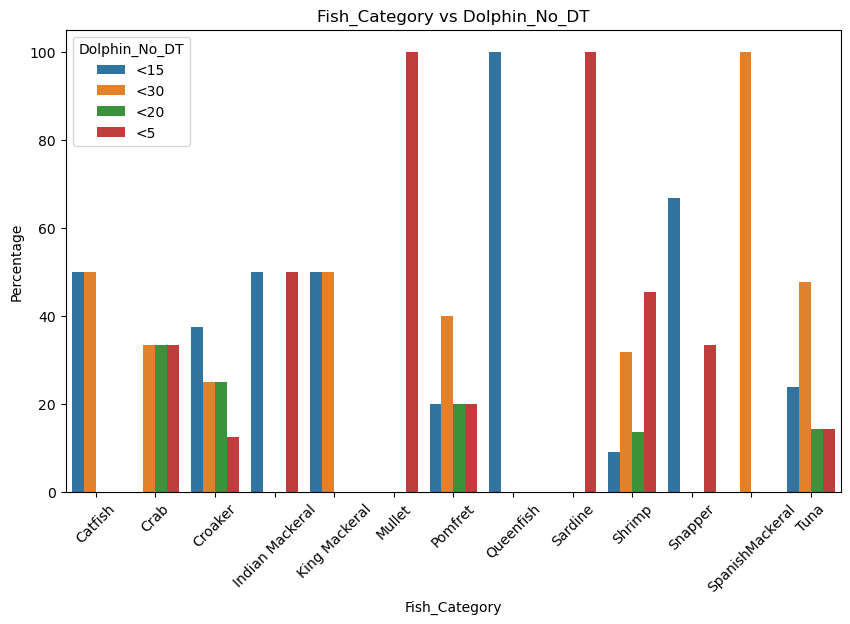

Independent Variable: Bycatch_Sub_Category

   Bycatch_Sub_Category Dolphin_No_DT  Percentage
0             Crocodile           <15   50.000000
1             Crocodile           <30   50.000000
2               Dolphin            <5   43.750000
3               Dolphin           <15   25.000000
4               Dolphin           <30   25.000000
5               Dolphin           <20    6.250000
6           Guitar fish            <5   60.000000
7           Guitar fish           <15   40.000000
8            Sea Snakes           <20   50.000000
9            Sea Snakes           <15   25.000000
10           Sea Snakes            <5   25.000000
11                Skate            <5  100.000000
12              Turtles            <5   35.714286
13              Turtles           <20   28.571429
14              Turtles           <30   28.571429
15              Turtles           <15    7.142857
16          Whale shark           <15  100.000000



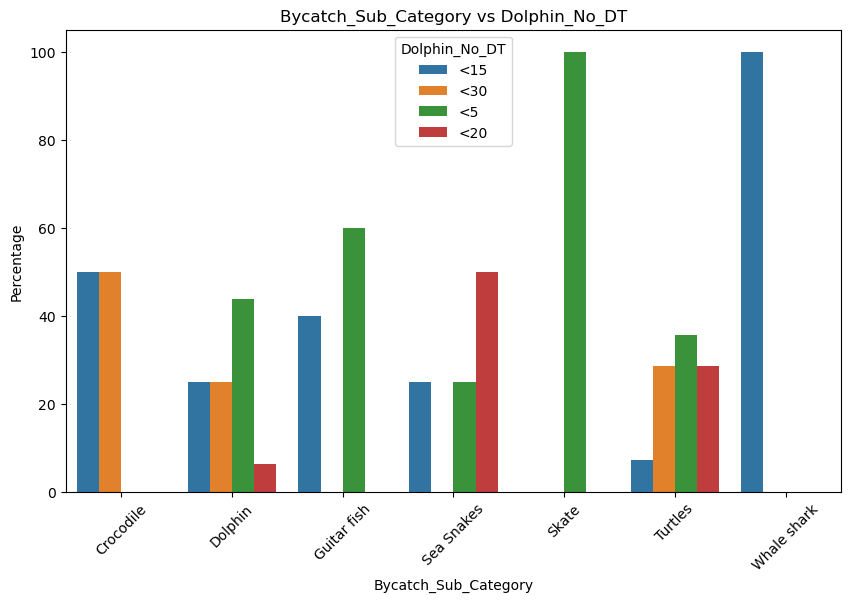

Independent Variable: Status

        Status Dolphin_No_DT  Percentage
0  Encountered           <30   70.000000
1  Encountered            <5   30.000000
2      Sighted           <15   27.868852
3      Sighted           <30   27.868852
4      Sighted            <5   27.868852
5      Sighted           <20   16.393443



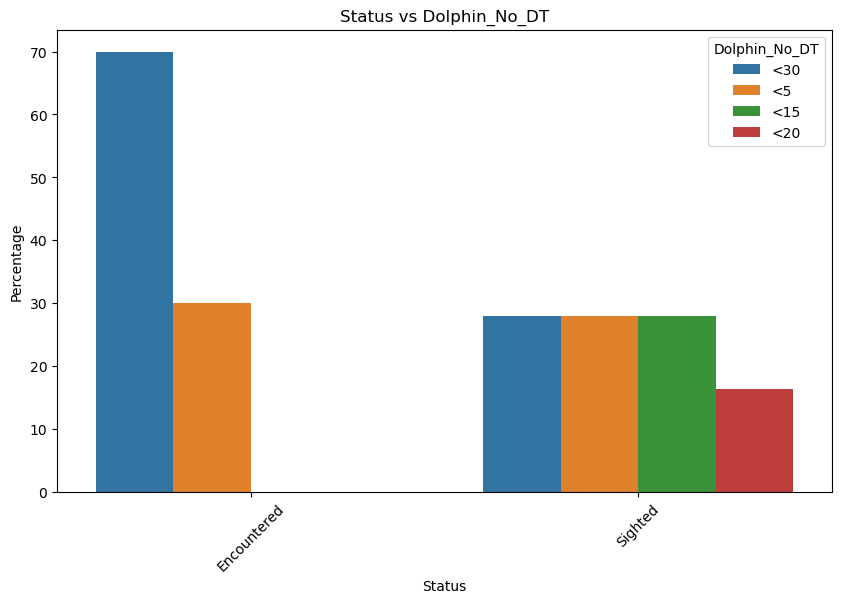

Independent Variable: Bycatch_Fishing_Area

   Bycatch_Fishing_Area Dolphin_No_DT  Percentage
0                Baddok           <30   33.333333
1                Baddok           <15   25.000000
2                Baddok            <5   25.000000
3                Baddok           <20   16.666667
4                   Bal           <30   40.000000
5                   Bal           <15   25.000000
6                   Bal            <5   20.000000
7                   Bal           <20   15.000000
8                 Darya            <5   36.842105
9                 Darya           <15   26.315789
10                Darya           <30   21.052632
11                Darya           <20   15.789474
12             Deep Sea           <30   66.666667
13             Deep Sea            <5   33.333333
14             Isphagus           <30   66.666667
15             Isphagus            <5   33.333333
16                Kaair            <5  100.000000
17               Kalmat           <15   66.666667
18    

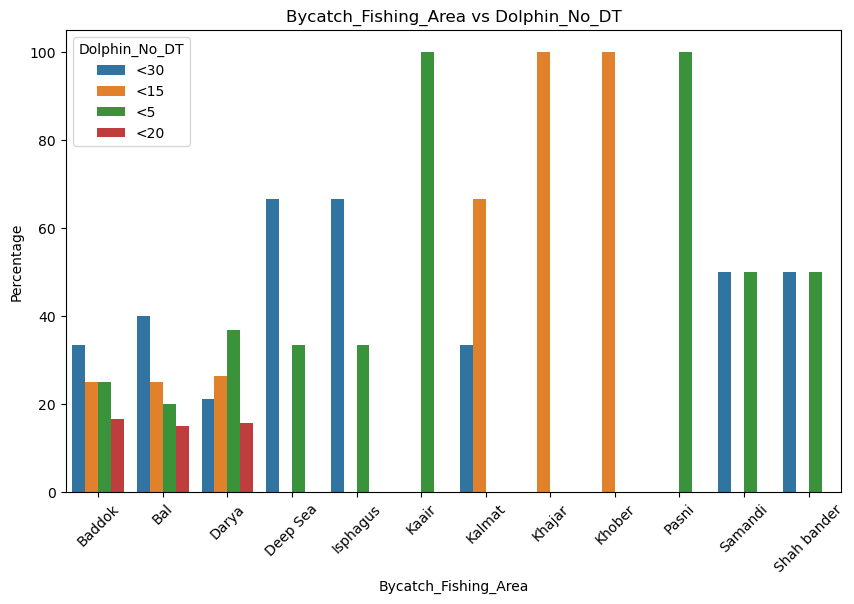

Independent Variable: Bycatch_Month

   Bycatch_Month Dolphin_No_DT  Percentage
0            Apr            <5   60.000000
1            Apr           <30   40.000000
2      Apr - May           <15   50.000000
3      Apr - May            <5   50.000000
4            Aug           <30  100.000000
5      Aug - Sep            <5  100.000000
6            Feb           <30  100.000000
7      Feb - Dec           <30  100.000000
8      Feb - May           <30  100.000000
9            Jun           <15  100.000000
10           Mar           <15   40.000000
11           Mar           <20   40.000000
12           Mar           <30   20.000000
13     Mar - May           <15  100.000000
14           May           <30   37.500000
15           May           <15   28.125000
16           May            <5   21.875000
17           May           <20   12.500000
18           Sep           <20  100.000000
19    Whole Year            <5   50.000000
20    Whole Year           <15   33.333333
21    Whole Year 

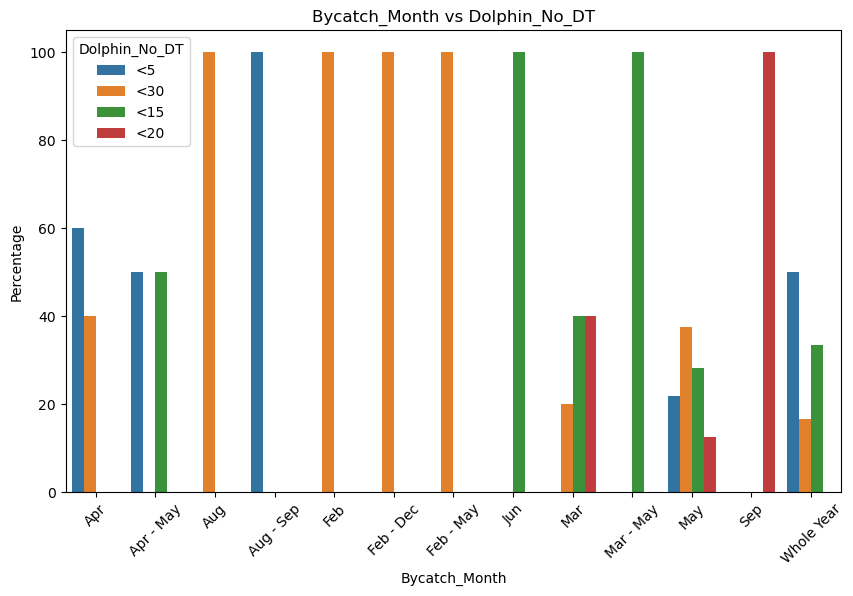

Independent Variable: Damage net (Y/N)

  Damage net (Y/N) Dolphin_No_DT  Percentage
0                Y           <15        40.0
1                Y           <30        40.0
2                Y            <5        20.0



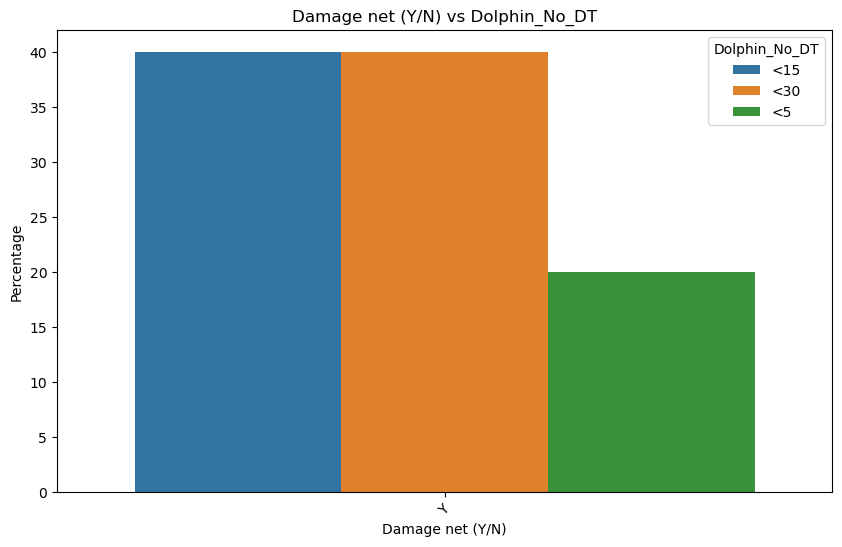

Independent Variable: Released

  Released Dolphin_No_DT  Percentage
0    Alive           <30   37.704918
1    Alive            <5   31.147541
2    Alive           <15   16.393443
3    Alive           <20   14.754098
4     Dead           <15   80.000000
5     Dead            <5   20.000000



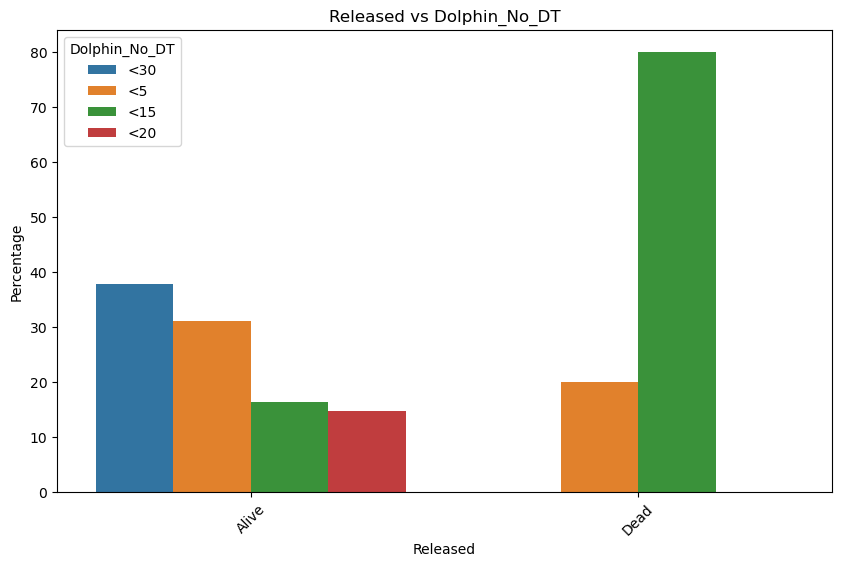

Independent Variable: Discarded

  Discarded Dolphin_No_DT  Percentage
0        No           <15  100.000000
1       Yes           <30   38.636364
2       Yes            <5   27.272727
3       Yes           <15   20.454545
4       Yes           <20   13.636364



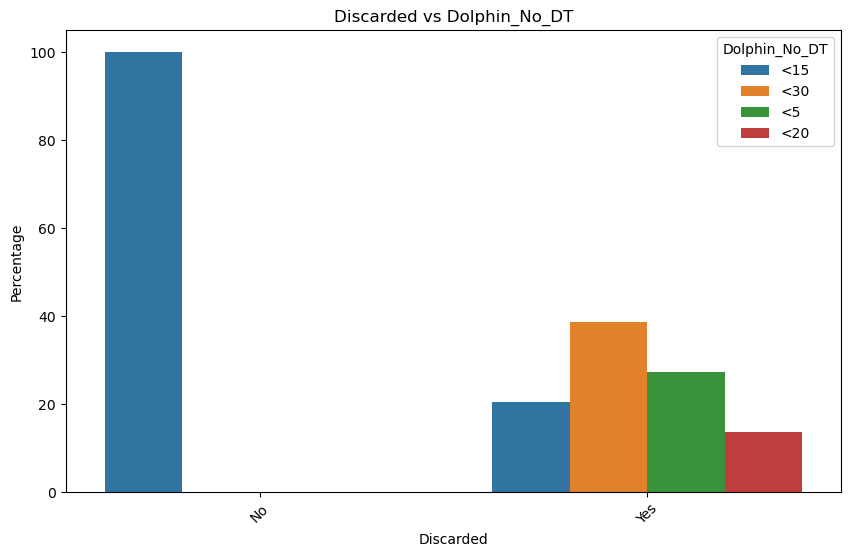

Independent Variable: Retained

  Retained Dolphin_No_DT  Percentage
0       No           <30       100.0
1      Yes           <15       100.0



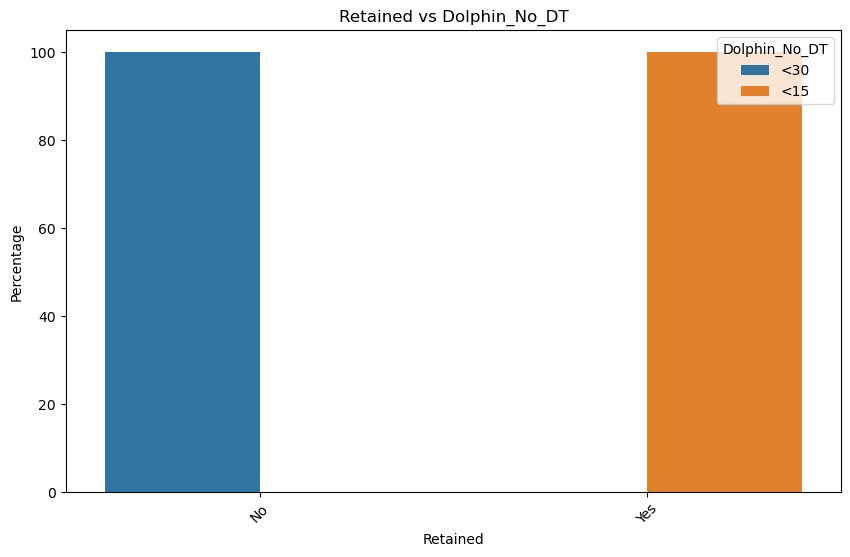

Independent Variable: Encountered

    Encountered Dolphin_No_DT  Percentage
0  Accidentally           <30   35.714286
1  Accidentally            <5   30.000000
2  Accidentally           <15   20.000000
3  Accidentally           <20   14.285714



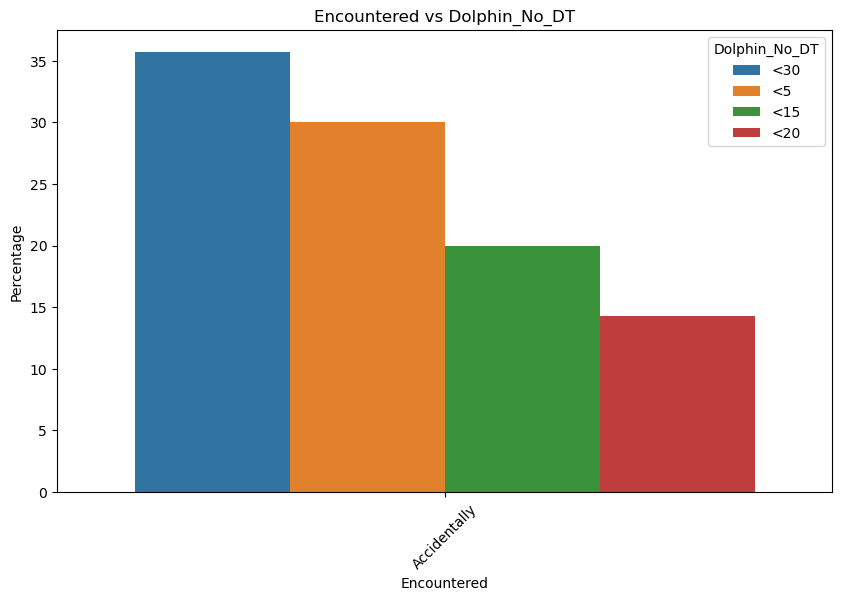



Dependent Variable: Bycatch_Category
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
         Status_1  Total_No_Year  Total months
count  364.000000     357.000000    347.000000
mean     0.846154      12.212885      2.219020
std      0.361298      37.576657      3.082373
min      0.000000       1.000000      1.000000
25%      1.000000       2.000000      1.000000
50%      1.000000       3.000000      1.000000
75%      1.000000       5.000000      2.000000
max      1.000000     500.000000     12.000000

Independent Variable: Gear_Target_Fish_Category

   Gear_Target_Fish_Category Bycatch_Category  Percentage
0                      Chind         Reptiles   44.444444
1                      Chind       Sea Snakes   22.222222
2                      Chind        Cetaceans   11.111111
3                      Chind             Rays   11.111111
4                      Chind           Sharks   11.111111
5                       Crab      

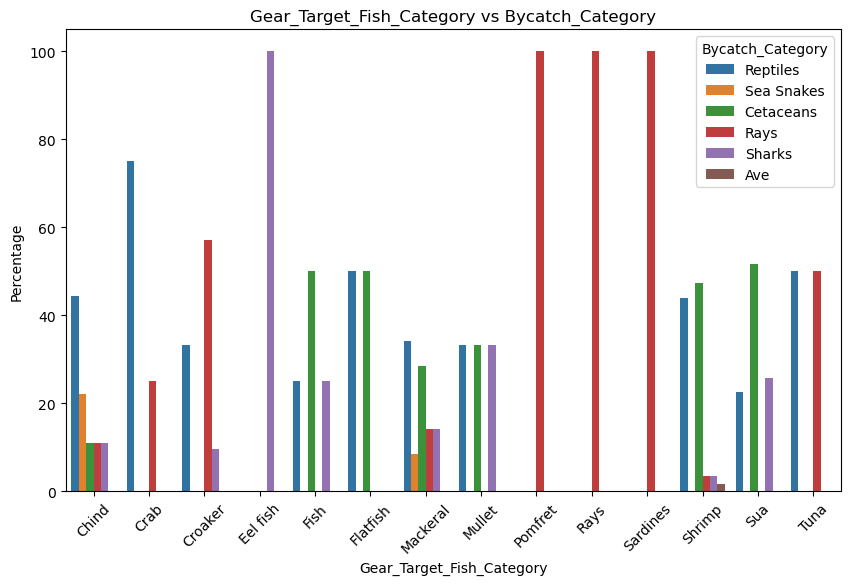

Independent Variable: Fish_Category

      Fish_Category Bycatch_Category  Percentage
0         Baracuda         Cetaceans   50.000000
1         Baracuda          Reptiles   50.000000
2           Catfish         Reptiles   40.000000
3           Catfish        Cetaceans   33.333333
4           Catfish           Sharks   20.000000
5           Catfish             Rays    6.666667
6              Crab             Rays  100.000000
7           Croaker         Reptiles   37.500000
8           Croaker        Cetaceans   34.375000
9           Croaker             Rays   18.750000
10          Croaker           Sharks    6.250000
11          Croaker       Sea Snakes    3.125000
12         Eel fish              Ave  100.000000
13          Grouper       Sea Snakes   60.000000
14          Grouper         Reptiles   40.000000
15  Indian Mackeral             Rays   68.181818
16  Indian Mackeral         Reptiles   31.818182
17      Indian scad             Rays   77.777778
18      Indian scad         Rept

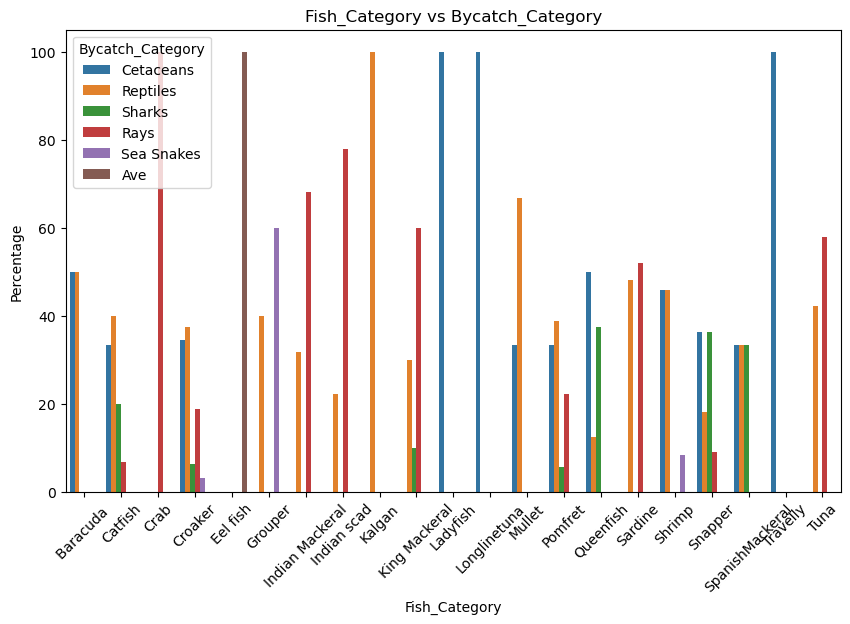

Independent Variable: Bycatch_Sub_Category

   Bycatch_Sub_Category Bycatch_Category  Percentage
0             Crocodile         Reptiles       100.0
1               Dolphin        Cetaceans       100.0
2           Guitar fish             Rays       100.0
3              Propoise        Cetaceans       100.0
4            Sea Snakes         Reptiles       100.0
5                 Shark           Sharks       100.0
6                 Skate             Rays       100.0
7             Sting ray             Rays       100.0
8               Turtles         Reptiles       100.0
9                 Whale        Cetaceans       100.0
10          Whale shark           Sharks       100.0



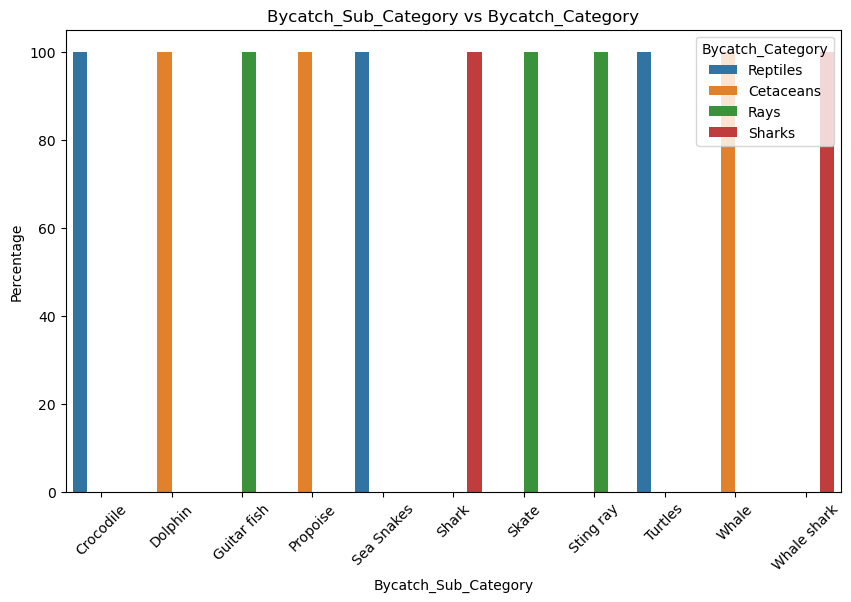

Independent Variable: Status

        Status Bycatch_Category  Percentage
0  Encountered         Reptiles   51.612903
1  Encountered        Cetaceans   22.580645
2  Encountered             Rays   19.354839
3  Encountered              Ave    3.225806
4  Encountered       Sea Snakes    3.225806
5      Sighted         Reptiles   36.979167
6      Sighted             Rays   31.250000
7      Sighted        Cetaceans   23.437500
8      Sighted           Sharks    8.333333



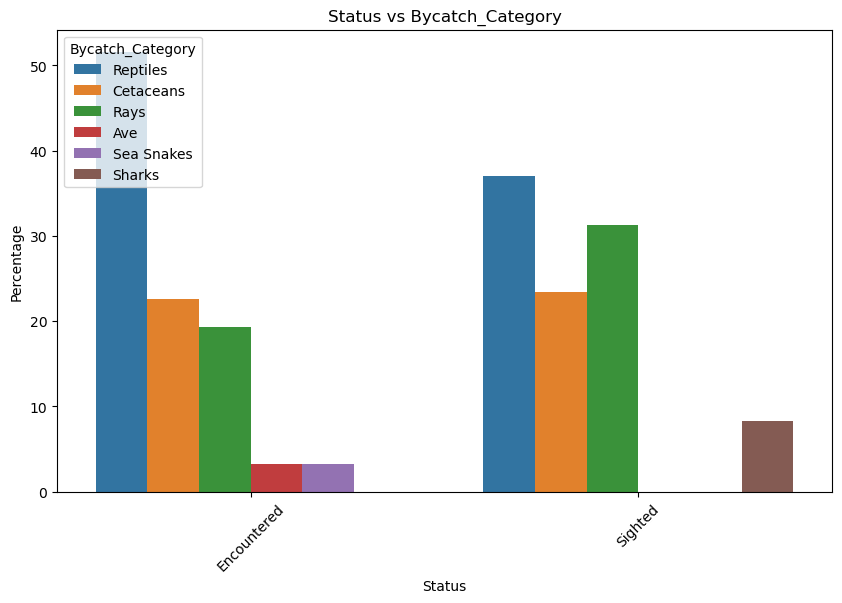

Independent Variable: Bycatch_Fishing_Area

   Bycatch_Fishing_Area Bycatch_Category  Percentage
0                Baddok             Rays   60.606061
1                Baddok         Reptiles   39.393939
2                   Bal             Rays   64.516129
3                   Bal         Reptiles   32.258065
4                   Bal           Sharks    3.225806
5                 Creek         Reptiles  100.000000
6                 Daran         Reptiles  100.000000
7          Daran/ Ghanz         Reptiles  100.000000
8                 Darya        Cetaceans   51.562500
9                 Darya         Reptiles   39.062500
10                Darya           Sharks    7.812500
11                Darya              Ave    1.562500
12          Dasht Creek        Cetaceans   50.000000
13          Dasht Creek       Sea Snakes   50.000000
14             Deep Sea           Sharks   53.846154
15             Deep Sea        Cetaceans   23.076923
16             Deep Sea         Reptiles   23.076923
17

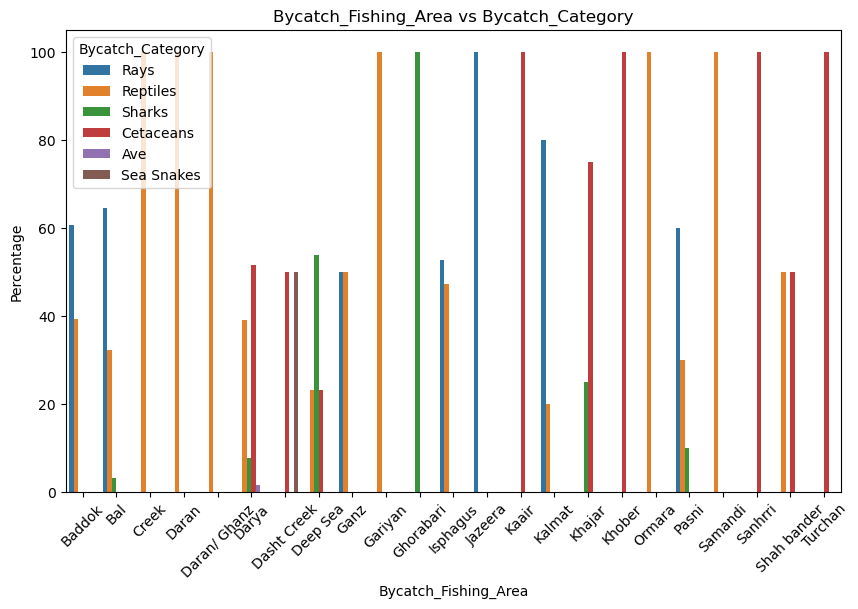

Independent Variable: Bycatch_Month

   Bycatch_Month Bycatch_Category  Percentage
0            Apr             Rays   46.666667
1            Apr         Reptiles   33.333333
2            Apr           Sharks   16.666667
3            Apr        Cetaceans    3.333333
4      Apr - Aug           Sharks  100.000000
5      Apr - May        Cetaceans   75.000000
6      Apr - May           Sharks   25.000000
7      Aug - Dec        Cetaceans  100.000000
8      Aug - Sep         Reptiles   75.000000
9      Aug - Sep           Sharks   25.000000
10     Dec - Feb         Reptiles  100.000000
11     Dec - Jan        Cetaceans  100.000000
12           Feb             Rays   57.142857
13           Feb         Reptiles   42.857143
14     Feb - Dec         Reptiles  100.000000
15     Feb - Mar         Reptiles  100.000000
16     Feb - May         Reptiles  100.000000
17           Jan              Ave  100.000000
18          Jan              Rays   50.000000
19          Jan          Reptiles   37.5000

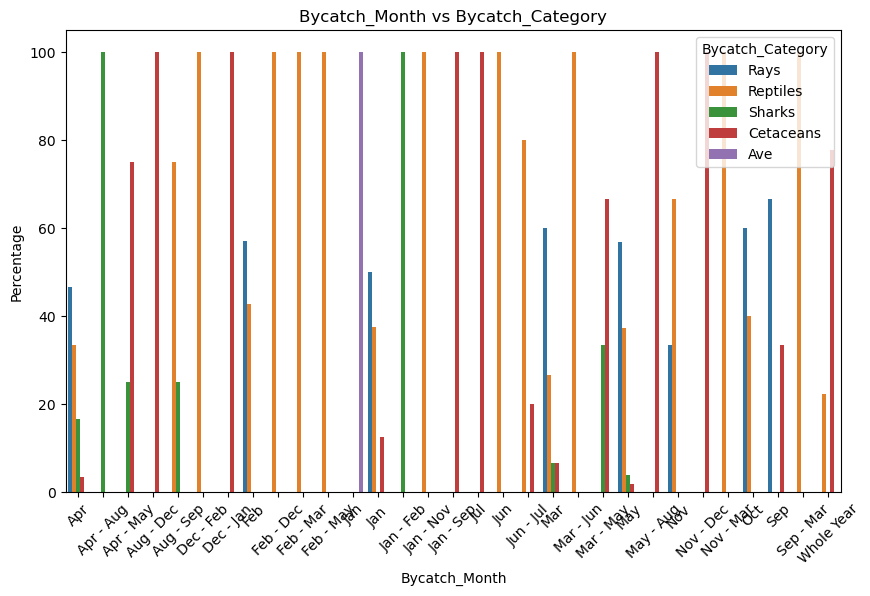

Independent Variable: Damage net (Y/N)

  Damage net (Y/N) Bycatch_Category  Percentage
0                N         Reptiles      50.000
1                N           Sharks      50.000
2                Y        Cetaceans      43.750
3                Y           Sharks      40.625
4                Y         Reptiles      15.625



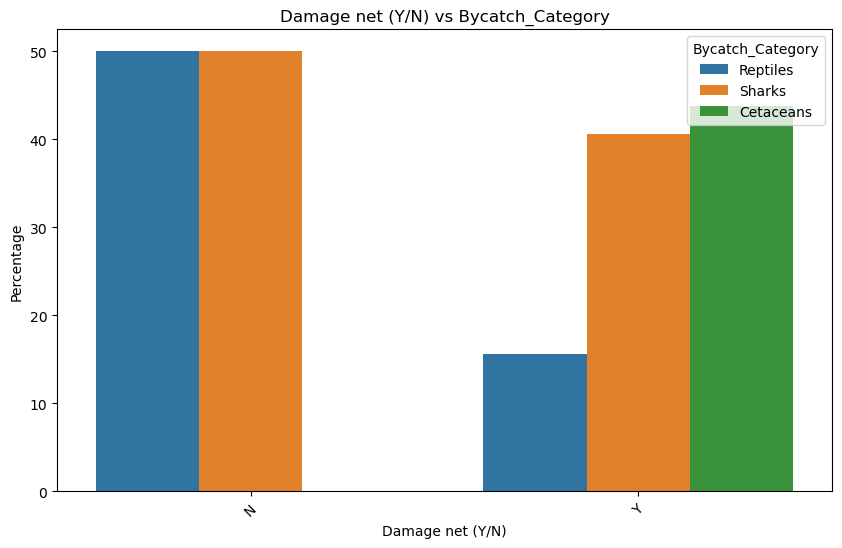

Independent Variable: Released

  Released Bycatch_Category  Percentage
0    Alive         Reptiles   42.391304
1    Alive             Rays   27.173913
2    Alive        Cetaceans   22.282609
3    Alive           Sharks    7.608696
4    Alive              Ave    0.543478
5     Dead             Rays   43.589744
6     Dead        Cetaceans   25.641026
7     Dead         Reptiles   25.641026
8     Dead           Sharks    5.128205



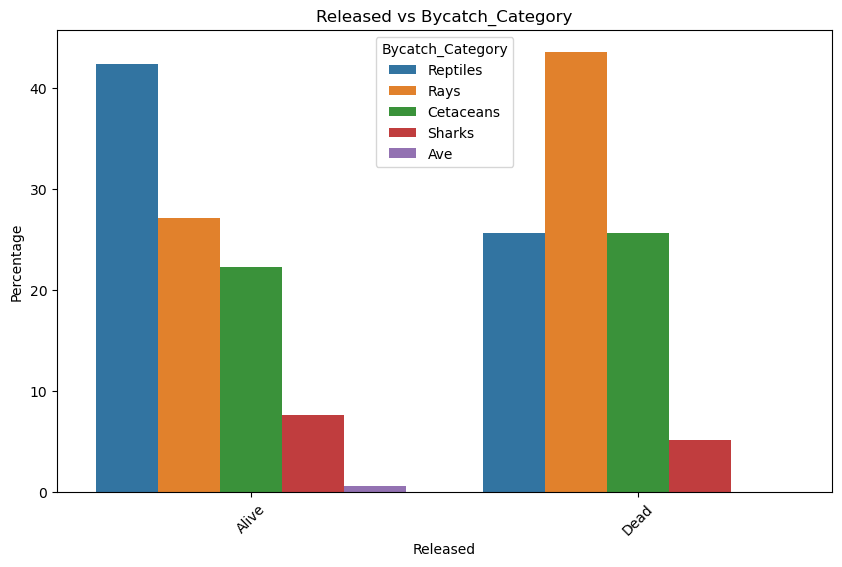

Independent Variable: Discarded

  Discarded Bycatch_Category  Percentage
0        No             Rays   54.166667
1        No         Reptiles   33.333333
2        No           Sharks   12.500000
3       Yes             Rays   47.747748
4       Yes         Reptiles   32.432432
5       Yes        Cetaceans   13.513514
6       Yes           Sharks    6.306306



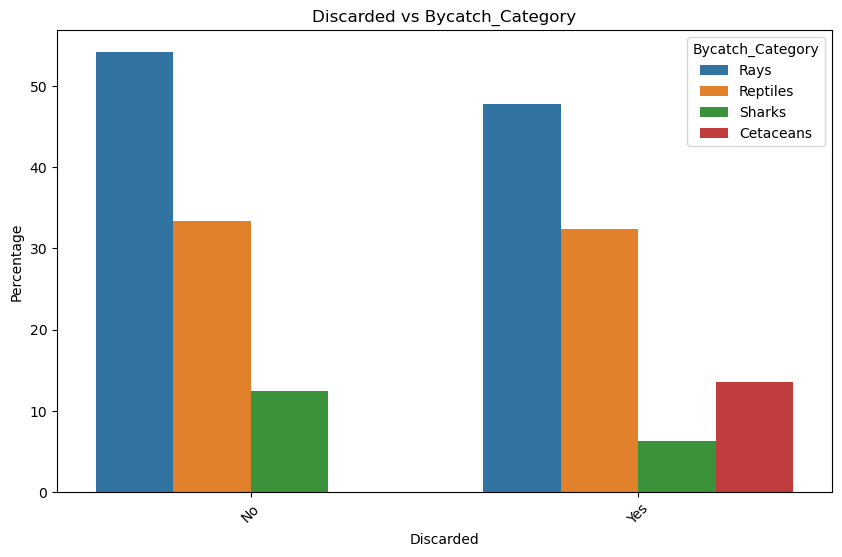

Independent Variable: Retained

  Retained Bycatch_Category  Percentage
0       No        Cetaceans   41.666667
1       No           Sharks   41.666667
2       No         Reptiles   16.666667
3      Yes         Reptiles   66.666667
4      Yes        Cetaceans   16.666667
5      Yes           Sharks   16.666667



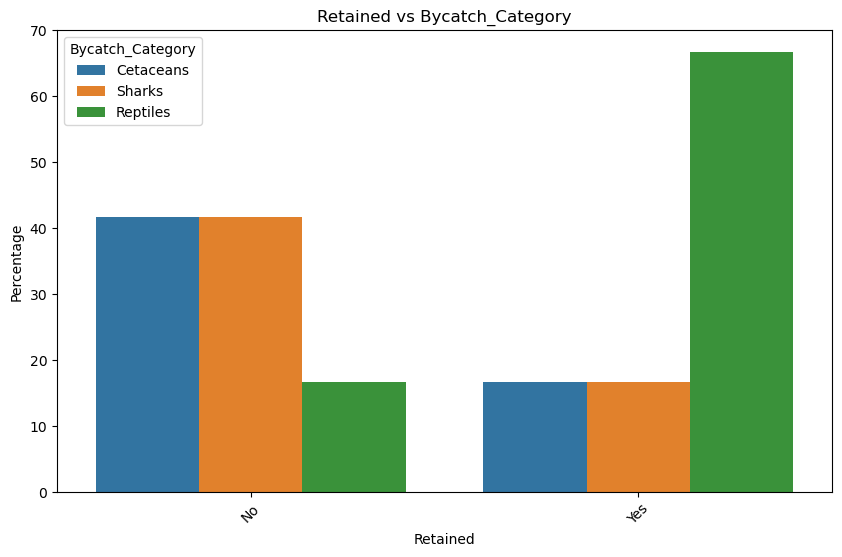

Independent Variable: Encountered

    Encountered Bycatch_Category  Percentage
0  Accidentally         Reptiles   40.000000
1  Accidentally             Rays   30.666667
2  Accidentally        Cetaceans   22.222222
3  Accidentally           Sharks    6.666667
4  Accidentally              Ave    0.444444



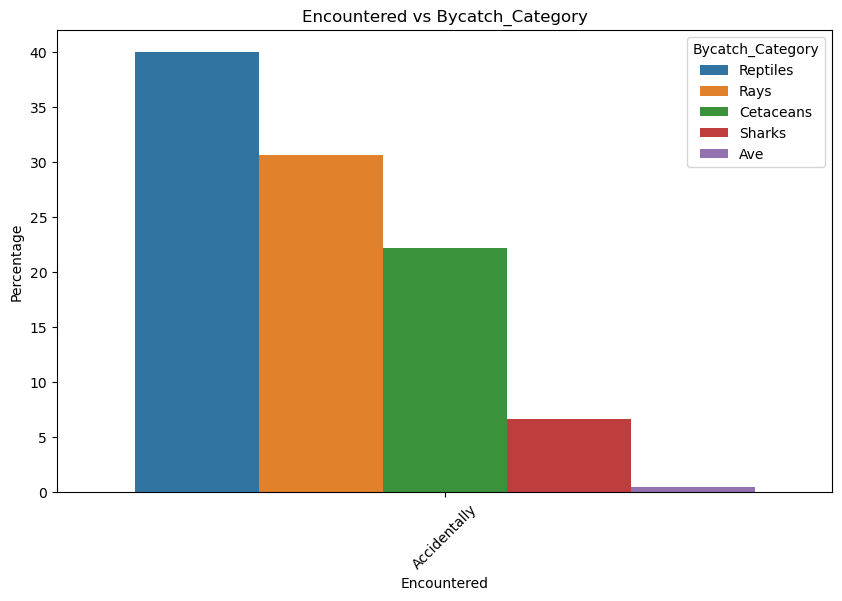

In [10]:

# Define a function to calculate percentages
def calculate_percentages(data, group_by_column, dependent_column):
    percentages = (data.groupby(group_by_column)[dependent_column].value_counts(normalize=True) * 100).reset_index(name='Percentage')
    return percentages

# Dependent Variables
dependent_variables = ['Turtle_No_DT', 'Dolphin_No_DT', 'Bycatch_Category']

# Independent Variables
independent_variables = ['Gear_Target_Fish_Category',
                         'Fish_Category', 'Bycatch_Sub_Category', 'Status','Status_1', 'Total_No_Year',
                         'Bycatch_Fishing_Area', 'Bycatch_Month','Total months', 'Damage net (Y/N)',
                         'Released', 'Discarded', 'Retained', 'Encountered']

# Perform analysis for each dependent variable
for dependent_variable in dependent_variables:
    print(f"Dependent Variable: {dependent_variable}")
    print("--------------------------------------------------------")

    # Print descriptive statistics of independent variables
    print("Descriptive Statistics of Independent Variables:")
    print(survey_data[independent_variables].describe())
    print()

    # Plot bar plots for significant dependent variables against categorical independent variables
    for independent_variable in independent_variables:
        if survey_data[independent_variable].dtype == 'O':
            print(f"Independent Variable: {independent_variable}")
            print()

            percentages_data = calculate_percentages(survey_data, independent_variable, dependent_variable)
            print(percentages_data)
            print()

            plt.figure(figsize=(10, 6))
            sns.barplot(data=percentages_data, x=independent_variable, y='Percentage', hue=dependent_variable)
            plt.title(f"{independent_variable} vs {dependent_variable}")
            plt.xlabel(independent_variable)
            plt.ylabel("Percentage")
            plt.xticks(rotation=45)
            plt.legend(title=dependent_variable)

            plt.show()

    # Display a line to separate the output for different dependent variables
    print("\n" + "=" * 50 + "\n")


# Attitude and Perception Towards Bycatch and Cetaceans Bycatch, Collaboration

Dependent Variable: Turtle_No_DT
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Shifted Fishing Techniques  \
count                         203   
unique                          2   
top                            No   
freq                          197   

                            If yes, Change Technique name  \
count                                                   7   
unique                                                  6   
top     Increased the number of floaters and sinkers o...   
freq                                                    2   

       Awareness on Conservation Animals should not be caught  \
count                        201                          209   
unique                         3                            4   
top                           No                           No   
freq                         196                          114   

         If_Yes_Explain Facilitate data col

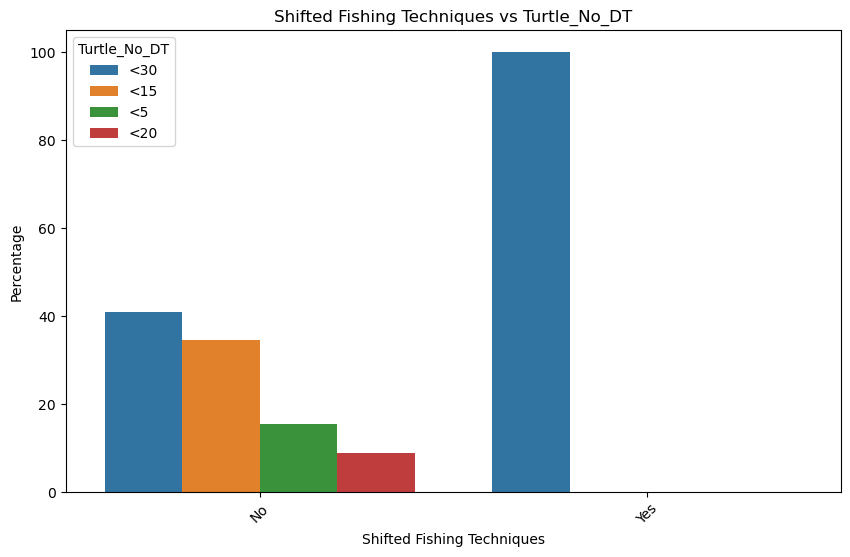

Independent Variable: If yes, Change Technique name

  If yes, Change Technique name Turtle_No_DT  Percentage
0       Increased in boat size           <30       100.0
1                            No          <15       100.0



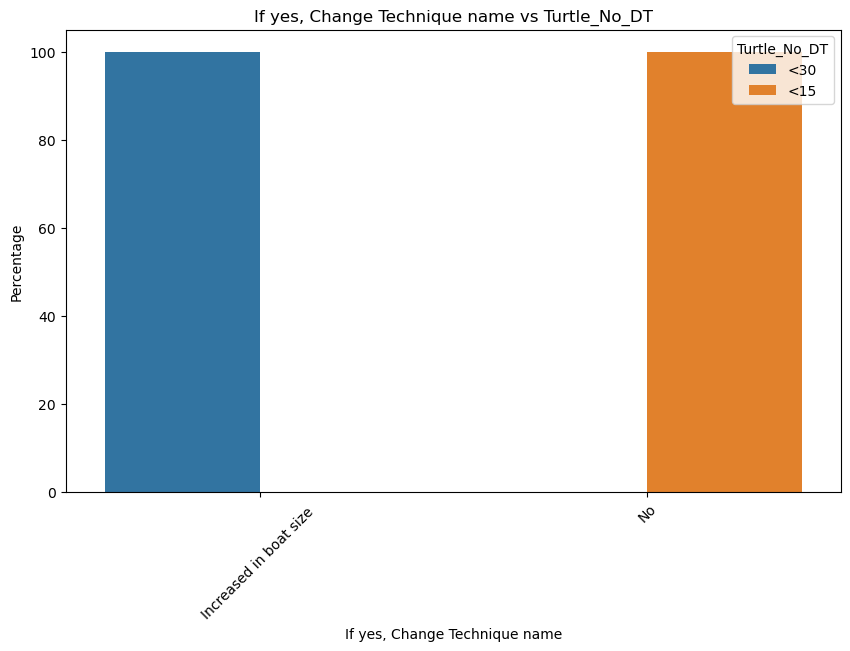

Independent Variable: Awareness on Conservation

  Awareness on Conservation Turtle_No_DT  Percentage
0                     Maybe          <15   66.666667
1                     Maybe           <5   33.333333
2                        No          <30   43.421053
3                        No          <15   34.210526
4                        No           <5   14.473684
5                        No          <20    7.894737



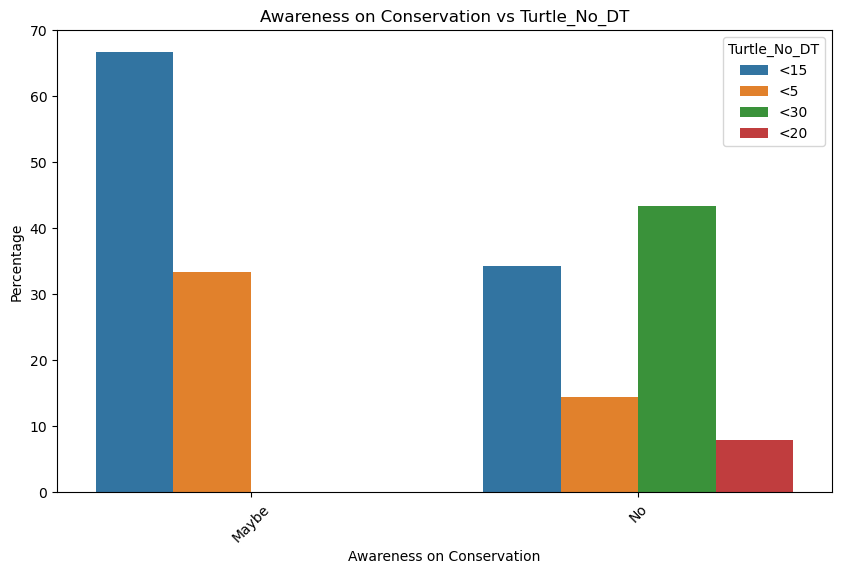

Independent Variable: Animals should not be caught

   Animals should not be caught Turtle_No_DT  Percentage
0                         Maybe          <30   56.521739
1                         Maybe          <15   30.434783
2                         Maybe          <20   13.043478
3                            No          <15   51.724138
4                            No          <30   34.482759
5                            No          <20    6.896552
6                            No           <5    6.896552
7                      Not Sure          <30   40.909091
8                      Not Sure           <5   40.909091
9                      Not Sure          <15   18.181818
10                          Yes          <20   50.000000
11                          Yes          <15   25.000000
12                          Yes          <30   25.000000



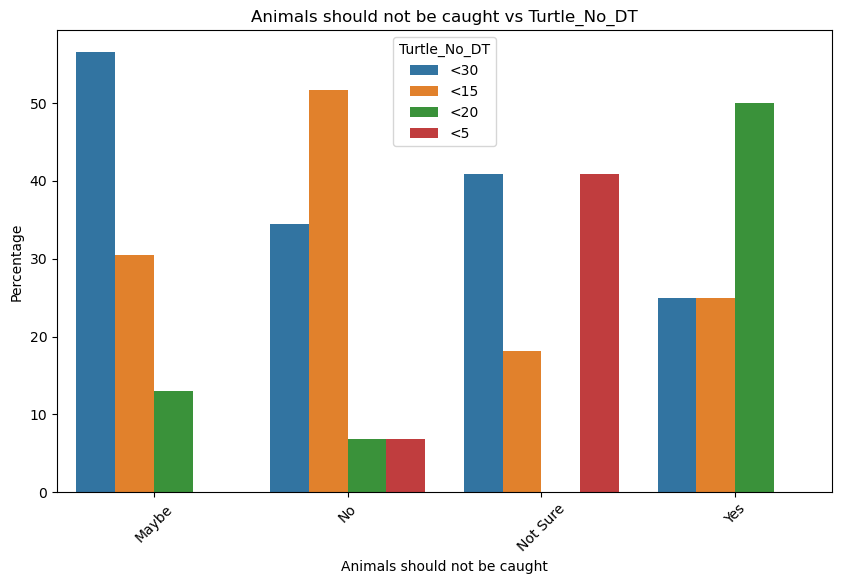

Independent Variable: If_Yes_Explain

    If_Yes_Explain Turtle_No_DT  Percentage
0     Market value          <20       100.0
1  No market value          <30       100.0
2         Not sure          <15       100.0



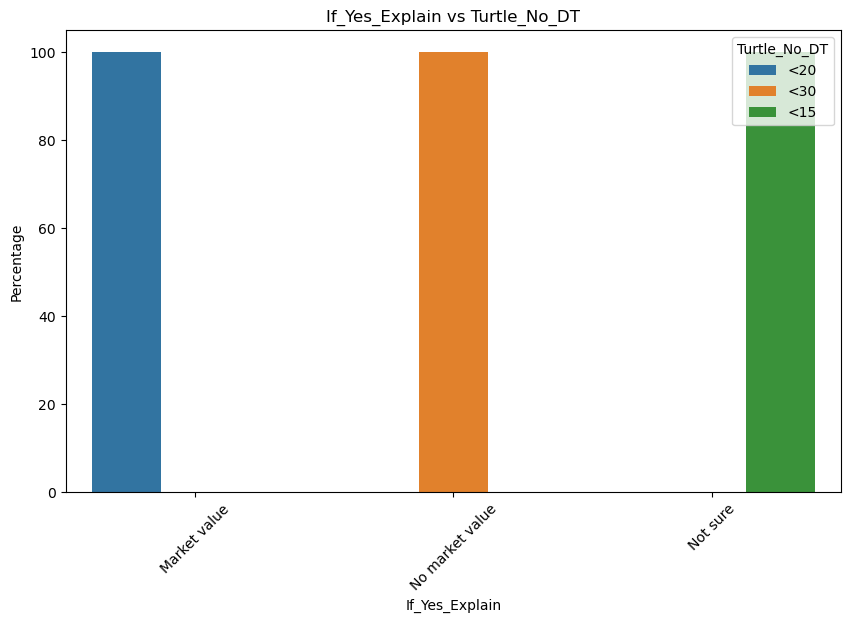

Independent Variable: Facilitate data collection and reporting

  Facilitate data collection and reporting Turtle_No_DT  Percentage
0                                    Maybe          <15   60.000000
1                                    Maybe          <30   40.000000
2                                       No          <15   33.333333
3                                       No          <30   33.333333
4                                       No          <20   16.666667
5                                       No           <5   16.666667
6                                      Yes          <30   42.187500
7                                      Yes          <15   31.250000
8                                      Yes           <5   17.187500
9                                      Yes          <20    9.375000



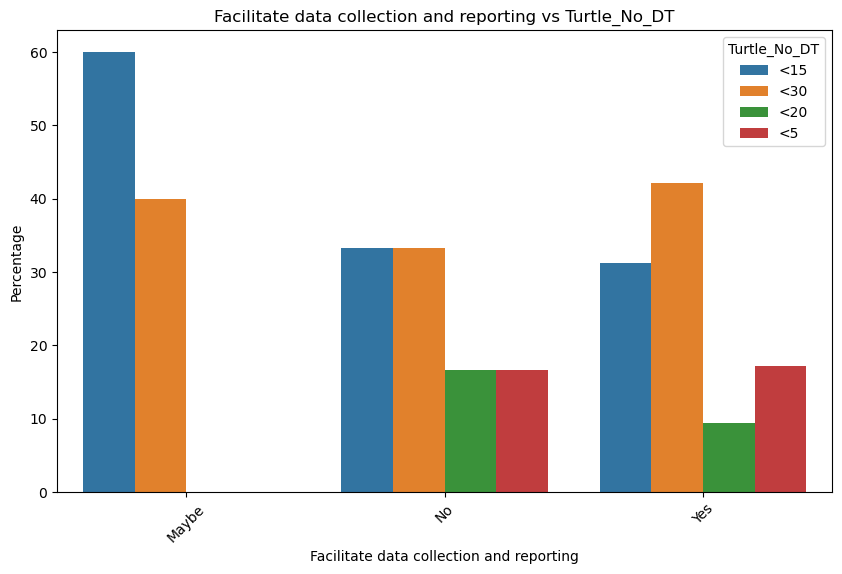

Independent Variable: Interview_One_Year

  Interview_One_Year Turtle_No_DT  Percentage
0             May be          <15  100.000000
1                Yes          <15   43.589744
2                Yes          <30   28.205128
3                Yes           <5   15.384615
4                Yes          <20   12.820513



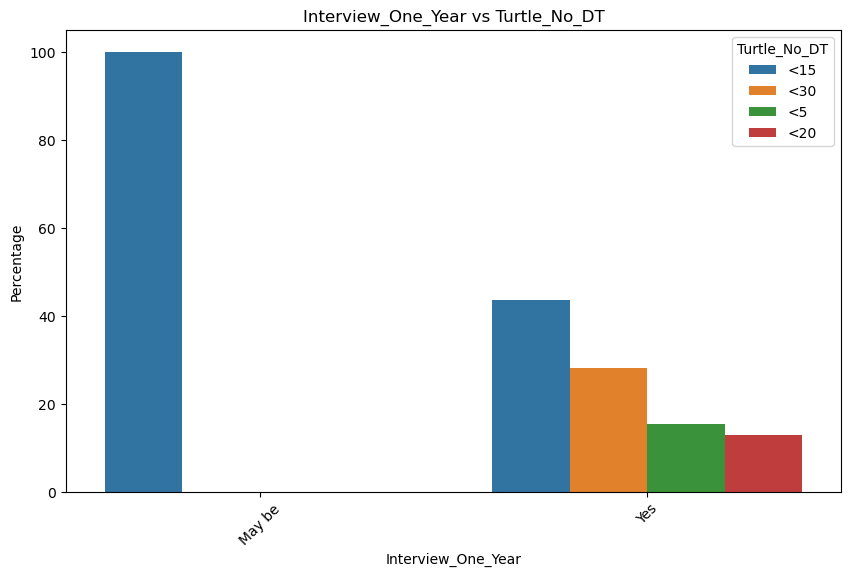



Dependent Variable: Dolphin_No_DT
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Shifted Fishing Techniques  \
count                         203   
unique                          2   
top                            No   
freq                          197   

                            If yes, Change Technique name  \
count                                                   7   
unique                                                  6   
top     Increased the number of floaters and sinkers o...   
freq                                                    2   

       Awareness on Conservation Animals should not be caught  \
count                        201                          209   
unique                         3                            4   
top                           No                           No   
freq                         196                          114   

         If_Yes_Explain Facilitate data 

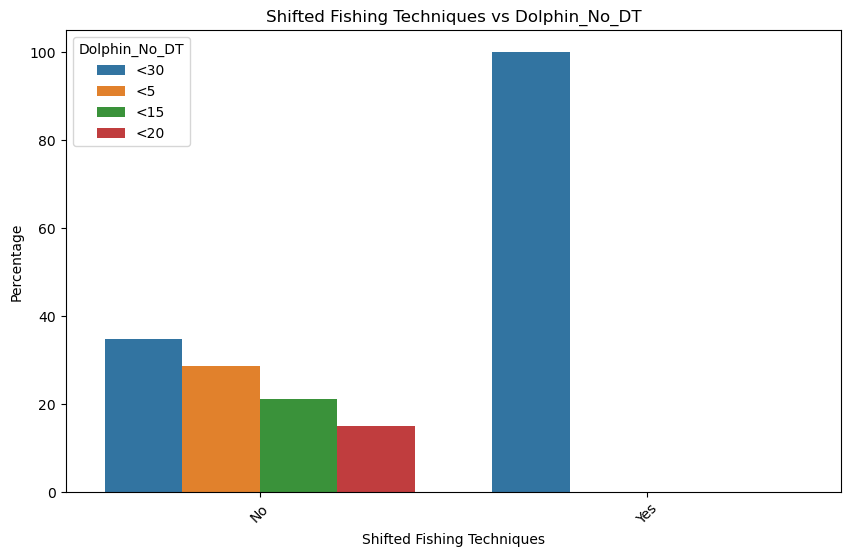

Independent Variable: If yes, Change Technique name

  If yes, Change Technique name Dolphin_No_DT  Percentage
0       Increased in boat size            <30       100.0



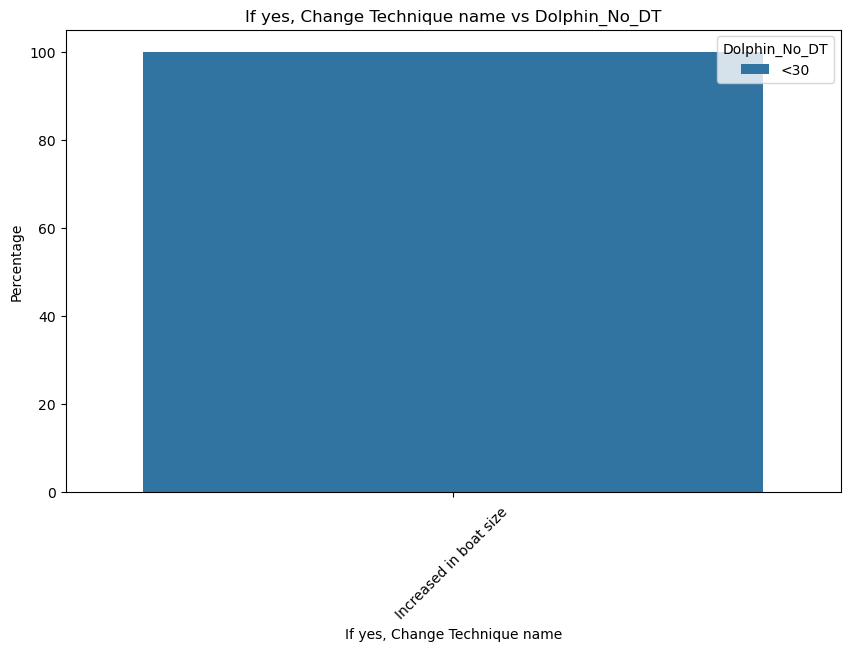

Independent Variable: Awareness on Conservation

  Awareness on Conservation Dolphin_No_DT  Percentage
0                     Maybe            <5     100.000
1                        No           <30      37.500
2                        No            <5      25.000
3                        No           <15      21.875
4                        No           <20      15.625



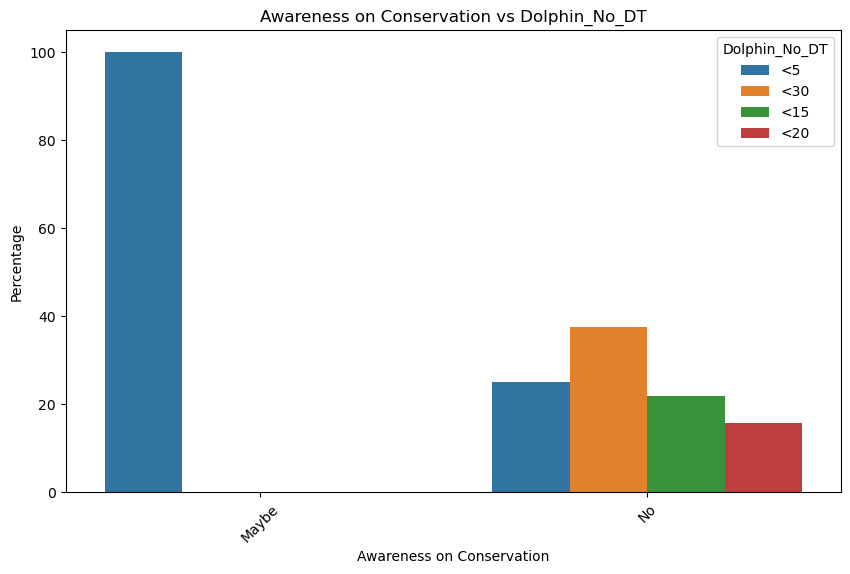

Independent Variable: Animals should not be caught

   Animals should not be caught Dolphin_No_DT  Percentage
0                         Maybe           <15   33.333333
1                         Maybe           <30   33.333333
2                         Maybe           <20   23.809524
3                         Maybe            <5    9.523810
4                            No            <5   40.000000
5                            No           <30   28.000000
6                            No           <15   16.000000
7                            No           <20   16.000000
8                      Not Sure           <30   55.555556
9                      Not Sure            <5   27.777778
10                     Not Sure           <15   11.111111
11                     Not Sure           <20    5.555556
12                          Yes           <15   50.000000
13                          Yes           <30   50.000000



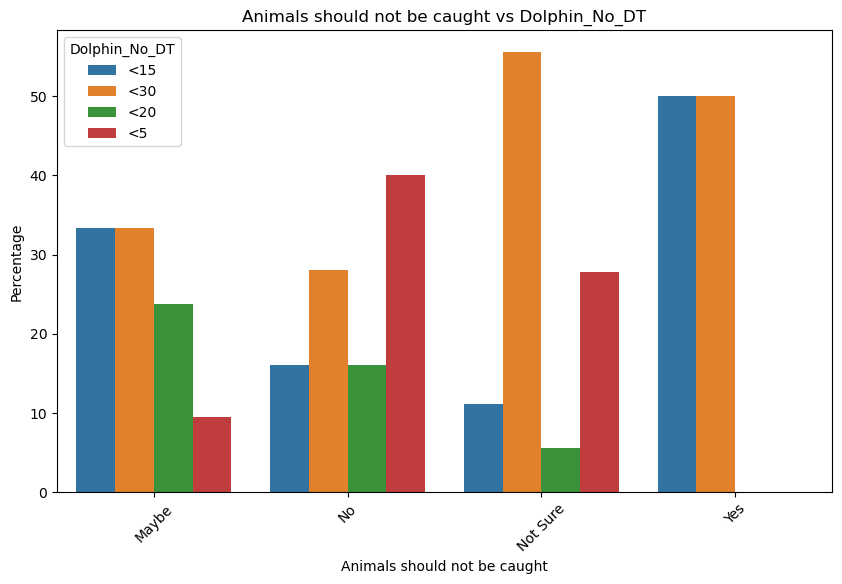

Independent Variable: If_Yes_Explain

  If_Yes_Explain Dolphin_No_DT  Percentage
0   Market value           <15       100.0



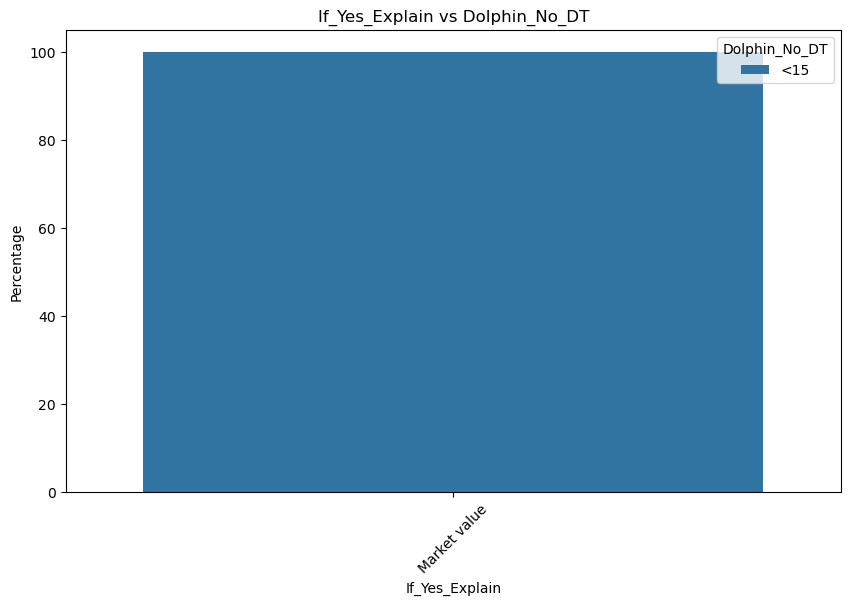

Independent Variable: Facilitate data collection and reporting

   Facilitate data collection and reporting Dolphin_No_DT  Percentage
0                                     Maybe           <30   44.444444
1                                     Maybe            <5   44.444444
2                                     Maybe           <15   11.111111
3                                        No            <5   50.000000
4                                        No           <15   16.666667
5                                        No           <20   16.666667
6                                        No           <30   16.666667
7                                       Yes           <30   37.037037
8                                       Yes            <5   24.074074
9                                       Yes           <15   22.222222
10                                      Yes           <20   16.666667



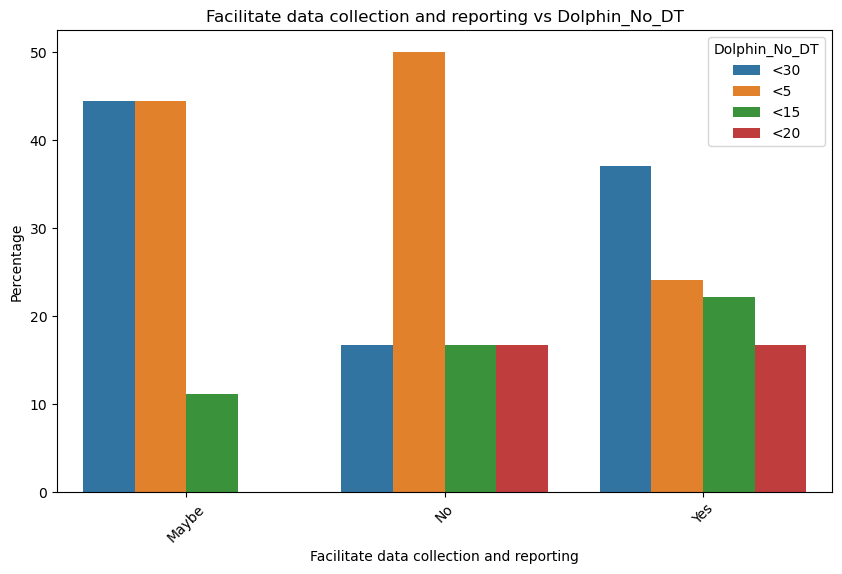

Independent Variable: Interview_One_Year

  Interview_One_Year Dolphin_No_DT  Percentage
0                Yes            <5   35.483871
1                Yes           <30   29.032258
2                Yes           <15   22.580645
3                Yes           <20   12.903226



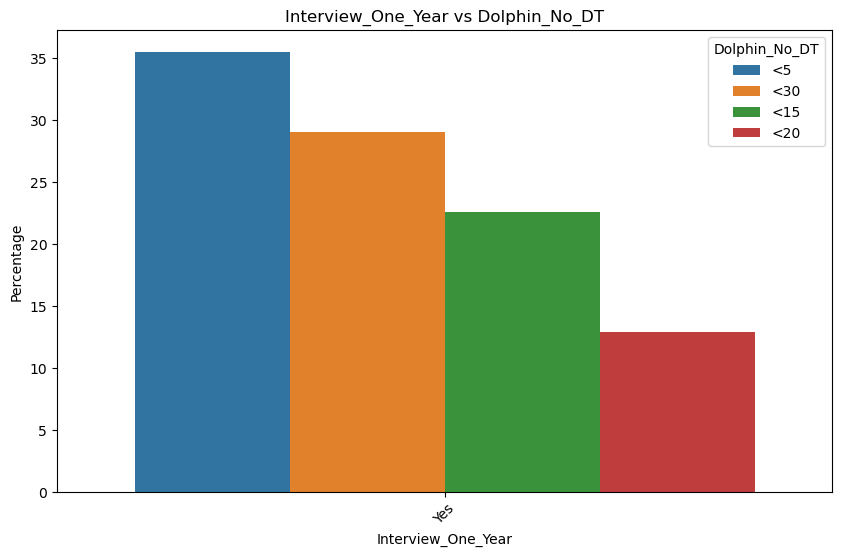



Dependent Variable: Bycatch_Category
--------------------------------------------------------
Descriptive Statistics of Independent Variables:
       Shifted Fishing Techniques  \
count                         203   
unique                          2   
top                            No   
freq                          197   

                            If yes, Change Technique name  \
count                                                   7   
unique                                                  6   
top     Increased the number of floaters and sinkers o...   
freq                                                    2   

       Awareness on Conservation Animals should not be caught  \
count                        201                          209   
unique                         3                            4   
top                           No                           No   
freq                         196                          114   

         If_Yes_Explain Facilitate da

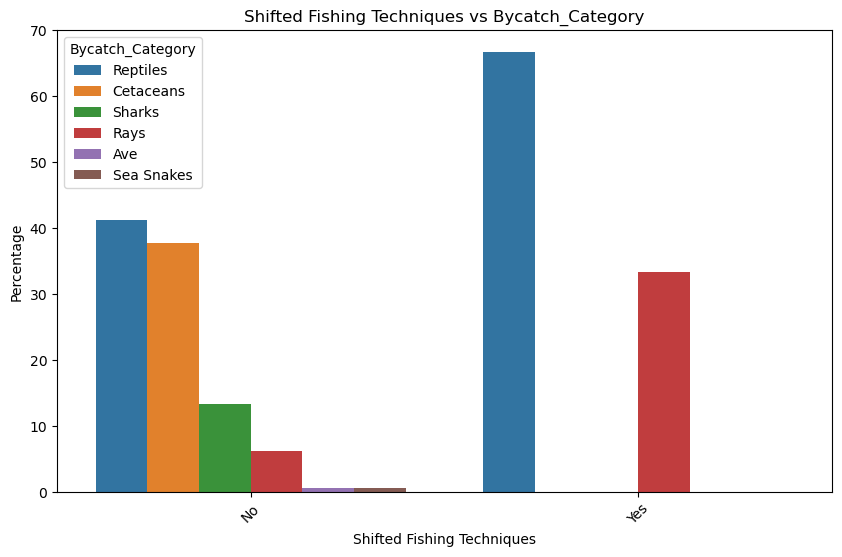

Independent Variable: If yes, Change Technique name

                       If yes, Change Technique name Bycatch_Category  \
0  Fishing in dayight save that animal from entan...         Reptiles   
1  Increased the number of floaters and sinkers o...             Rays   
2                                                 No             Rays   
3                Shift to Mayo and Choorryo fishing          Reptiles   

   Percentage  
0       100.0  
1       100.0  
2       100.0  
3       100.0  



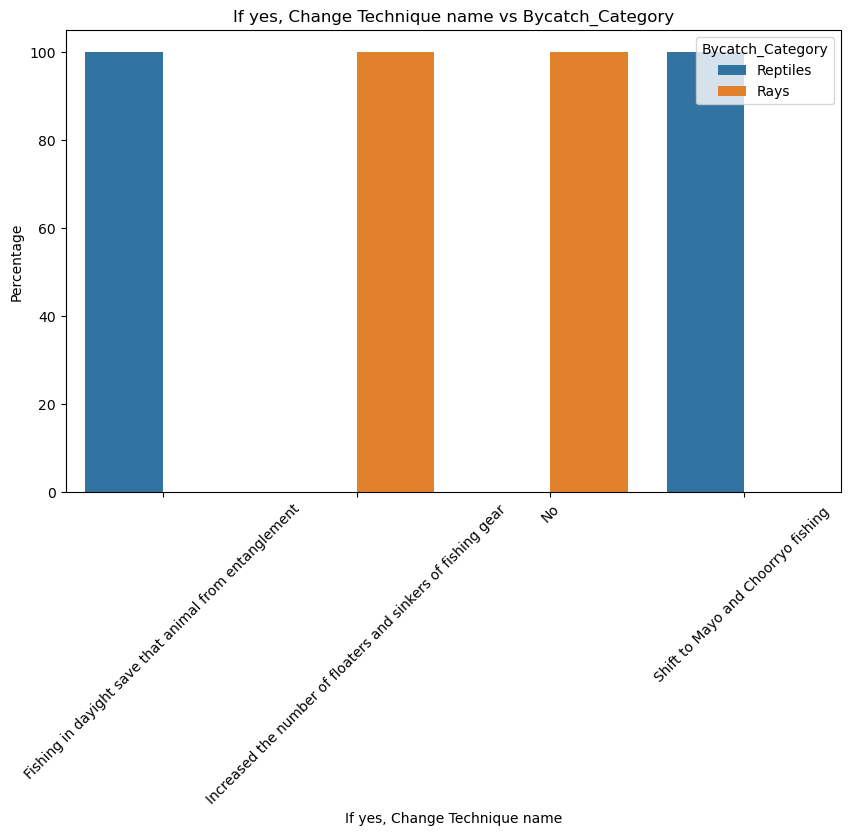

Independent Variable: Awareness on Conservation

  Awareness on Conservation Bycatch_Category  Percentage
0                     Maybe             Rays   50.000000
1                     Maybe         Reptiles   50.000000
2                        No         Reptiles   40.425532
3                        No        Cetaceans   39.007092
4                        No           Sharks   12.765957
5                        No             Rays    6.382979
6                        No              Ave    0.709220
7                        No       Sea Snakes    0.709220
8                       Yes         Reptiles  100.000000



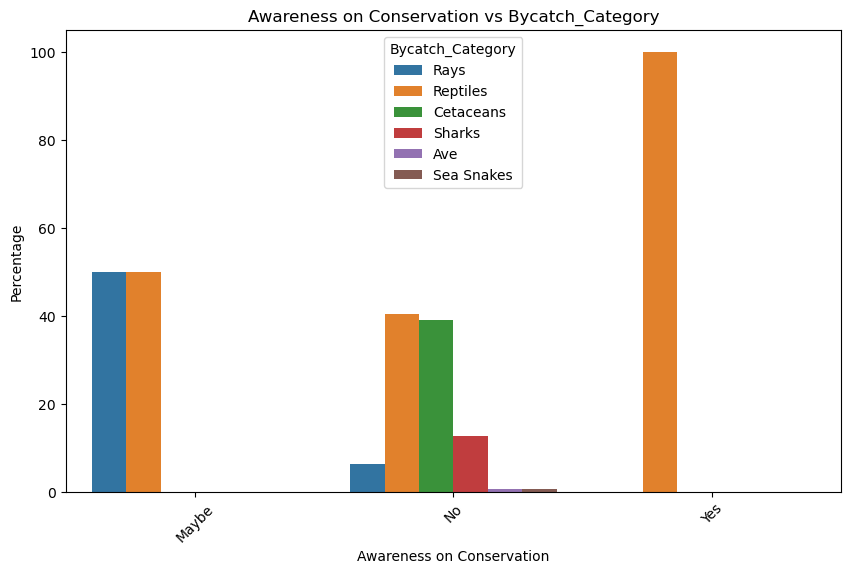

Independent Variable: Animals should not be caught

   Animals should not be caught Bycatch_Category  Percentage
0                         Maybe         Reptiles   38.461538
1                         Maybe        Cetaceans   23.076923
2                         Maybe             Rays   23.076923
3                         Maybe           Sharks   15.384615
4                            No        Cetaceans   48.000000
5                            No         Reptiles   38.000000
6                            No           Sharks   11.000000
7                            No             Rays    2.000000
8                            No              Ave    1.000000
9                      Not Sure         Reptiles   53.846154
10                     Not Sure             Rays   19.230769
11                     Not Sure        Cetaceans   11.538462
12                     Not Sure       Sea Snakes    7.692308
13                     Not Sure           Sharks    7.692308
14                          Yes  

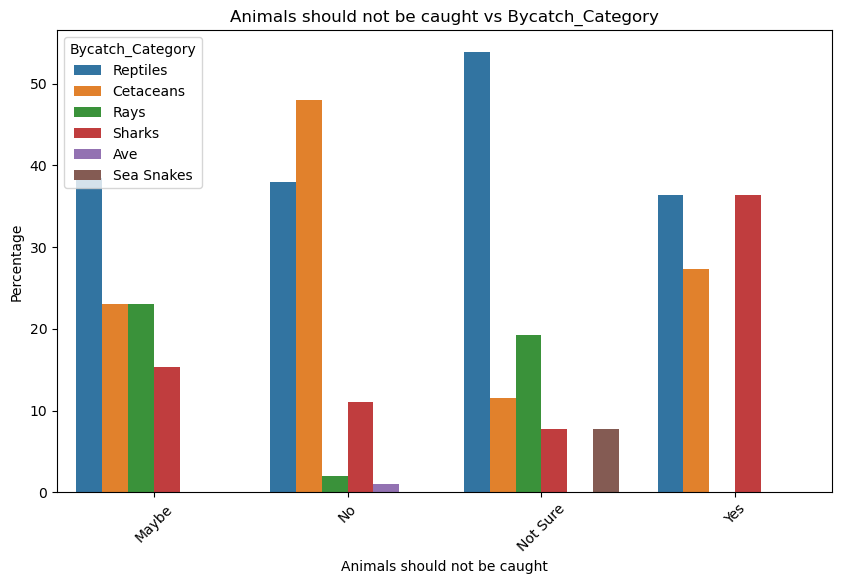

Independent Variable: If_Yes_Explain

    If_Yes_Explain Bycatch_Category  Percentage
0  No market value           Sharks       100.0
1         Not sure             Rays       100.0



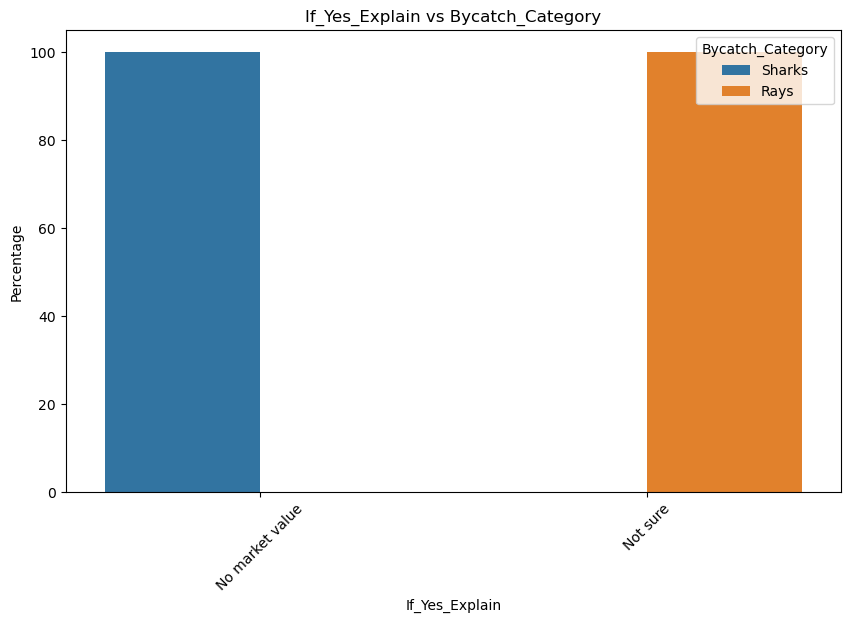

Independent Variable: Facilitate data collection and reporting

   Facilitate data collection and reporting Bycatch_Category  Percentage
0                                     Maybe             Rays   50.000000
1                                     Maybe         Reptiles   25.000000
2                                     Maybe        Cetaceans   12.500000
3                                     Maybe           Sharks   12.500000
4                                        No         Reptiles   66.666667
5                                        No             Rays   33.333333
6                                  Not sure        Cetaceans   50.000000
7                                  Not sure           Sharks   50.000000
8                                       Yes         Reptiles   42.028986
9                                       Yes        Cetaceans   39.855072
10                                      Yes           Sharks   12.318841
11                                      Yes             Rays

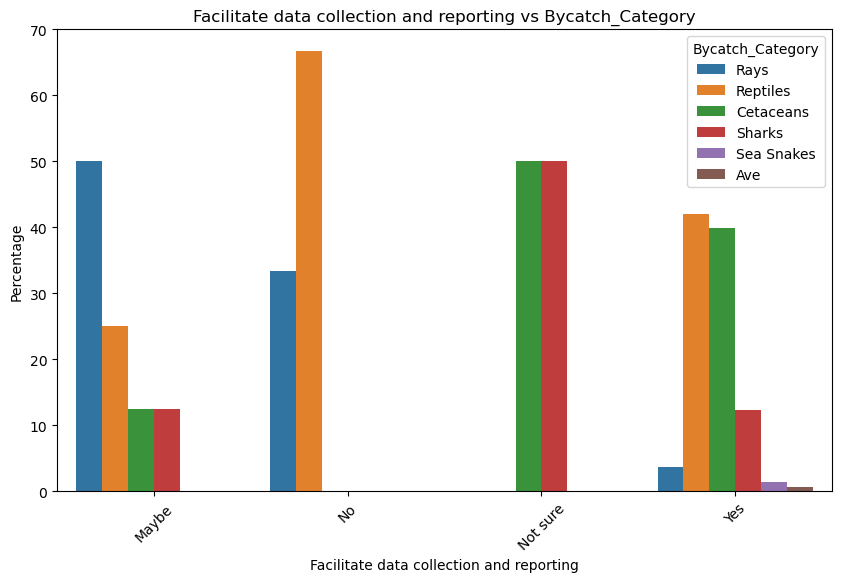

Independent Variable: Interview_One_Year

  Interview_One_Year Bycatch_Category  Percentage
0             May be             Rays  100.000000
1                Yes        Cetaceans   42.222222
2                Yes         Reptiles   40.740741
3                Yes           Sharks   14.074074
4                Yes       Sea Snakes    1.481481
5                Yes              Ave    0.740741
6                Yes             Rays    0.740741



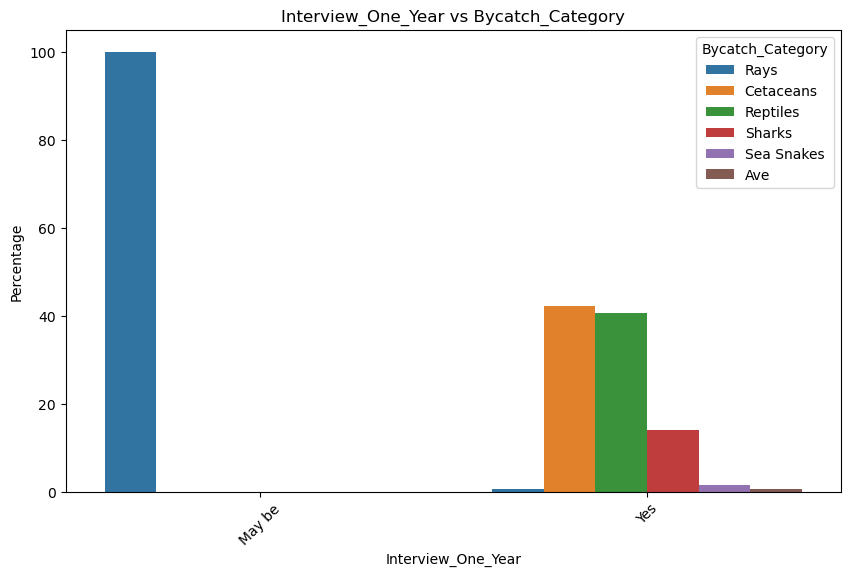

In [11]:

# Define a function to calculate percentages
def calculate_percentages(data, group_by_column, dependent_column):
    percentages = (data.groupby(group_by_column)[dependent_column].value_counts(normalize=True) * 100).reset_index(name='Percentage')
    return percentages

# Dependent Variables
dependent_variables = ['Turtle_No_DT', 'Dolphin_No_DT', 'Bycatch_Category']

# Independent Variables
independent_variables = ['Shifted Fishing Techniques','If yes, Change Technique name', 
                         'Awareness on Conservation','Animals should not be caught',
                         'If_Yes_Explain','Facilitate data collection and reporting', 'Interview_One_Year']

# Perform analysis for each dependent variable
for dependent_variable in dependent_variables:
    print(f"Dependent Variable: {dependent_variable}")
    print("--------------------------------------------------------")

    # Print descriptive statistics of independent variables
    print("Descriptive Statistics of Independent Variables:")
    print(survey_data[independent_variables].describe())
    print()

    # Plot bar plots for significant dependent variables against categorical independent variables
    for independent_variable in independent_variables:
        if survey_data[independent_variable].dtype == 'O':
            print(f"Independent Variable: {independent_variable}")
            print()

            percentages_data = calculate_percentages(survey_data, independent_variable, dependent_variable)
            print(percentages_data)
            print()

            plt.figure(figsize=(10, 6))
            sns.barplot(data=percentages_data, x=independent_variable, y='Percentage', hue=dependent_variable)
            plt.title(f"{independent_variable} vs {dependent_variable}")
            plt.xlabel(independent_variable)
            plt.ylabel("Percentage")
            plt.xticks(rotation=45)
            plt.legend(title=dependent_variable)

            plt.show()

    # Display a line to separate the output for different dependent variables
    print("\n" + "=" * 50 + "\n")


# Correlation Analysis - No of Turtle and Dolphin vs Boat Size

Correlation Analysis:
             Boat_Sizeft  Turtle_No  Dolphin_No
Boat_Sizeft     1.000000  -0.086427   -0.145879
Turtle_No      -0.086427   1.000000    0.343141
Dolphin_No     -0.145879   0.343141    1.000000

Correlation Analysis:
Correlation coefficients for Turtle_No:
Boat_Sizeft   -0.086427
Turtle_No      1.000000
Dolphin_No     0.343141
Name: Turtle_No, dtype: float64

Correlation coefficients for Dolphin_No:
Boat_Sizeft   -0.145879
Turtle_No      0.343141
Dolphin_No     1.000000
Name: Dolphin_No, dtype: float64



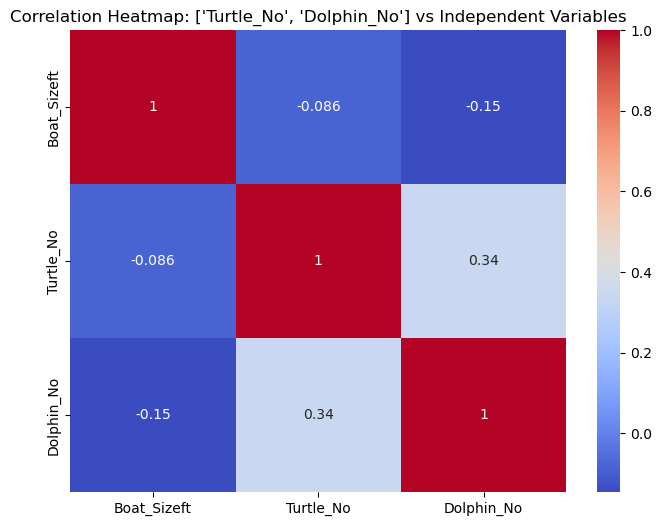

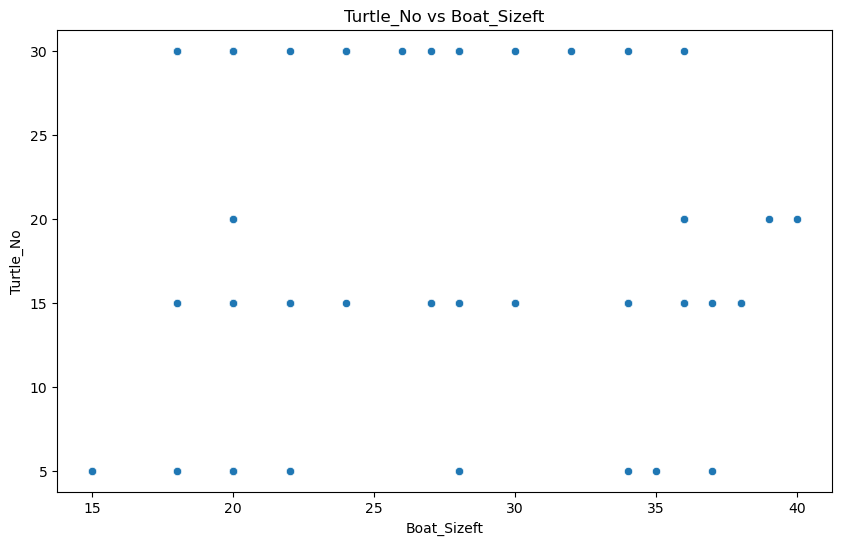

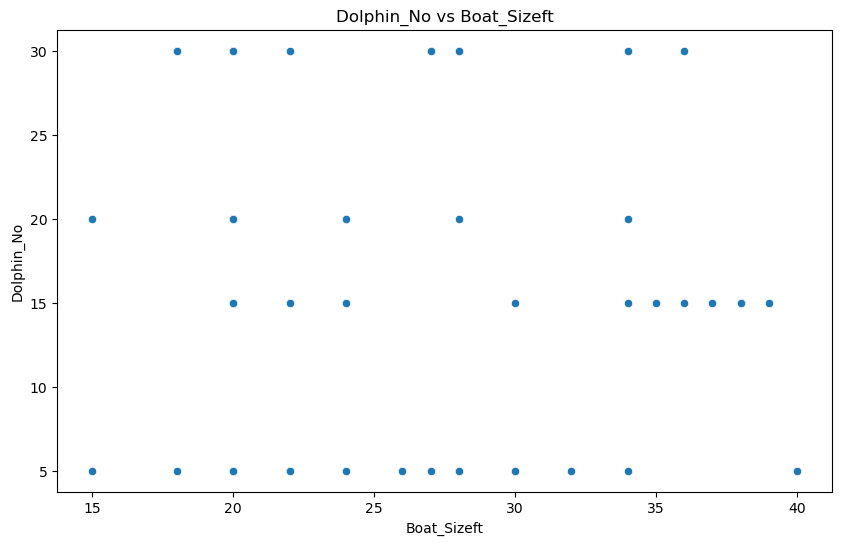

In [12]:
# Select the variables for correlation analysis
independent_variables = ['Boat_Sizeft']
dependent_variables = ['Turtle_No', 'Dolphin_No']

# Filter the dataset to include only the selected variables
data = survey_data[independent_variables + dependent_variables].copy()

# Perform correlation analysis
correlation_matrix = data.corr()


# Print the correlation coefficients
print("Correlation Analysis:")
print(correlation_matrix)
print()

# Print the correlation coefficients
print("Correlation Analysis:")
for dependent_variable in dependent_variables:
    print(f"Correlation coefficients for {dependent_variable}:")
    if dependent_variable in correlation_matrix:
        print(correlation_matrix[dependent_variable])
    else:
        print("Variable not found in the dataset.")
    print()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Heatmap: {dependent_variables} vs Independent Variables")
plt.show()

# Plot scatter plots of dependent variables against independent variables
for dependent_variable in dependent_variables:
    for independent_variable in independent_variables:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=independent_variable, y=dependent_variable)
        plt.title(f"{dependent_variable} vs {independent_variable}")
        plt.xlabel(independent_variable)
        plt.ylabel(dependent_variable)
        plt.show()


# Results 

1. Correlation Matrix:

- The correlation coefficient between Boat_Sizeft and Turtle_No is approximately -0.086, which indicates a weak negative correlation. As Boat_Sizeft increases, Turtle_No tends to decrease slightly, and vice versa.
- The correlation coefficient between Turtle_No and Dolphin_No is approximately 0.343, which indicates a moderate positive correlation. As Turtle_No increases, Dolphin_No tends to increase as well, and vice versa.


2. Correlation Coefficients for Each Dependent Variable

These results provide the correlation coefficients for each dependent variable separately. They give us insight into the relationship of each variable with the other two:

- For Turtle_No, it has a positive correlation of approximately 1.000 with itself, which is obvious because it represents the correlation of a variable with itself (perfect correlation).

- Turtle_No has a weak positive correlation of approximately 0.343 with Dolphin_No. This indicates that as the number of turtles observed (Turtle_No) increases, the number of dolphins observed (Dolphin_No) tends to increase slightly as well.

- Turtle_No has a weak negative correlation of approximately -0.086 with Boat_Sizeft. This implies that as the size of the boat (Boat_Sizeft) increases, the number of turtles observed (Turtle_No) tends to decrease slightly.

- For Dolphin_No, it also has a positive correlation of approximately 1.000 with itself (perfect correlation).

- Dolphin_No has a moderate positive correlation of approximately 0.343 with Turtle_No. As the number of dolphins observed (Dolphin_No) increases, the number of turtles observed (Turtle_No) tends to increase as well.

- Dolphin_No has a weak negative correlation of approximately -0.146 with Boat_Sizeft. As the size of the boat (Boat_Sizeft) increases, the number of dolphins observed (Dolphin_No) tends to decrease slightly.

In summary, these correlation analyses show the relationships between the variables Boat_Sizeft, Turtle_No, and Dolphin_No. It helps us understand how these variables are related to each other and provides insights into their potential dependencies in the given dataset.


# Correlation Analysis - Turtle and Dolphin vs Gear Lenght and Gear width

Correlation Analysis:
                  Gear_Length_(km)  Width (meters)  Turtle_No  Dolphin_No
Gear_Length_(km)          1.000000       -0.028450   0.092978   -0.199878
Width (meters)           -0.028450        1.000000   0.092602    0.113760
Turtle_No                 0.092978        0.092602   1.000000    0.343141
Dolphin_No               -0.199878        0.113760   0.343141    1.000000

Correlation Analysis:
Correlation coefficients for Turtle_No:
Gear_Length_(km)    0.092978
Width (meters)      0.092602
Turtle_No           1.000000
Dolphin_No          0.343141
Name: Turtle_No, dtype: float64

Correlation coefficients for Dolphin_No:
Gear_Length_(km)   -0.199878
Width (meters)      0.113760
Turtle_No           0.343141
Dolphin_No          1.000000
Name: Dolphin_No, dtype: float64



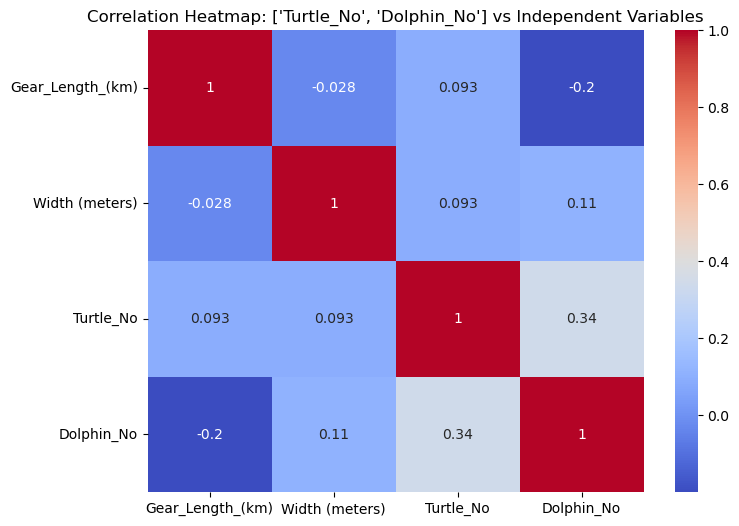

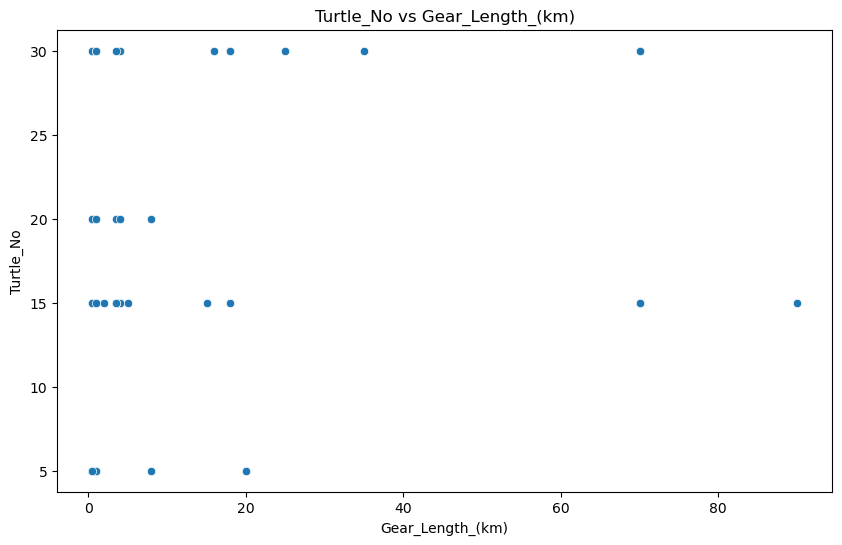

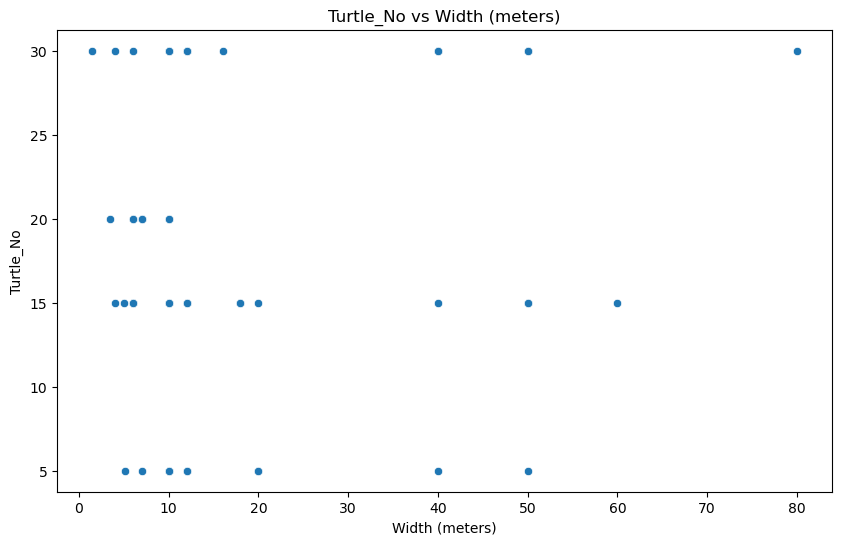

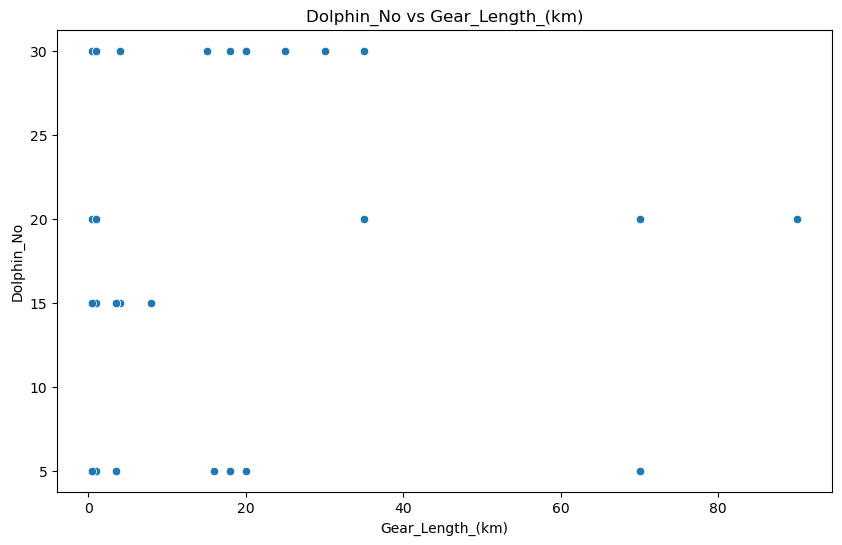

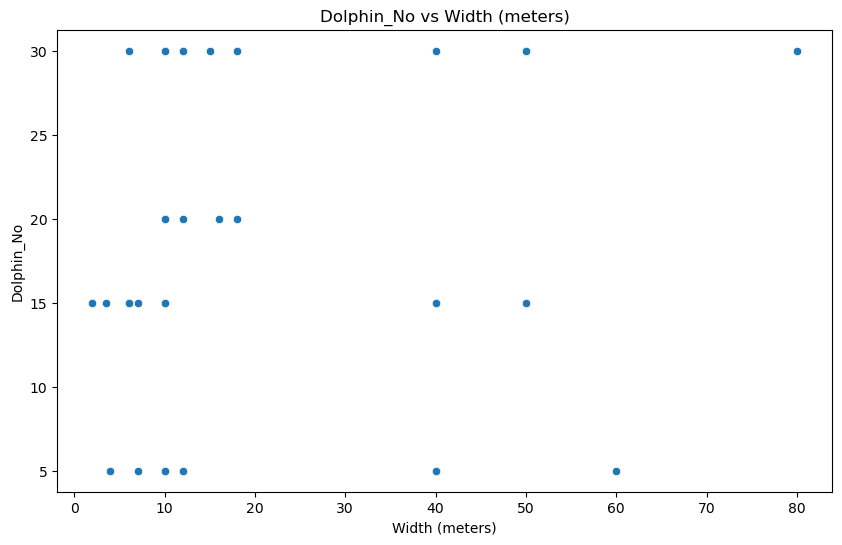

In [13]:

# Load the dataset
survey_data = pd.read_csv("Survey_F2F_Cetacean_1.1.csv")

# Select the variables for correlation analysis
independent_variables = ['Gear_Length_(km)', 'Width (meters)']
dependent_variables = ['Turtle_No', 'Dolphin_No']

# Filter the dataset to include only the selected variables
data = survey_data[independent_variables + dependent_variables].copy()

# Perform correlation analysis
correlation_matrix = data.corr()


# Print the correlation coefficients
print("Correlation Analysis:")
print(correlation_matrix)
print()

# Print the correlation coefficients
print("Correlation Analysis:")
for dependent_variable in dependent_variables:
    print(f"Correlation coefficients for {dependent_variable}:")
    if dependent_variable in correlation_matrix:
        print(correlation_matrix[dependent_variable])
    else:
        print("Variable not found in the dataset.")
    print()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Heatmap: {dependent_variables} vs Independent Variables")
plt.show()

# Plot scatter plots of dependent variables against independent variables
for dependent_variable in dependent_variables:
    for independent_variable in independent_variables:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=independent_variable, y=dependent_variable)
        plt.title(f"{dependent_variable} vs {independent_variable}")
        plt.xlabel(independent_variable)
        plt.ylabel(dependent_variable)
        plt.show()


# Results

1. Correlation Matrix:
- The correlation coefficient between Gear_Length_(km) and Turtle_No is approximately 0.093, indicating a very weak positive correlation between the two variables.
- The correlation coefficient between Width (meters) and Turtle_No is also approximately 0.093, indicating a very weak positive correlation between the two variables.
- The correlation coefficient between Turtle_No and itself is 1, as expected since it represents the correlation of a variable with itself, which is always perfect.
- The correlation coefficient between Turtle_No and Dolphin_No is approximately 0.343, indicating a moderate positive correlation between the two variables.

2. Correlation Coefficients for Turtle_No and Dolphin_No

- Turtle_No has a weak positive correlation with both Gear_Length_(km) and Width (meters), as indicated by the coefficients of approximately 0.093 for both variables.
- Turtle_No has a moderate positive correlation with Dolphin_No, as indicated by the coefficient of approximately 0.343.

the correlation analysis shows that there are weak positive correlations between Turtle_No and the variables Gear_Length_(km) and Width (meters), and a moderate positive correlation between Turtle_No and Dolphin_No. The correlation between Turtle_No and Dolphin_No indicates that as the number of turtles observed increases, there is a tendency for the number of dolphins observed to also increase, although the relationship is not strong. Similarly, there is a weak tendency for the number of turtles observed to increase as the gear length and width also increase, but again, the relationships are not very strong.

# Regression of No of Turtle and No of Dolphin vs Boat Size ft

Regression results for Turtle_No:
                            OLS Regression Results                            
Dep. Variable:              Turtle_No   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.457
Date:                Tue, 08 Aug 2023   Prob (F-statistic):              0.231
Time:                        18:00:04   Log-Likelihood:                -261.42
No. Observations:                  71   AIC:                             526.8
Df Residuals:                      69   BIC:                             531.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          2

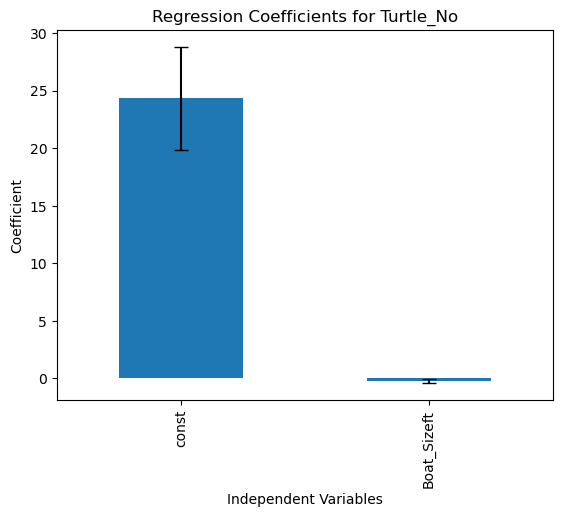

Regression results for Dolphin_No:
                            OLS Regression Results                            
Dep. Variable:             Dolphin_No   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.999
Date:                Tue, 08 Aug 2023   Prob (F-statistic):              0.162
Time:                        18:00:05   Log-Likelihood:                -262.93
No. Observations:                  71   AIC:                             529.9
Df Residuals:                      69   BIC:                             534.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          

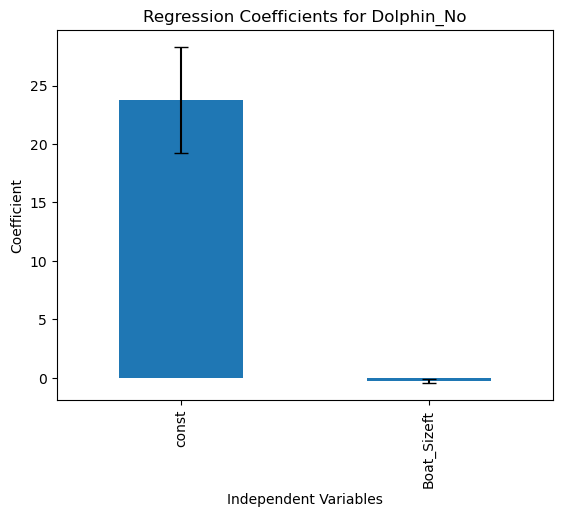

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
survey_data = pd.read_csv("Survey_F2F_Cetacean_1.1.csv")

# Select the independent and dependent variables
independent_variables = ['Boat_Sizeft']
dependent_variables = ['Turtle_No', 'Dolphin_No']

# Filter the dataset to include only the selected variables
data = survey_data[independent_variables + dependent_variables].copy()

# Drop rows with missing or infinite values
data = data.dropna()
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Split the data into X (independent variables) and y (dependent variables)
X = data[independent_variables]
X = sm.add_constant(X)
y = data[dependent_variables]

# Fit separate linear regression models for each dependent variable
models = []
for col in y.columns:
    # Add the constant column to the y DataFrame
    y_with_const = sm.add_constant(y[col])

    model = sm.OLS(y[col], X).fit()
    models.append(model)

# Print the regression results
for model, col in zip(models, y.columns):
    print(f"Regression results for {col}:")
    print(model.summary())
    print()

    # Display the results in a table
    results_table = model.summary().tables[1]
    print(results_table)

    # Plot the coefficients
    coefficients = model.params
    coefficients.plot(kind='bar', yerr=model.bse, capsize=5)
    plt.xlabel("Independent Variables")
    plt.ylabel("Coefficient")
    plt.title(f"Regression Coefficients for {col}")
    plt.show()


# Results 

For Turtles 
- the regression analysis indicates that the model with Boat_Sizeft as the independent variable does not provide a strong explanation for the variation in the number of turtles observed (Turtle_No). The low R-squared value and non-significant coefficient of Boat_Sizeft suggest that other factors not included in the model might have a more significant impact on the number of turtles observed. It is essential to consider other variables and potentially a more complex model to better explain the relationship between Turtle_No and its predictors.

For Dolphins
- the regression analysis indicates that the model with Boat_Sizeft as the independent variable does not provide a strong explanation for the variation in the number of dolphins observed (Dolphin_No). The low R-squared value and non-significant coefficient of Boat_Sizeft suggest that other factors not included in the model might have a more significant impact on the number of dolphins observed. It is essential to consider other variables and potentially a more complex model to better explain the relationship between Dolphin_No and its predictors.

# Regression for No of Turtle and No of Dolphin vs Gear Length and Width

Regression results for Turtle_No:
                            OLS Regression Results                            
Dep. Variable:              Turtle_No   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.204
Date:                Tue, 08 Aug 2023   Prob (F-statistic):              0.306
Time:                        18:00:05   Log-Likelihood:                -264.74
No. Observations:                  72   AIC:                             535.5
Df Residuals:                      69   BIC:                             542.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const 

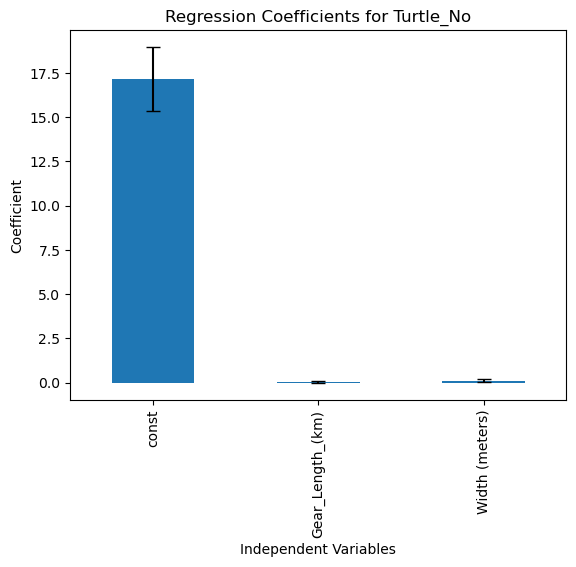

Regression results for Dolphin_No:
                            OLS Regression Results                            
Dep. Variable:             Dolphin_No   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.826
Date:                Tue, 08 Aug 2023   Prob (F-statistic):             0.0661
Time:                        18:00:06   Log-Likelihood:                -264.36
No. Observations:                  72   AIC:                             534.7
Df Residuals:                      69   BIC:                             541.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const

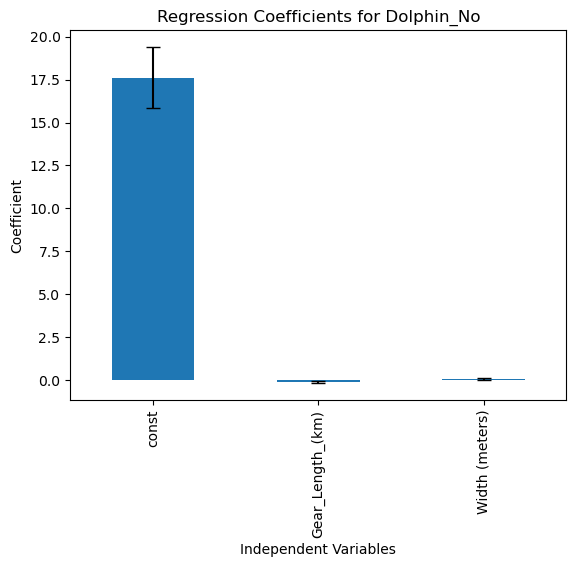

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
survey_data = pd.read_csv("Survey_F2F_Cetacean_1.1.csv")

# Select the independent and dependent variables
independent_variables = ['Gear_Length_(km)', 'Width (meters)']
dependent_variables = ['Turtle_No', 'Dolphin_No']

# Filter the dataset to include only the selected variables
data = survey_data[independent_variables + dependent_variables].copy()

# Drop rows with missing or infinite values
data = data.dropna()
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Split the data into X (independent variables) and y (dependent variables)
X = data[independent_variables]
X = sm.add_constant(X)
y = data[dependent_variables]

# Fit separate linear regression models for each dependent variable
models = []
for col in y.columns:
    # Add the constant column to the y DataFrame
    y_with_const = sm.add_constant(y[col])

    model = sm.OLS(y[col], X).fit()
    models.append(model)

# Print the regression results
for model, col in zip(models, y.columns):
    print(f"Regression results for {col}:")
    print(model.summary())
    print()

    # Display the results in a table
    results_table = model.summary().tables[1]
    print(results_table)

    # Plot the coefficients
    coefficients = model.params
    coefficients.plot(kind='bar', yerr=model.bse, capsize=5)
    plt.xlabel("Independent Variables")
    plt.ylabel("Coefficient")
    plt.title(f"Regression Coefficients for {col}")
    plt.show()


# Results 

For turtles 
-  the regression analysis indicates that the model with Gear_Length_(km) and Width (meters) as independent variables does not provide a strong explanation for the variation in the number of turtles observed (Turtle_No). The low R-squared value and non-significant coefficients suggest that other factors not included in the model might have a more significant impact on the number of turtles observed. It is essential to consider other variables and potentially a more complex model to better explain the relationship between Turtle_No and its predictors.


For Dolphins
- the regression analysis indicates that the model with Gear_Length_(km) and Width (meters) as independent variables provides a relatively weak explanation for the variation in the number of dolphins observed (Dolphin_No). The low R-squared value and the non-significance of Width (meters) suggest that other factors not included in the model might have a more significant impact on the number of dolphins observed. It is essential to consider other variables and potentially a more complex model to better explain the relationship between Dolphin_No and its predictors. Additionally, further investigation is required to ensure the validity of the model assumptions and conclusions.


The outliers from the data maybe removed for further analysis and performance of the models 